<a href="https://colab.research.google.com/github/VipulR2796/premier_league_results_prediction/blob/main/EPL_Match_Result_Predictions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MIT License

Copyright (c) 2022 Vipul Rajderkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



## Abstract
Objective of this notebook is to perform exploratory data analysis, data cleaning, feature selection, and model interpretability on English Premier League data capable of predicting the winner amongst Home Team and Away Team for any particular match.



## Aim: 
In order to get the best results, following tasks need to be performed:
* Exploratory Data Analysis
* Feature Selection
* Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
* Model Interpretibility
* Reports and Visualizations

## **What are we trying to solve?**


*   We have a historic data of EPL Premier League match statistics of 20 seasons.
*   Each row represents 1 match statistics which contains 2 types of stats:

    1. Pre Match Statistics - Focuses on average performance of specific team until last match in an ongoing season. These performance KPIs varies from attacking strength, defense strength, conversion rates etc.

    2. Post Match Statistics - Provides insights/values on particular match stats.
* Our objective is to  predict the winning team for an upcoming match basis average performance of both teams until their last matches. To do so, pre match analysis data has to be used and post match data can be dropped.
* Hence I am leaveraging data on temams performaces to predict their upcoming match results.






## Datset Information
Source: I used this EPL data from Kaggle.

Feature Information:


In [154]:
import base64
import requests

master = "https://raw.githubusercontent.com/VipulR2796/premier_league_results_prediction/main/data_dictionary.txt"
req = requests.get(master)
req = req.text
print(req)

link_match		: page link of match in Premier League Official website
season			: match season
date			: match date
home_team		: home team
away_team		: away team
result_full		: match result
result_ht		: match result in 1st time
home_clearances		: home team clearances in the match
home_corners		: home team corners in the match
home_fouls_conceded	: home team fouls conceded in the match
home_offsides		: home team offsides in the match
home_passes		: home team passes in the match
home_possession		: home team possession in the match
home_red_cards		: home team red cards in the match
home_shots		: home team shots in the match
home_shots_on_target	: home team shots on target in the match
home_tackles		: home team tackles in the match
home_touches		: home team touches in the match
home_yellow_cards	: home team yellow cards in the match
away_clearances		: away tem clearances in the match
away_corners		: away team corners in the match
away_fouls_conceded	: away team fouls conceded in the match
away

## Importing required libraries

In [155]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
# Importing all libraries
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

# !pip install -U scikit-learn --user
import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# from sklearn.inspection import plot_partial_dependence
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE
from fancyimpute import KNN

# plt.rcParams["figure.figsize"] = (20, 24)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [158]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

3


In [159]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:16484..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp531e81tj
  JVM stdout: /tmp/tmp531e81tj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp531e81tj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:16484
Connecting to H2O server at http://127.0.0.1:16484 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_e11tmm
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:16484
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [160]:
#Reading data from github
epl_data = pd.read_csv("https://raw.githubusercontent.com/VipulR2796/premier_league_results_prediction/main/EPL%20Data.csv")
epl_data.head()

season          home_team             away_team  clearances_avg_H  \
0  10/11          Blackpool  West Bromwich Albion              41.0   
1  10/11          Liverpool       Manchester City              28.8   
2  10/11  Manchester United               Arsenal              20.0   
3  10/11         Stoke City           Aston Villa              17.0   
4  10/11             Fulham               Chelsea              36.8   

   corners_avg_H  fouls_conceded_avg_H  offsides_avg_H  passes_avg_H  \
0            5.0                  11.7             3.7         453.7   
1            6.7                  12.3             2.7         434.7   
2            5.4                   9.5             2.8         540.9   
3            6.0                  15.0             2.0         317.0   
4            5.3                  11.7             3.0         475.5   

   possession_avg_H  red_cards_avg_H  ...  touches_avg_A  yellow_cards_avg_A  \
0              56.2              0.0  ...          572.8                 1.2   
1              52.3              0.1  ...          698.7                 2.5   
2              58.4              0.0  ...          733.5                 1.6   
3              41.7              0.0  ...          599.0                 1.0   
4              54.0              0.0  ...          733.8                 1.8   

   goals_scored_ft_avg_A  goals_conced_ft_avg_A  sg_match_ft_acum_A  \
0                   1.25                   2.75                -6.0   
1                   1.47                   1.07                 6.0   
2                   1.88                   1.00                 7.0   
3                   0.00                   6.00                -6.0   
4                   1.69                   1.08                 8.0   

   goals_scored_ht_avg_A  goals_conced_ht_avg_A  sg_match_ht_acum_A  \
0                   0.00                   1.00                -4.0   
1                   0.80                   0.27                 8.0   
2                   0.88                   0.25                 5.0   
3                   0.00                   3.00                -3.0   
4                   0.69                   0.77                -1.0   

   performance_acum_A  Winner  
0                33.3    Home  
1                48.9    Home  
2                70.8    Home  
3                 0.0    Home  
4                46.2    Draw  

[5 rows x 42 columns]

## **Exploratory Data Analysis**

### Checking collinearity

<Axes: >

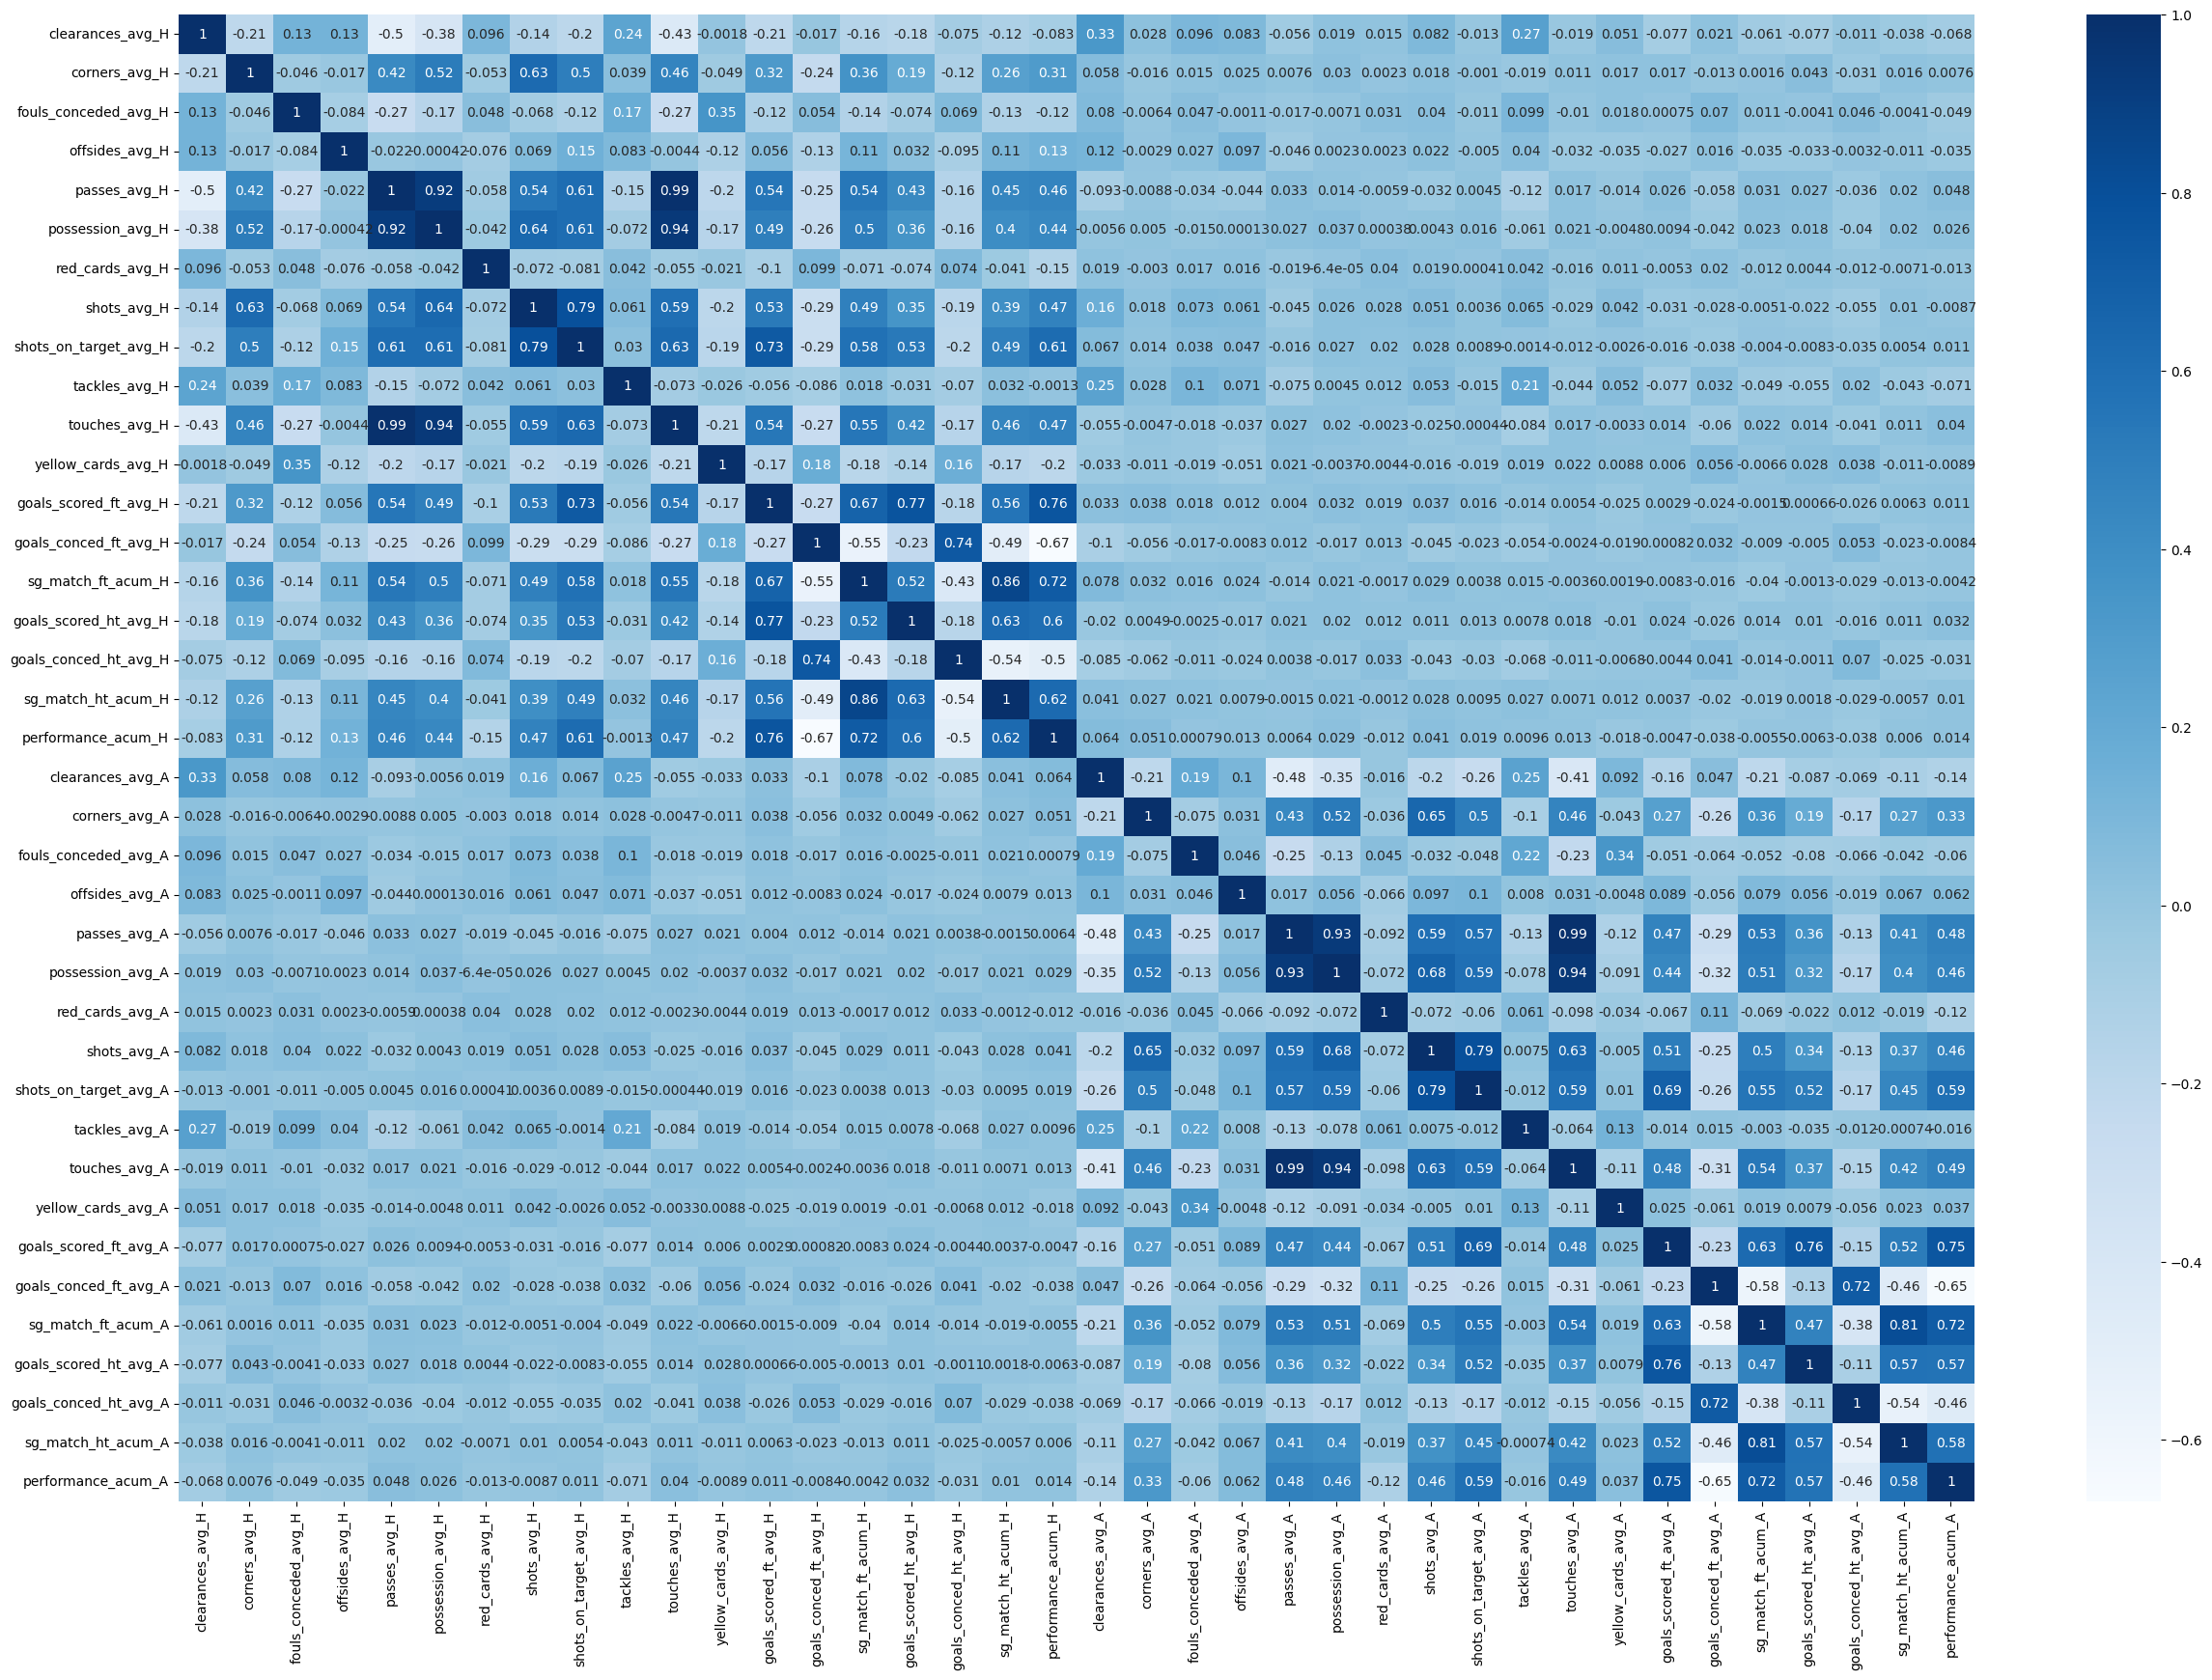

In [161]:
data = epl_data.copy()

plt.rcParams["figure.figsize"] = (30,20)
sns.heatmap(data.corr(), annot=True, cmap='Blues')

Here, following columns are highly correlated with each other:
1. passes_avg_H and touches_avg_H (0.99)
2. possession_avg_H and touches_avg_H (0.94)
3. passes_avg_H and possession_avg_H (0.92)

Similary, away team columns are also highly correlated
1. passes_avg_A and touches_avg_A (0.99)
2. possession_avg_A and touches_avg_A (0.94)
3. passes_avg_A and possession_avg_A (0.92)

Hence, we can drop touches_avg_H and touches_avg_A columns from the data

In [162]:
data.drop(columns=['touches_avg_H', 'touches_avg_A'], inplace=True)

In [163]:
home_num_cols = [x for x in list(data.columns) if (data[x].dtype == float or data[x].dtype == int) and '_H' in x]
away_num_cols = [x for x in list(data.columns) if (data[x].dtype == float or data[x].dtype == int) and '_A' in x]

### Distribution of numerical features

array([[<Axes: title={'center': 'clearances_avg_H'}>,
        <Axes: title={'center': 'corners_avg_H'}>,
        <Axes: title={'center': 'fouls_conceded_avg_H'}>,
        <Axes: title={'center': 'offsides_avg_H'}>,
        <Axes: title={'center': 'passes_avg_H'}>,
        <Axes: title={'center': 'possession_avg_H'}>],
       [<Axes: title={'center': 'red_cards_avg_H'}>,
        <Axes: title={'center': 'shots_avg_H'}>,
        <Axes: title={'center': 'shots_on_target_avg_H'}>,
        <Axes: title={'center': 'tackles_avg_H'}>,
        <Axes: title={'center': 'yellow_cards_avg_H'}>,
        <Axes: title={'center': 'goals_scored_ft_avg_H'}>],
       [<Axes: title={'center': 'goals_conced_ft_avg_H'}>,
        <Axes: title={'center': 'sg_match_ft_acum_H'}>,
        <Axes: title={'center': 'goals_scored_ht_avg_H'}>,
        <Axes: title={'center': 'goals_conced_ht_avg_H'}>,
        <Axes: title={'center': 'sg_match_ht_acum_H'}>,
        <Axes: title={'center': 'performance_acum_H'}>],
      

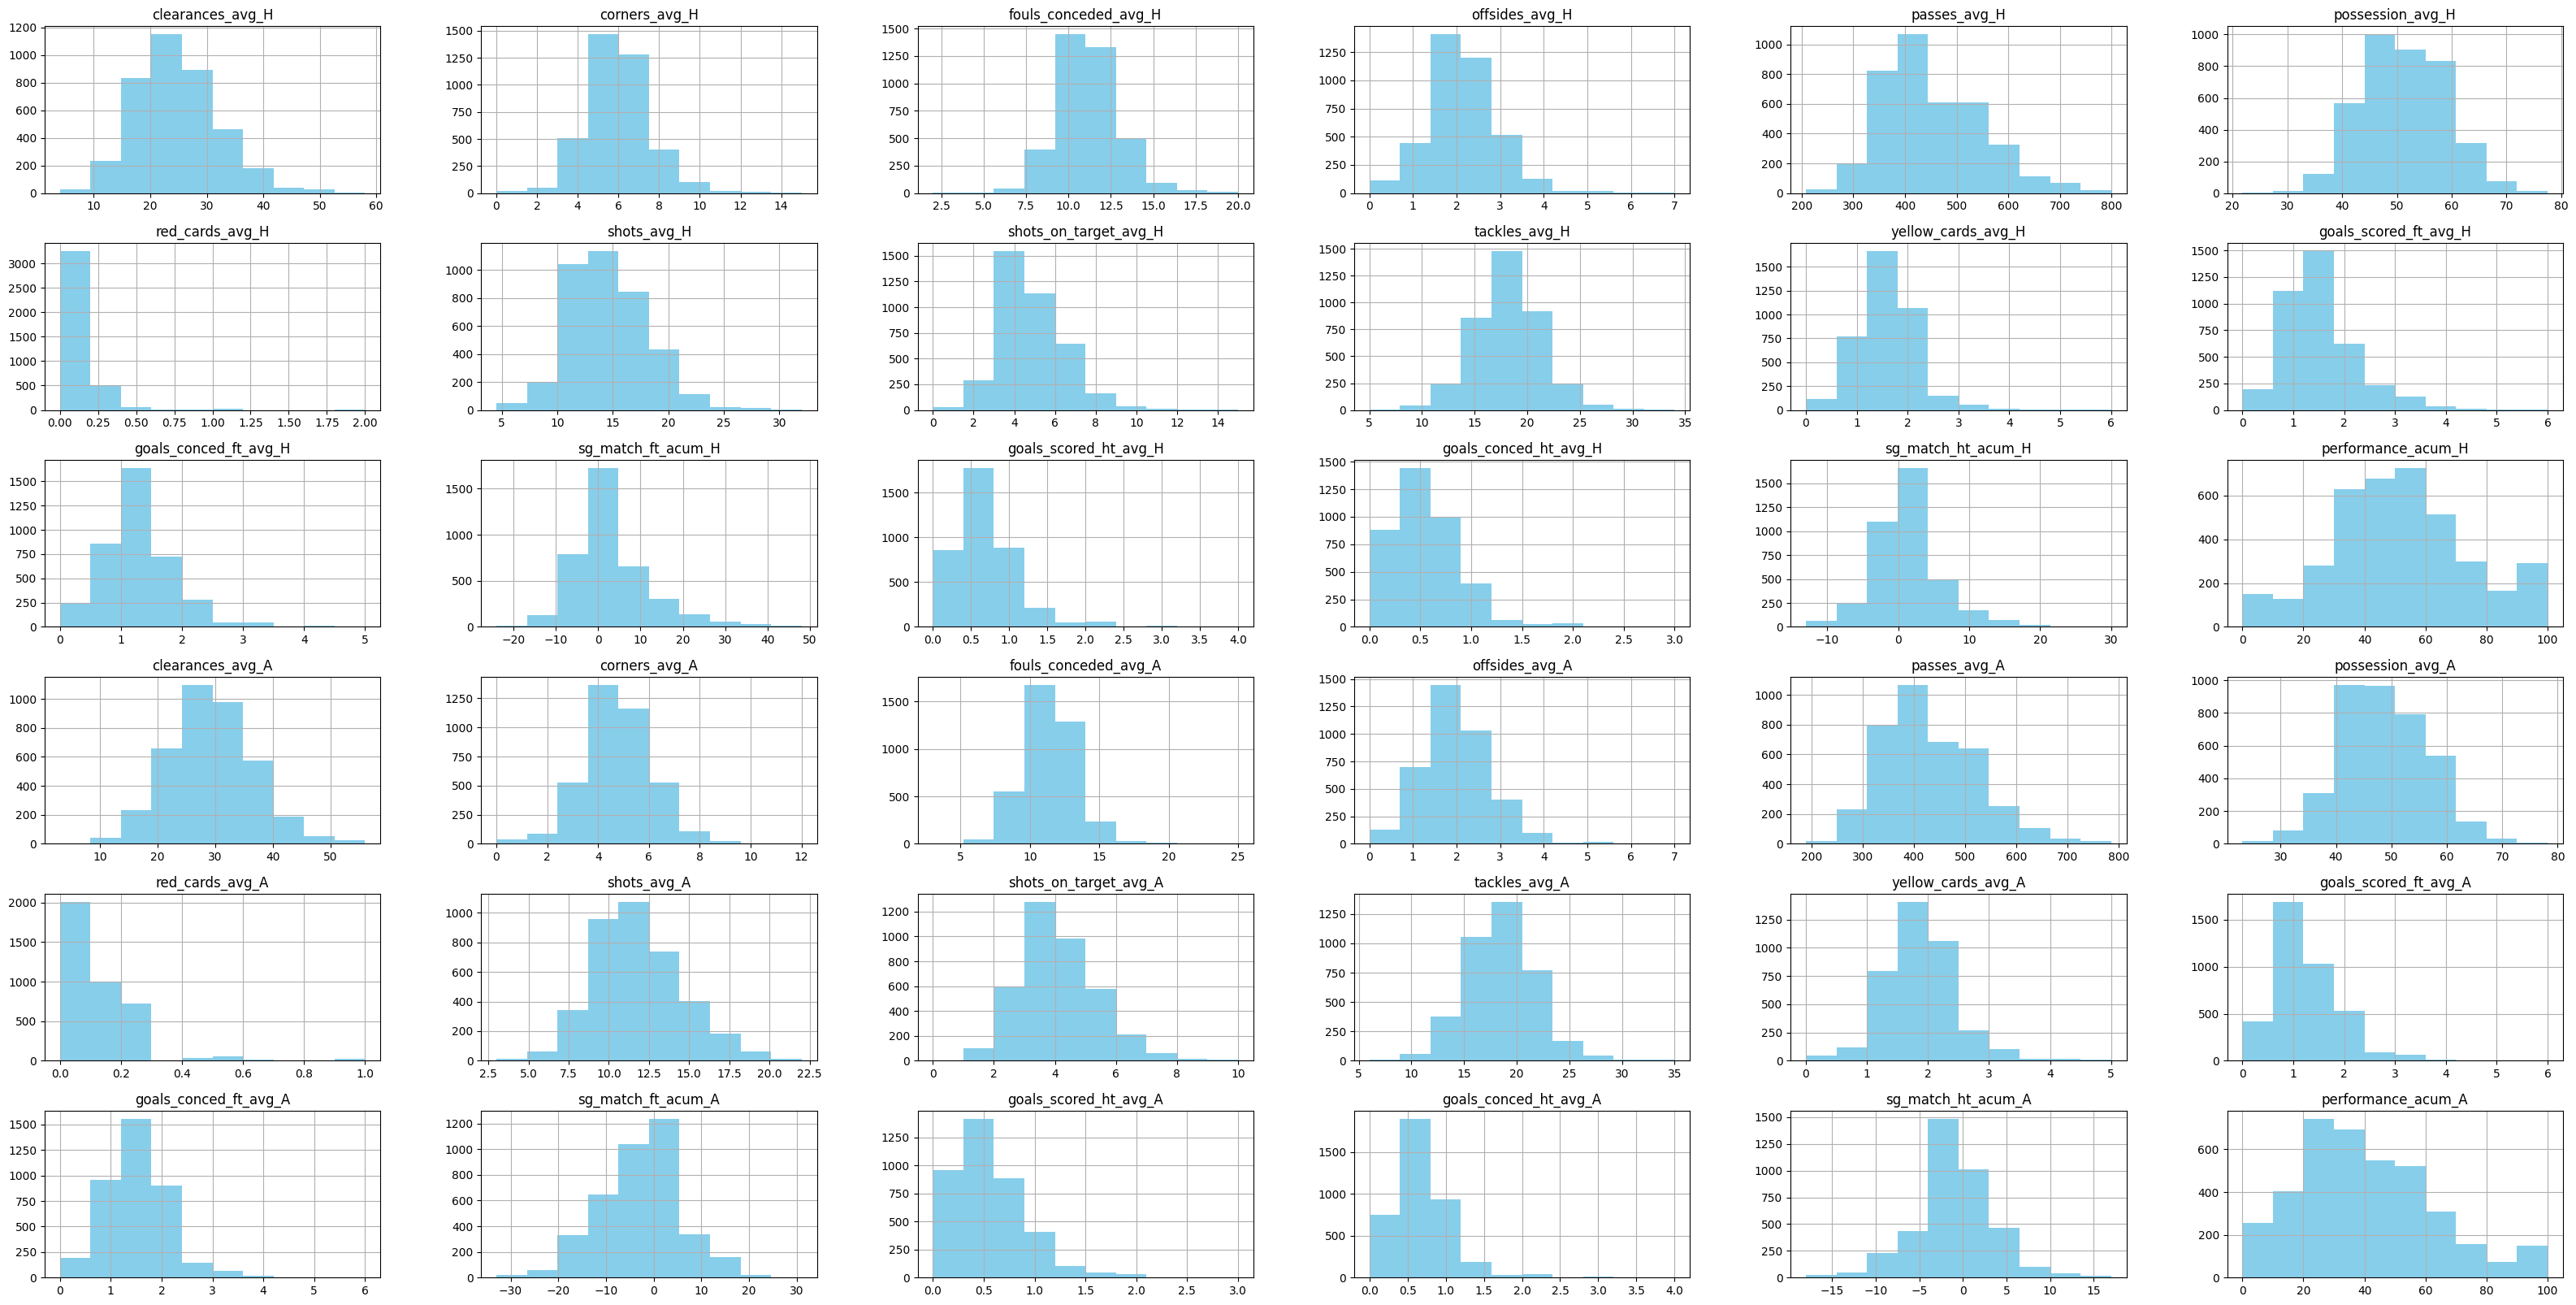

In [164]:
data.hist(color = "skyblue", figsize = (40,20))

In [165]:
data.describe()

clearances_avg_H  corners_avg_H  fouls_conceded_avg_H  offsides_avg_H  \
count       3850.000000    3850.000000           3850.000000     3850.000000   
mean          24.682857       5.894831             11.069922        2.093974   
std            7.320653       1.551925              1.801447        0.780947   
min            4.000000       0.000000              2.000000        0.000000   
25%           19.700000       4.900000              9.900000        1.700000   
50%           24.000000       5.800000             11.000000        2.000000   
75%           29.175000       6.800000             12.100000        2.500000   
max           58.000000      15.000000             20.000000        7.000000   

       passes_avg_H  possession_avg_H  red_cards_avg_H  shots_avg_H  \
count   3850.000000       3850.000000      3850.000000  3850.000000   
mean     451.819636         51.296026         0.072597    14.558312   
std       96.174827          7.619671         0.123472     3.530714   
min      208.000000         21.800000         0.000000     4.500000   
25%      381.600000         46.000000         0.000000    12.000000   
50%      432.450000         50.700000         0.000000    14.200000   
75%      522.375000         57.000000         0.100000    16.900000   
max      799.000000         77.500000         2.000000    32.000000   

       shots_on_target_avg_H  tackles_avg_H  ...  shots_on_target_avg_A  \
count            3850.000000    3850.000000  ...            3850.000000   
mean                4.748390      18.068026  ...               4.008390   
std                 1.607424       3.156896  ...               1.266075   
min                 0.000000       5.000000  ...               0.000000   
25%                 3.600000      16.100000  ...               3.100000   
50%                 4.500000      18.000000  ...               3.900000   
75%                 5.700000      20.000000  ...               4.800000   
max                15.000000      34.000000  ...              10.000000   

       tackles_avg_A  yellow_cards_avg_A  goals_scored_ft_avg_A  \
count    3850.000000         3850.000000            3850.000000   
mean       18.481844            1.800753               1.234182   
std         3.332815            0.587217               0.637370   
min         6.000000            0.000000               0.000000   
25%        16.200000            1.500000               0.820000   
50%        18.400000            1.800000               1.110000   
75%        20.500000            2.100000               1.570000   
max        35.000000            5.000000               6.000000   

       goals_conced_ft_avg_A  sg_match_ft_acum_A  goals_scored_ht_avg_A  \
count            3850.000000         3850.000000            3850.000000   
mean                1.508148           -2.889870               0.542545   
std                 0.626817            8.379405               0.368500   
min                 0.000000          -33.000000               0.000000   
25%                 1.092500           -8.000000               0.300000   
50%                 1.500000           -2.000000               0.500000   
75%                 1.880000            2.000000               0.730000   
max                 6.000000           31.000000               3.000000   

       goals_conced_ht_avg_A  sg_match_ht_acum_A  performance_acum_A  
count            3850.000000         3850.000000         3850.000000  
mean                0.667823           -1.237403           40.010909  
std                 0.387800            4.395167           22.516177  
min                 0.000000          -18.000000            0.000000  
25%                 0.440000           -3.000000           24.200000  
50%                 0.640000           -1.000000           36.400000  
75%                 0.867500            1.000000           53.300000  
max                 4.000000           17.000000          100.000000  

[8 rows x 36 columns]

### Checking Null Values

In [166]:
data.isna().sum()

season                     0
home_team                  0
away_team                  0
clearances_avg_H         220
corners_avg_H            220
fouls_conceded_avg_H     220
offsides_avg_H           220
passes_avg_H             220
possession_avg_H         220
red_cards_avg_H          220
shots_avg_H              220
shots_on_target_avg_H    220
tackles_avg_H            220
yellow_cards_avg_H       220
goals_scored_ft_avg_H    220
goals_conced_ft_avg_H    220
sg_match_ft_acum_H       220
goals_scored_ht_avg_H    220
goals_conced_ht_avg_H    220
sg_match_ht_acum_H       220
performance_acum_H       220
clearances_avg_A         220
corners_avg_A            220
fouls_conceded_avg_A     220
offsides_avg_A           220
passes_avg_A             220
possession_avg_A         220
red_cards_avg_A          220
shots_avg_A              220
shots_on_target_avg_A    220
tackles_avg_A            220
yellow_cards_avg_A       220
goals_scored_ft_avg_A    220
goals_conced_ft_avg_A    220
sg_match_ft_ac

In [167]:

#finding % of missing data in dataset
for col in list(data.columns):
  print(
      "Percent of Missing Data in {} Coloumn = {}%".format(col, str((data[col].isnull().sum() / len(data)) * 100))
      
  )

  # Storing column names having null values
  cols_having_null = [col for col in list(data.columns) if data[col].isnull().sum() != 0]

Percent of Missing Data in season Coloumn = 0.0%
Percent of Missing Data in home_team Coloumn = 0.0%
Percent of Missing Data in away_team Coloumn = 0.0%
Percent of Missing Data in clearances_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in corners_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in fouls_conceded_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in offsides_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in passes_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in possession_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in red_cards_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in shots_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in shots_on_target_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in tackles_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in yellow_cards_avg_H Coloumn = 5.405405405405405%
Percent of Missing Data in goals_scored_ft_avg_H Co

All the numeric columns in epl dataset has arounf 5% null values

### Imputation Methods

#### 1. Imputing Null Values using KNN

In [168]:
encoder = OrdinalEncoder()
imputer = KNN()

In [169]:
# Categorical or Numerical Coloumns
categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['season', 'home_team', 'away_team', 'Winner']
Numerical Columns :  ['clearances_avg_H', 'corners_avg_H', 'fouls_conceded_avg_H', 'offsides_avg_H', 'passes_avg_H', 'possession_avg_H', 'red_cards_avg_H', 'shots_avg_H', 'shots_on_target_avg_H', 'tackles_avg_H', 'yellow_cards_avg_H', 'goals_scored_ft_avg_H', 'goals_conced_ft_avg_H', 'sg_match_ft_acum_H', 'goals_scored_ht_avg_H', 'goals_conced_ht_avg_H', 'sg_match_ht_acum_H', 'performance_acum_H', 'clearances_avg_A', 'corners_avg_A', 'fouls_conceded_avg_A', 'offsides_avg_A', 'passes_avg_A', 'possession_avg_A', 'red_cards_avg_A', 'shots_avg_A', 'shots_on_target_avg_A', 'tackles_avg_A', 'yellow_cards_avg_A', 'goals_scored_ft_avg_A', 'goals_conced_ft_avg_A', 'sg_match_ft_acum_A', 'goals_scored_ht_avg_A', 'goals_conced_ht_avg_A', 'sg_match_ht_acum_A', 'performance_acum_A']


In [170]:
data_with_nulls = data.copy(deep=True)
knn_impute_df = data.copy(deep=True)

# None of the categorical features have null values; hence applying KNN imputation on numeric columns only
knn_impute_numerical_df = pd.DataFrame(
        (imputer.fit_transform(data_with_nulls[numerical_columns])), columns=numerical_columns
    )


knn_impute_df[numerical_columns] = knn_impute_numerical_df

Imputing row 1/4070 with 0 missing, elapsed time: 9.412
Imputing row 101/4070 with 0 missing, elapsed time: 9.415
Imputing row 201/4070 with 0 missing, elapsed time: 9.419
Imputing row 301/4070 with 0 missing, elapsed time: 9.420
Imputing row 401/4070 with 0 missing, elapsed time: 9.420
Imputing row 501/4070 with 36 missing, elapsed time: 9.423
Imputing row 601/4070 with 0 missing, elapsed time: 9.425
Imputing row 701/4070 with 0 missing, elapsed time: 9.428
Imputing row 801/4070 with 0 missing, elapsed time: 9.428
Imputing row 901/4070 with 0 missing, elapsed time: 9.431
Imputing row 1001/4070 with 0 missing, elapsed time: 9.434
Imputing row 1101/4070 with 0 missing, elapsed time: 9.435
Imputing row 1201/4070 with 0 missing, elapsed time: 9.436
Imputing row 1301/4070 with 0 missing, elapsed time: 9.438
Imputing row 1401/4070 with 0 missing, elapsed time: 9.439
Imputing row 1501/4070 with 0 missing, elapsed time: 9.440
Imputing row 1601/4070 with 0 missing, elapsed time: 9.442
Imputing

In [171]:
# Checking if entries are imputed
print(data.isnull().sum())
print("\nAfter Imputing the Data\n")
print(knn_impute_df.isnull().sum())

season                     0
home_team                  0
away_team                  0
clearances_avg_H         220
corners_avg_H            220
fouls_conceded_avg_H     220
offsides_avg_H           220
passes_avg_H             220
possession_avg_H         220
red_cards_avg_H          220
shots_avg_H              220
shots_on_target_avg_H    220
tackles_avg_H            220
yellow_cards_avg_H       220
goals_scored_ft_avg_H    220
goals_conced_ft_avg_H    220
sg_match_ft_acum_H       220
goals_scored_ht_avg_H    220
goals_conced_ht_avg_H    220
sg_match_ht_acum_H       220
performance_acum_H       220
clearances_avg_A         220
corners_avg_A            220
fouls_conceded_avg_A     220
offsides_avg_A           220
passes_avg_A             220
possession_avg_A         220
red_cards_avg_A          220
shots_avg_A              220
shots_on_target_avg_A    220
tackles_avg_A            220
yellow_cards_avg_A       220
goals_scored_ft_avg_A    220
goals_conced_ft_avg_A    220
sg_match_ft_ac

#### 2. Mean & Mode Method

------- UnImputed vs Imputed for clearances_avg_H -------


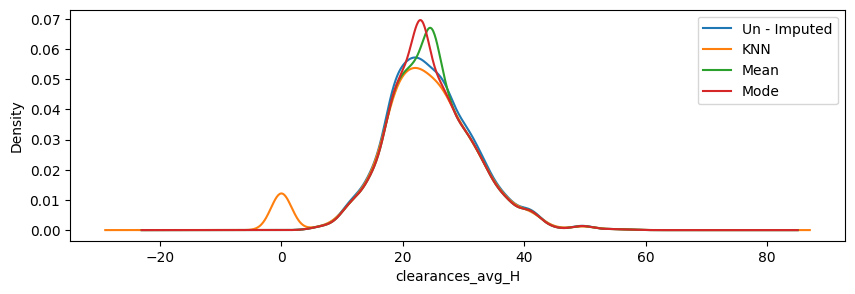

------- UnImputed vs Imputed for corners_avg_H -------


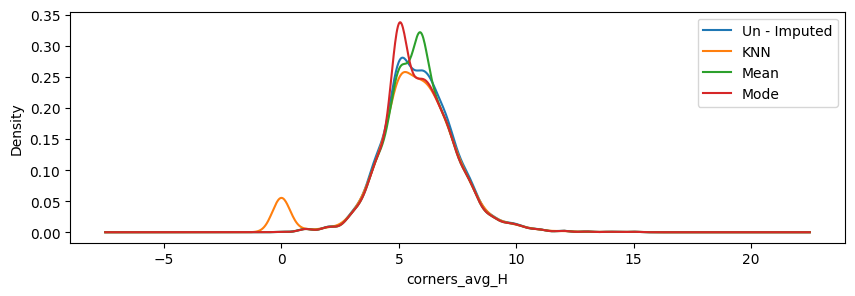

------- UnImputed vs Imputed for fouls_conceded_avg_H -------


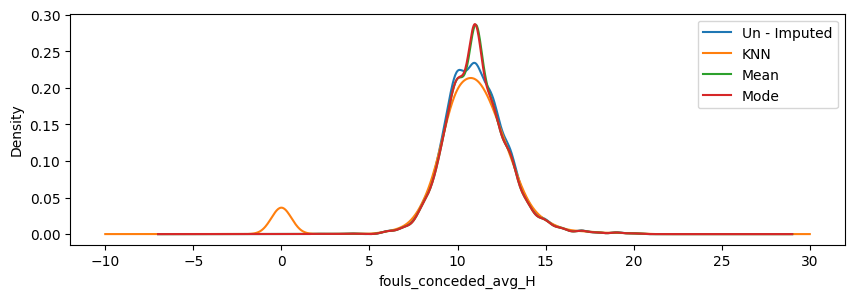

------- UnImputed vs Imputed for offsides_avg_H -------


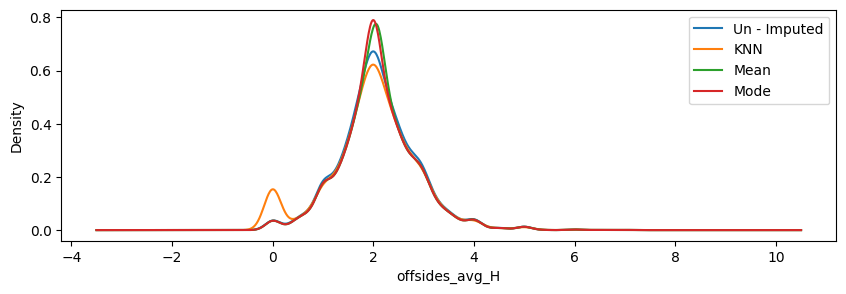

------- UnImputed vs Imputed for passes_avg_H -------


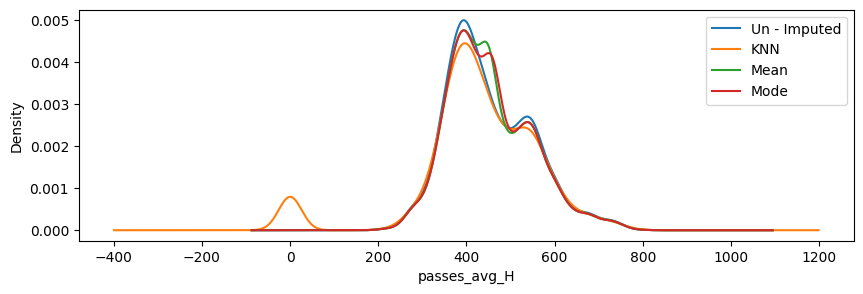

------- UnImputed vs Imputed for possession_avg_H -------


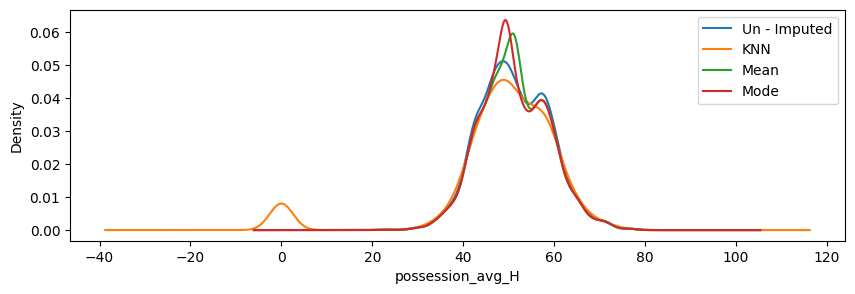

------- UnImputed vs Imputed for red_cards_avg_H -------


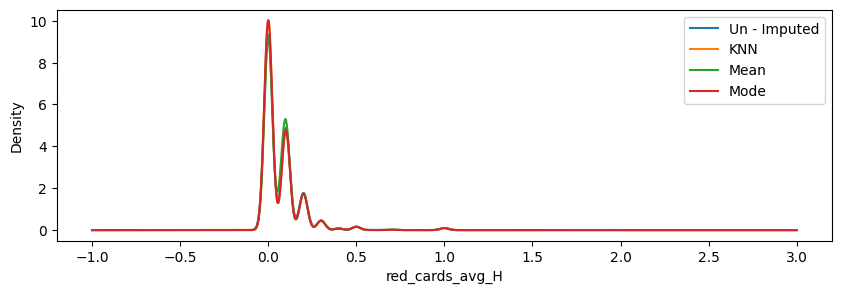

------- UnImputed vs Imputed for shots_avg_H -------


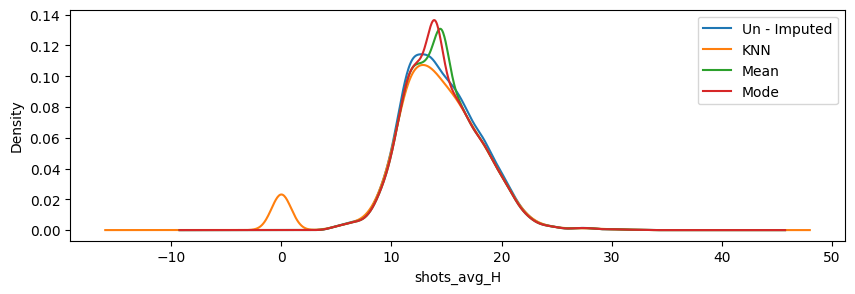

------- UnImputed vs Imputed for shots_on_target_avg_H -------


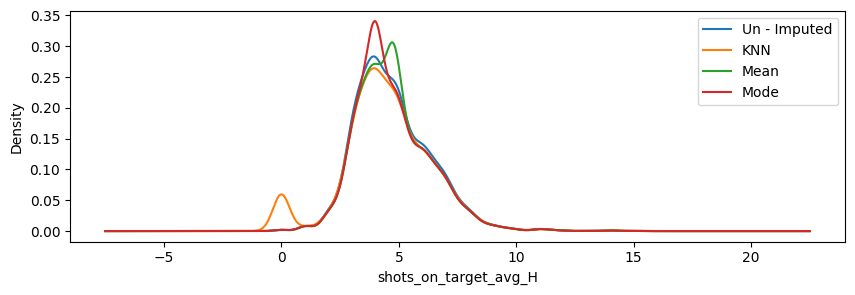

------- UnImputed vs Imputed for tackles_avg_H -------


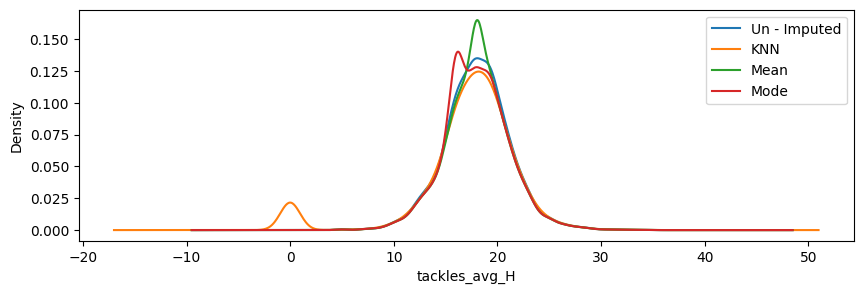

------- UnImputed vs Imputed for yellow_cards_avg_H -------


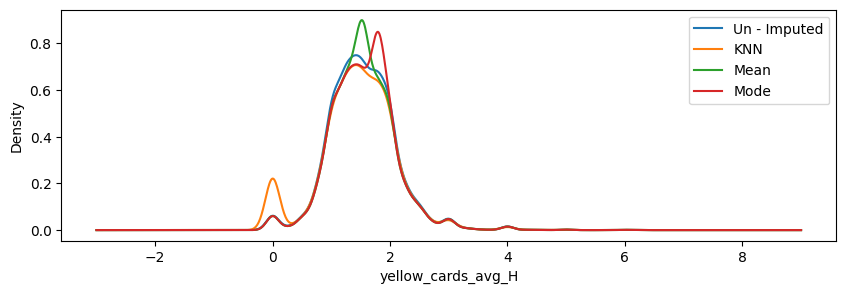

------- UnImputed vs Imputed for goals_scored_ft_avg_H -------


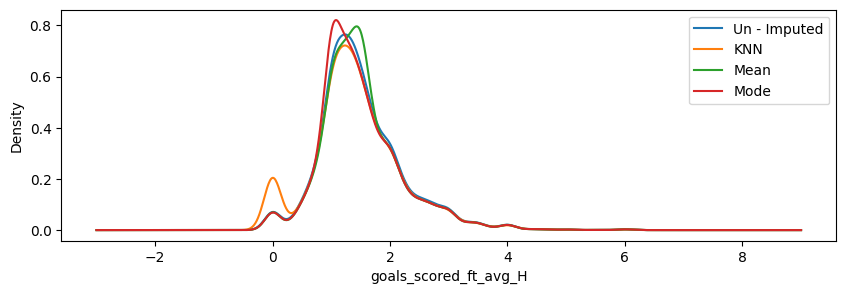

------- UnImputed vs Imputed for goals_conced_ft_avg_H -------


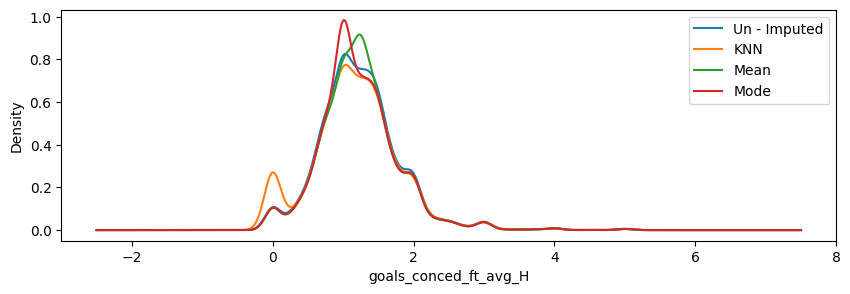

------- UnImputed vs Imputed for sg_match_ft_acum_H -------


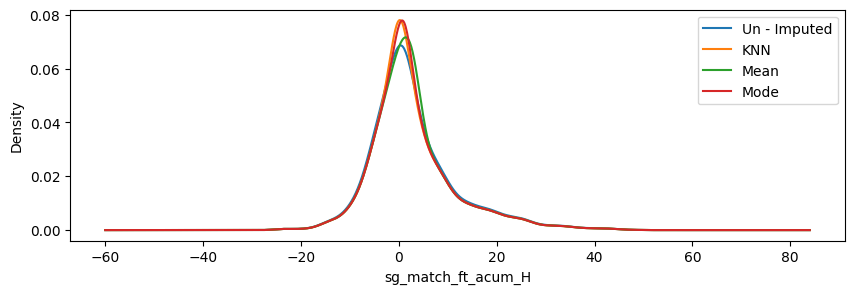

------- UnImputed vs Imputed for goals_scored_ht_avg_H -------


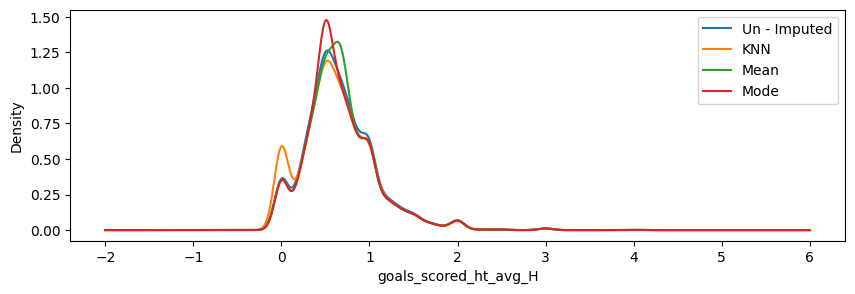

------- UnImputed vs Imputed for goals_conced_ht_avg_H -------


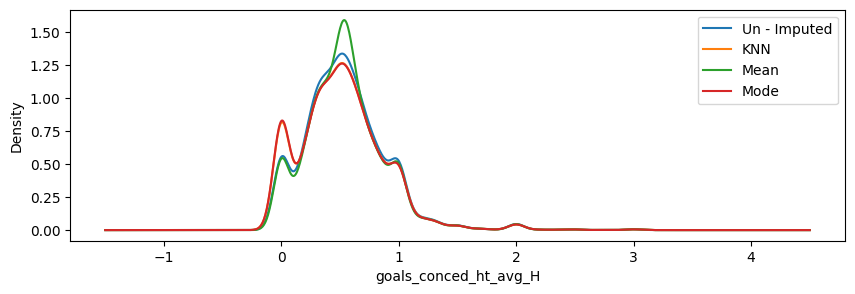

------- UnImputed vs Imputed for sg_match_ht_acum_H -------


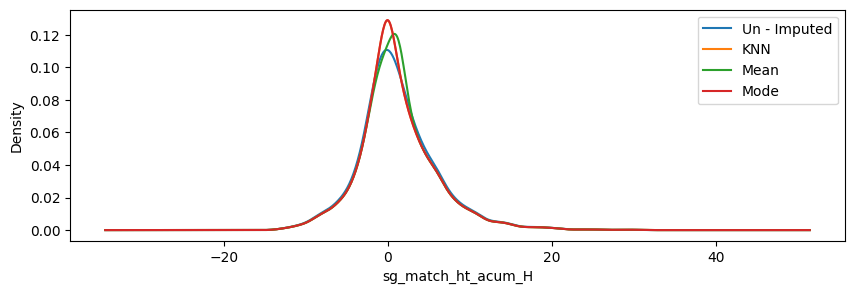

------- UnImputed vs Imputed for performance_acum_H -------


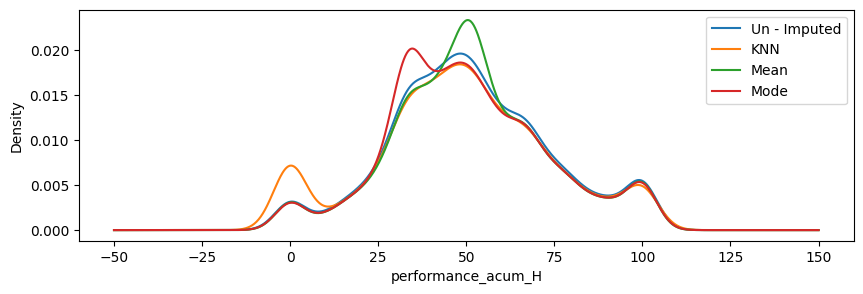

------- UnImputed vs Imputed for clearances_avg_A -------


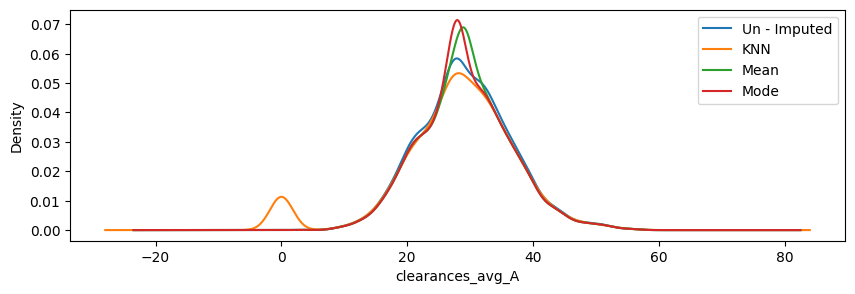

------- UnImputed vs Imputed for corners_avg_A -------


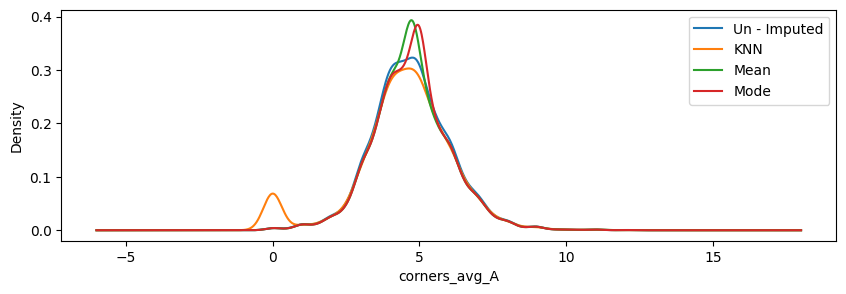

------- UnImputed vs Imputed for fouls_conceded_avg_A -------


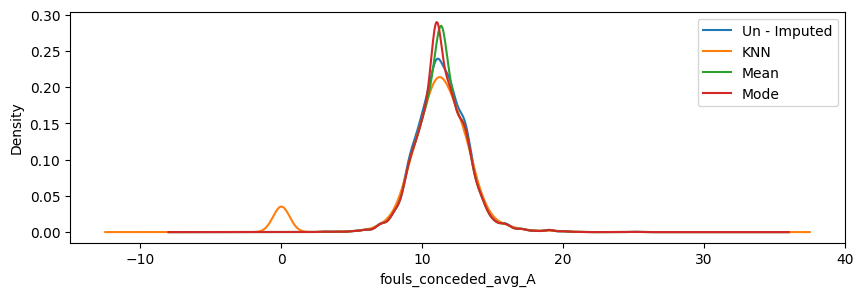

------- UnImputed vs Imputed for offsides_avg_A -------


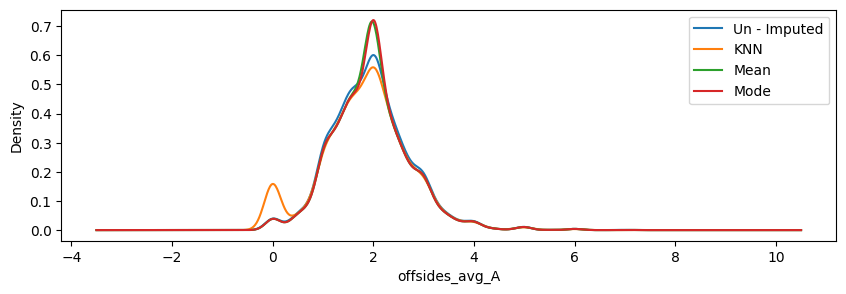

------- UnImputed vs Imputed for passes_avg_A -------


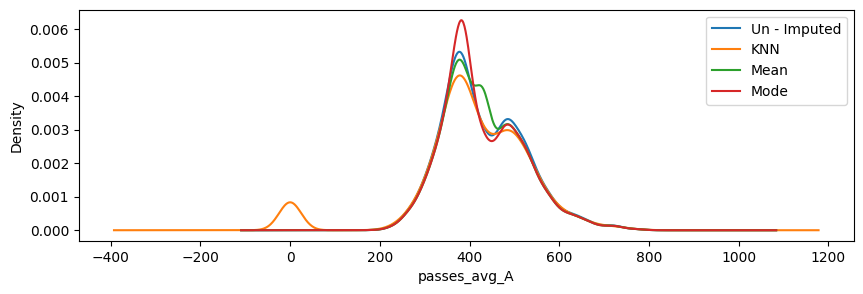

------- UnImputed vs Imputed for possession_avg_A -------


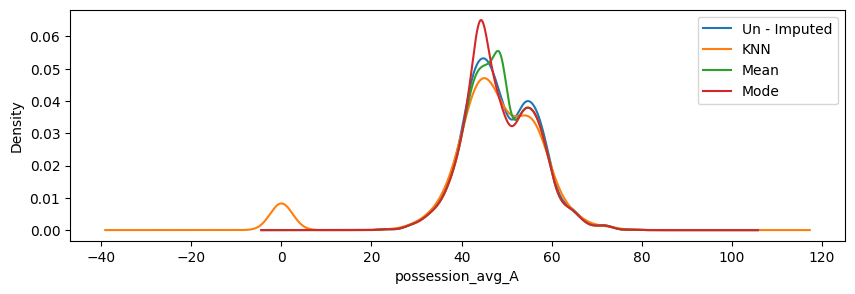

------- UnImputed vs Imputed for red_cards_avg_A -------


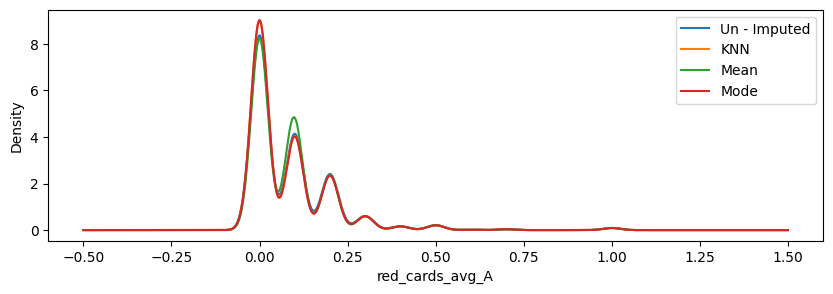

------- UnImputed vs Imputed for shots_avg_A -------


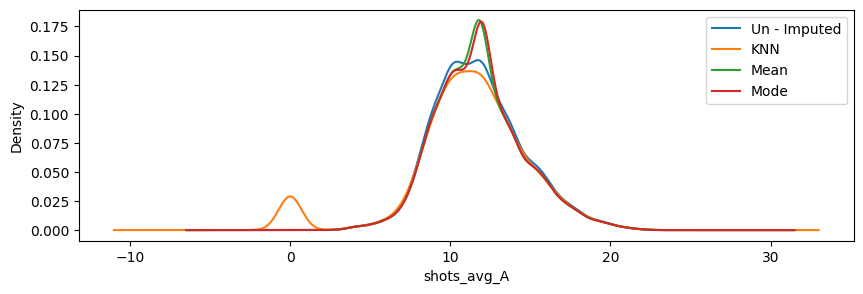

------- UnImputed vs Imputed for shots_on_target_avg_A -------


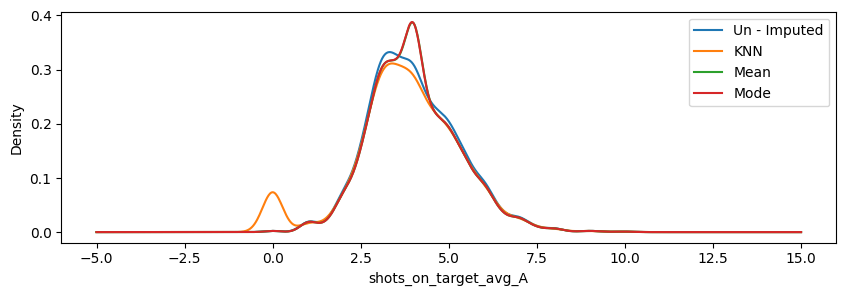

------- UnImputed vs Imputed for tackles_avg_A -------


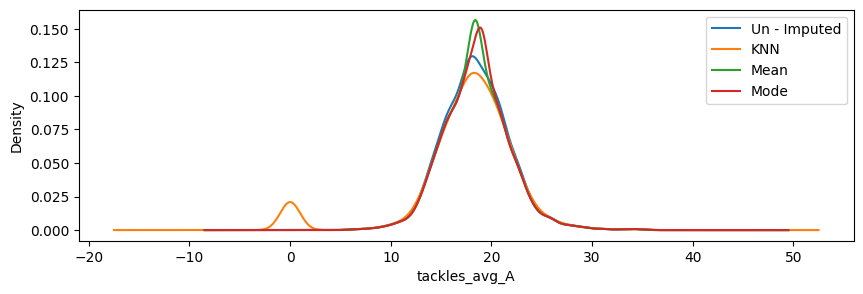

------- UnImputed vs Imputed for yellow_cards_avg_A -------


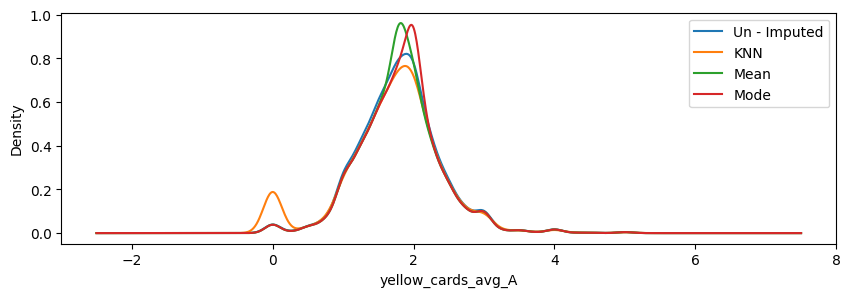

------- UnImputed vs Imputed for goals_scored_ft_avg_A -------


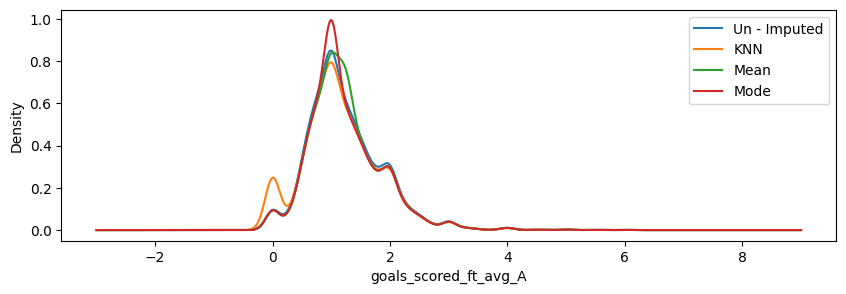

------- UnImputed vs Imputed for goals_conced_ft_avg_A -------


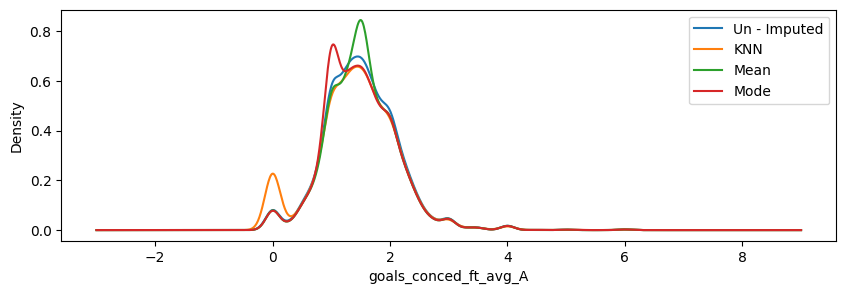

------- UnImputed vs Imputed for sg_match_ft_acum_A -------


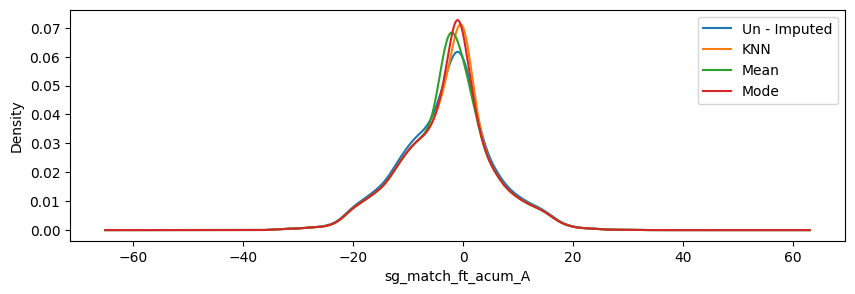

------- UnImputed vs Imputed for goals_scored_ht_avg_A -------


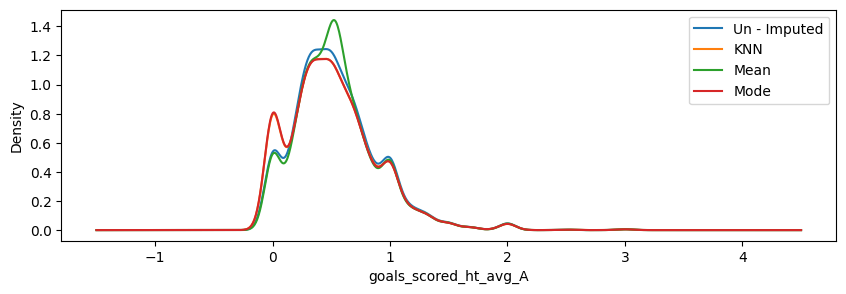

------- UnImputed vs Imputed for goals_conced_ht_avg_A -------


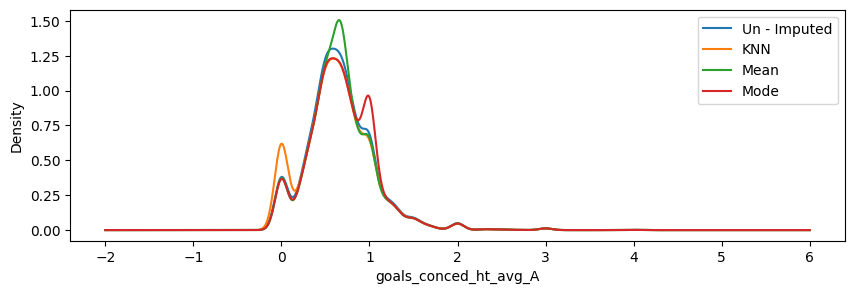

------- UnImputed vs Imputed for sg_match_ht_acum_A -------


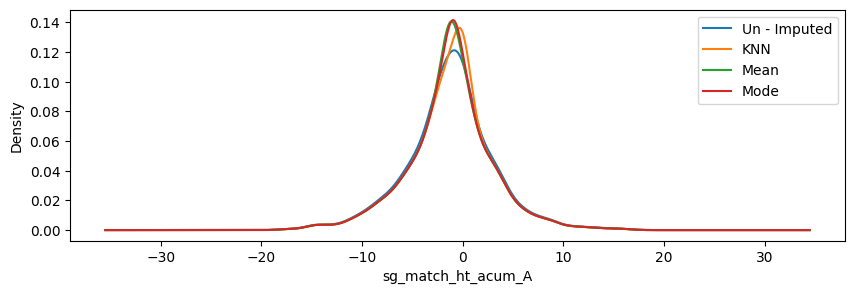

------- UnImputed vs Imputed for performance_acum_A -------


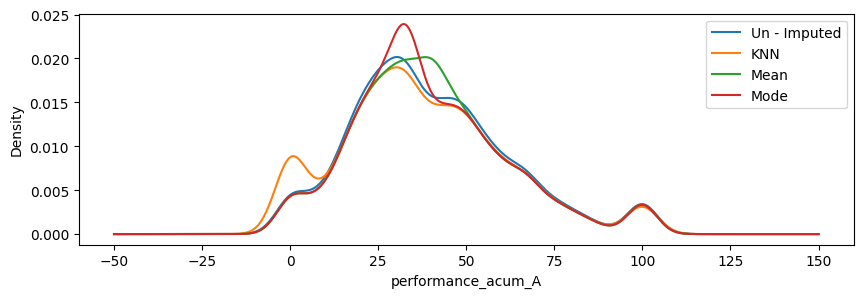

In [172]:
plt.rcParams["figure.figsize"] = (10,3)

# Statistical Difference in columns having null values after KNN Imputation
# Mean
mean_impute_df = data.copy(deep=True)
# Median
median_impute_df = data.copy(deep=True)

for col in list(numerical_columns):

  
  mean_impute_df[col] = mean_impute_df[col].fillna(mean_impute_df[col].mean() )
  median_impute_df[col] = median_impute_df[col].fillna(median_impute_df[col].mode()[0])

  print("------- UnImputed vs Imputed for {} -------".format(col))
  data[col].plot(kind="kde")
  knn_impute_df[col].plot(kind="kde")
  mean_impute_df[col].plot(kind="kde")
  median_impute_df[col].plot(kind="kde")

  plt.legend(["Un - Imputed", "KNN", "Mean", "Mode"])
  plt.xlabel(col)
  plt.show()

As observed in above plots, KNN works better than Mean and Mode methods and hence we will use KNN impoutation for entire dataset

### Encoding Target Variable

Target variable contains values like "Home", "Away" and "Draw". We need to encode these categorical values into numeric values. Label encoding can be used for it as it will assign 0, 1, 2 values to 3 classes repectively.

In [173]:
# Applying label encoding to target variable
le = preprocessing.LabelEncoder()

knn_impute_df['Winner'] = le.fit_transform(knn_impute_df['Winner'])

le.classes_

array(['Away', 'Draw', 'Home'], dtype=object)

In [174]:
knn_impute_df.head()

season          home_team             away_team  clearances_avg_H  \
0  10/11          Blackpool  West Bromwich Albion              41.0   
1  10/11          Liverpool       Manchester City              28.8   
2  10/11  Manchester United               Arsenal              20.0   
3  10/11         Stoke City           Aston Villa              17.0   
4  10/11             Fulham               Chelsea              36.8   

   corners_avg_H  fouls_conceded_avg_H  offsides_avg_H  passes_avg_H  \
0            5.0                  11.7             3.7         453.7   
1            6.7                  12.3             2.7         434.7   
2            5.4                   9.5             2.8         540.9   
3            6.0                  15.0             2.0         317.0   
4            5.3                  11.7             3.0         475.5   

   possession_avg_H  red_cards_avg_H  ...  tackles_avg_A  yellow_cards_avg_A  \
0              56.2              0.0  ...           23.8                 1.2   
1              52.3              0.1  ...           22.5                 2.5   
2              58.4              0.0  ...           22.8                 1.6   
3              41.7              0.0  ...           26.0                 1.0   
4              54.0              0.0  ...           21.4                 1.8   

   goals_scored_ft_avg_A  goals_conced_ft_avg_A  sg_match_ft_acum_A  \
0                   1.25                   2.75                -6.0   
1                   1.47                   1.07                 6.0   
2                   1.88                   1.00                 7.0   
3                   0.00                   6.00                -6.0   
4                   1.69                   1.08                 8.0   

   goals_scored_ht_avg_A  goals_conced_ht_avg_A  sg_match_ht_acum_A  \
0                   0.00                   1.00                -4.0   
1                   0.80                   0.27                 8.0   
2                   0.88                   0.25                 5.0   
3                   0.00                   3.00                -3.0   
4                   0.69                   0.77                -1.0   

   performance_acum_A  Winner  
0                33.3       2  
1                48.9       2  
2                70.8       2  
3                 0.0       2  
4                46.2       1  

[5 rows x 40 columns]

### Encoding Categorical Features

We need to encode categorical columns as well. Here we cannot use One Hot Encoding or label encoding as the number of values is large and there is no ordinality between these values.

In [175]:
cat_features = list(set(categorical_columns) - set(['Winner']))
print(cat_features)
for cat_col in cat_features:
  encoding = knn_impute_df.groupby(cat_col)['Winner'].mean()

  # Map the mean back to the original data
  knn_impute_df[cat_col+'_encoded'] = knn_impute_df[cat_col].map(encoding)

knn_impute_df.head()

['season', 'away_team', 'home_team']


season          home_team             away_team  clearances_avg_H  \
0  10/11          Blackpool  West Bromwich Albion              41.0   
1  10/11          Liverpool       Manchester City              28.8   
2  10/11  Manchester United               Arsenal              20.0   
3  10/11         Stoke City           Aston Villa              17.0   
4  10/11             Fulham               Chelsea              36.8   

   corners_avg_H  fouls_conceded_avg_H  offsides_avg_H  passes_avg_H  \
0            5.0                  11.7             3.7         453.7   
1            6.7                  12.3             2.7         434.7   
2            5.4                   9.5             2.8         540.9   
3            6.0                  15.0             2.0         317.0   
4            5.3                  11.7             3.0         475.5   

   possession_avg_H  red_cards_avg_H  ...  goals_conced_ft_avg_A  \
0              56.2              0.0  ...                   2.75   
1              52.3              0.1  ...                   1.07   
2              58.4              0.0  ...                   1.00   
3              41.7              0.0  ...                   6.00   
4              54.0              0.0  ...                   1.08   

   sg_match_ft_acum_A  goals_scored_ht_avg_A  goals_conced_ht_avg_A  \
0                -6.0                   0.00                   1.00   
1                 6.0                   0.80                   0.27   
2                 7.0                   0.88                   0.25   
3                -6.0                   0.00                   3.00   
4                 8.0                   0.69                   0.77   

   sg_match_ht_acum_A  performance_acum_A  Winner  season_encoded  \
0                -4.0                33.3       2        1.234211   
1                 8.0                48.9       2        1.234211   
2                 5.0                70.8       2        1.234211   
3                -3.0                 0.0       2        1.234211   
4                -1.0                46.2       1        1.234211   

   away_team_encoded  home_team_encoded  
0           1.290909           0.789474  
1           0.665025           1.480392  
2           0.916667           1.512315  
3           1.319728           1.125000  
4           0.808824           0.926606  

[5 rows x 43 columns]

In [176]:
knn_impute_df.drop(columns = cat_features, inplace=True)
knn_impute_df.tail()

clearances_avg_H  corners_avg_H  fouls_conceded_avg_H  offsides_avg_H  \
4065              13.9            7.1                  10.5             1.3   
4066              17.0            4.2                  10.8             2.6   
4067              17.8            4.0                  10.4             1.8   
4068              18.6            4.9                  11.7             2.4   
4069              24.3            4.0                  10.6             1.7   

      passes_avg_H  possession_avg_H  red_cards_avg_H  shots_avg_H  \
4065         686.5              65.8              0.0         18.2   
4066         372.1              42.5              0.0          9.1   
4067         389.4              42.2              0.0          7.2   
4068         418.6              44.6              0.0         10.2   
4069         383.9              41.8              0.0          9.4   

      shots_on_target_avg_H  tackles_avg_H  ...  goals_conced_ft_avg_A  \
4065                    6.5           10.6  ...                   1.40   
4066                    2.8           13.6  ...                   0.85   
4067                    2.5           17.4  ...                   1.00   
4068                    3.6           17.8  ...                   0.77   
4069                    3.7           10.1  ...                   1.71   

      sg_match_ft_acum_A  goals_scored_ht_avg_A  goals_conced_ht_avg_A  \
4065                -2.0                   0.60                   0.80   
4066                14.0                   0.69                   0.38   
4067                12.0                   0.69                   0.77   
4068                 8.0                   0.62                   0.23   
4069                 4.0                   0.86                   1.00   

      sg_match_ht_acum_A  performance_acum_A  Winner  season_encoded  \
4065                -2.0                40.0       0         0.96679   
4066                 4.0                76.9       1         0.96679   
4067                -1.0                74.4       1         0.96679   
4068                 5.0                59.0       2         0.96679   
4069                -1.0                47.6       1         0.96679   

      away_team_encoded  home_team_encoded  
4065           1.342857           1.480392  
4066           1.054264           0.972727  
4067           0.756098           0.863014  
4068           1.319728           0.882353  
4069           0.822660           1.048913  

[5 rows x 40 columns]

In [177]:
knn_impute_df.drop(columns = ['home_team_encoded', 'away_team_encoded'], inplace=True)

### **Preliminary findings from the EDA.**

Datatype Check - All the features in the dataset are Integers/ Float.

Missing Data Check - Our Dataset had 5% missing values in all the features, which we have imputed using KNN method.

Distribution of training data - The probability distribution of each and every feature in the training dataset has been checked and is normal

Correlation Check - I performed a correlation check on the dataset using heatmapt. 2 Feaures which were highly correlated with other features have been removed..

## Feature Importance and Selection

#### **What is Feature Selection?**

Feature selection, one of the main components of feature engineering, is the process of selecting the most important features to input in machine learning algorithms. Feature selection techniques are employed to reduce the number of input variables by eliminating redundant or irrelevant features and narrowing down the set of features to those most relevant to the machine learning model. 

The main benefits of performing feature selection in advance, rather than letting the machine learning model figure out which features are most important, include:

1. *simpler models*: simple models are easy to explain - a model that is too complex and unexplainable is not valuable
2. *shorter training times*: a more precise subset of features decreases the amount of time needed to train a model
3. *variance reduction*: increase the precision of the estimates that can be obtained for a given simulation 
4. avoid the curse of high dimensionality: dimensionally cursed phenomena states that, as dimensionality and the number of features increases, the volume of space increases so fast that the available data become limited

### OLS Analysis to get feature importance

In [178]:
 # Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = knn_impute_df.drop("Winner", axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, knn_impute_df.Winner), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [179]:
predictors = list(df.columns)

In [180]:
import statsmodels.formula.api as smf  # OLS model Library
str_preds = ''
for i, col in enumerate(predictors):
  if i == len(predictors)-1:
    str_preds += col
  else:
    str_preds += col + ' +'

final_formula = 'Winner ~ ' + str_preds
results = smf.ols(final_formula,
                  data=df_norm,).fit()
print(results.summary())  # OLS Linear Model Summary

                            OLS Regression Results                            
Dep. Variable:                 Winner   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     18.23
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          3.16e-108
Time:                        03:36:04   Log-Likelihood:                -4827.0
No. Observations:                4070   AIC:                             9730.
Df Residuals:                    4032   BIC:                             9970.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.89

#### **Null Hypothesis and P-value**
**Null Hypothesis**: 
A null hypothesis is a statement that assumes there is no significant difference between two groups, or that a certain relationship does not exist between two variables. 

For example, Let's say a company wants to test whether a new marketing campaign has led to an increase in sales. The null hypothesis in this case would be that the marketing campaign has had no effect on sales, and any observed differences in sales between the pre-campaign and post-campaign periods are due to chance or random variation.

**p-value**:
The p-value is a probability value that measures the strength of evidence against the null hypothesis.

In the above example, after collecting the data and calculating the difference in sales between the two periods, the company can use a statistical test such as a t-test to determine the p-value. The p-value represents the probability of observing the observed difference in sales (or a more extreme difference) if the null hypothesis were true. For example, if the p-value is 0.05, it means that there is a 5% chance of observing the observed difference (or a more extreme difference) in sales if the null hypothesis were true.

#### Interpreting Regression Co-efficients
**Model Co-efficients**

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target *increases* if the value of co-efficient *increases* and vice-versa. Whereas the negative values indicates that the value of target *increases* if the value of co-efficient *decreases* and vice versa.

As seen in the co-efficient coloumn in the above table
- Value for the variable passes_avg_H is highest = 1.3423
- Followed by sg_match_ft_acum_H = 0.7363


**P-Values**

If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

Following predictors have p value less than 0.05 and hence rest of the predictors can be dropped from further analyses:
1. yellow_cards_avg_A
2.goals_conced_ht_avg_H
3.passes_avg_H
4.passes_avg_A
5.corners_avg_A
6.possession_avg_H
7.season_encoded
8.shots_avg_H
9.sg_match_ft_acum_H
10.red_cards_avg_H


**Durbin-Watson**

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.
- Value of 2 indicates that no auto correlation is detected
- Value between 0 to 2 indicates that there is positive auto correlation detected
- Value between 2 to 4 indicates that there is negatibe auto correlation detected

Our model has a DW score of 2.041 which could be interpreted as a no auto-correlation in the residuals of 

In [181]:
df_norm_feature_selected = df_norm[
    [
        'yellow_cards_avg_A',
        'goals_conced_ht_avg_H',
        'passes_avg_H',
        'passes_avg_A',
        'corners_avg_A',
        'possession_avg_H',
        'season_encoded',
        'shots_avg_H',
        'sg_match_ft_acum_H',
        'red_cards_avg_H',
        'Winner'
    ]
]

In [182]:
str_preds = ''
new_predictors = [
        'yellow_cards_avg_A',
        'goals_conced_ht_avg_H',
        'passes_avg_H',
        'passes_avg_A',
        'corners_avg_A',
        'possession_avg_H',
        'season_encoded',
        'shots_avg_H',
        'sg_match_ft_acum_H',
        'red_cards_avg_H'
    ]

for i, col in enumerate(new_predictors):
  if i == len(new_predictors)-1:
    str_preds += col
  else:
    str_preds += col + ' +'

final_formula = 'Winner ~ ' + str_preds
results_with_selected_featres = smf.ols(final_formula,
                  data=df_norm_feature_selected,).fit()
print(results_with_selected_featres.summary())

                            OLS Regression Results                            
Dep. Variable:                 Winner   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     58.50
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          3.79e-111
Time:                        03:36:04   Log-Likelihood:                -4867.8
No. Observations:                4070   AIC:                             9758.
Df Residuals:                    4059   BIC:                             9827.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.77

The R-squared value has improved slightly from 0.13 to 0.12. Hence, we will be using above significant features for further analysis

## Splitting data into train and test

The data was splitted into Training ad Testing Data into 80% and 20% respectively.

In [183]:
imp_features = new_predictors

X = knn_impute_df[imp_features] # Training Feature
Y = knn_impute_df[['Winner']]  # Target

# predictors

In [184]:
# Splitting sample data for Random Forest Classifier
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.2, random_state=42
)


# Taking 50 samples out for SHAP linear analysis as it is a computationally expensive process

x_train_shap_sample = shap.utils.sample(
    x_train, 50
)  
x_test_shap_sample = shap.utils.sample(
    x_test, 50
)  



## Fitting Logistic Regression Model

In [185]:
# logistic regression for multi-class classification using a one-vs-rest

from sklearn.linear_model import LogisticRegression
# define model
lr_model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
# fit model
lr_model.fit(x_train, y_train)
# make predictions
y_pred_linear = lr_model.predict(x_test)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [186]:
from sklearn.metrics import accuracy_score

predicted_targets = np.array([])
actual_targets = np.array([])

train_predictions = lr_model.predict(x_train)
test_predictions = lr_model.predict(x_test)

train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)

# train_accs.append(train_acc)
# test_accs.append(test_acc)

predicted_targets = np.append(predicted_targets, test_predictions)
actual_targets = np.append(actual_targets, y_test)

Precision:  [0.48207171 0.         0.51336898]
Recall:  [0.484      0.         0.79778393]
F1 score:  [0.48303393 0.         0.62472885]


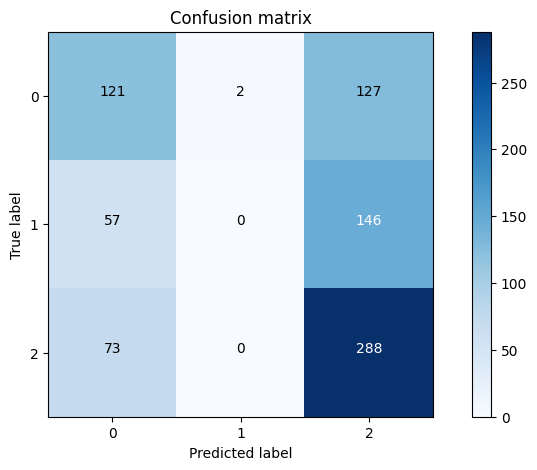

In [187]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, roc_curve, auc
import itertools

class_names = [0, 1, 2]

cm = confusion_matrix(actual_targets, predicted_targets)

classes = [0,1, 2]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plotting confusion matrix
im = ax.imshow(cm, cmap=plt.get_cmap('Blues'))
ax.set_title("Confusion matrix")
fig.colorbar(im, ax=ax)

tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticks(tick_marks)
ax.set_yticklabels(classes)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

fmt = 'd'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# calculating precision, recall, and F1 score, AUC-ROC score
precision = precision_score(actual_targets, predicted_targets, average=None)
recall = recall_score(actual_targets, predicted_targets, average=None)
f1 = f1_score(actual_targets, predicted_targets, average=None)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)


##Fit Tree Based Model

In [188]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
rf_model = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=10)
rf_model.fit(x_train, y_train)

print("Predicted values:")
y_pred_tree = rf_model.predict(x_test)
#rint(y_prediction_rf)

Predicted values:


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


## Fitting a Support Vector Machine (SVM)

In [189]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [190]:
svm_predictions = svm_model.predict(x_test).round()

## Fitting a MLP Classifier

In [191]:
from sklearn.neural_network import MLPClassifier

mlp_regr = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42).fit(x_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [192]:
mlp_predictions = mlp_regr.predict(x_test).round()

## Fitting an AutoML

In [193]:
epl_hf = h2o.H2OFrame(knn_impute_df)  # Converting Pandas dataframe in H2O dataframe

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [194]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = epl_hf.split_frame([pct_rows])

In [195]:
X = df_train.columns
y = "Winner"

X.remove(y)  # Removing the result frm our predictors data

aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
aml.train(
    x=X, y=y, training_frame=df_train
)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20230410_33612


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.5317552943457843
RMSE: 0.729215533532977
MAE: 0.6316862555941343
RMSLE: 0.4140364263406057
Mean Residual Deviance: 0.5317552943457843
R^2: 0.27391392299080985
Null degrees of freedom: 3242
Residual degrees of freedom: 3238
Null deviance: 2375.038544557582
Residual deviance: 1724.4824195633785
AIC: 7167.047756836938

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.6355396688499207
RMSE: 0.7972074189631709
MAE: 0.691507194430151
RMSLE: 0.4463046821521133
Mean Residual Deviance: 0.6355396688499207
R^2: 0.132201390666573
Null degrees of freedom: 3242
Residual degrees of freedom: 3238
Null deviance: 2375.736608705282
Residual deviance: 2061.055146080293
AIC: 7745.245793076597

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.691536  0.00917973  0.692021      0.686392      0.681229      0.705807      0.69223
mean_residual_deviance  0.635593  0.0162334   0.650459      0.617246      0.624179      0.654338      0.631741
mse                     0.635593  0.0162334   0.650459      0.617246      0.624179      0.654338      0.631741
null_deviance           475.147   13.7672     477.149       493.029       463.825       482.476       459.258
r2                      0.131533  0.0214776   0.109154      0.166129      0.128434      0.120035      0.133912
residual_deviance       412.211   12.1258     424.749       411.086       403.844       424.011       397.365
rmse                    0.797189  0.0101738   0.80651       0.78565       0.79005       0.808912      0.794821
rmsle                   0.44629   0.00503491  0.448094      0.44152       0.443855      0.454229      0.443752

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [196]:
aml.leaderboard  # Leaderbord of AutoML output

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_BestOfFamily_4_AutoML_1_20230410_33612  0.797207  0.63554   0.691507  0.446305                  0.63554
StackedEnsemble_BestOfFamily_3_AutoML_1_20230410_33612  0.798179  0.63709   0.692798  0.446784                  0.63709
StackedEnsemble_AllModels_2_AutoML_1_20230410_33612     0.798319  0.637313  0.692911  0.44683                   0.637313
StackedEnsemble_AllModels_1_AutoML_1_20230410_33612     0.798357  0.637373  0.693502  0.446937                  0.637373
GBM_grid_1_AutoML_1_20230410_33612_model_7              0.798558  0.637696  0.696026  0.44709                   0.637696
StackedEnsemble_BestOfFamily_2_AutoML_1_20230410_33612  0.798828  0.638126  0.69336   0.447174                  0.638126
StackedEnsemble_AllModels_3_AutoML_1_20230410_33612     0.799296  0.638874  0.692875  0.447002                  0.638874
StackedEnsemble_BestOfFamily_1_AutoML_1_20230410_33612  0.799639  0.639423  0.694379  0.447641                  0.639423
GLM_1_AutoML_1_20230410_33612                           0.800162  0.64026   0.696276  0.448453                  0.64026
GBM_grid_1_AutoML_1_20230410_33612_model_6              0.800531  0.64085   0.699307  0.447952                  0.64085
[43 rows x 6 columns]

In [197]:
# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    gbm_index = 0
    gbm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GBM" in m:
            models_dict[m] = gbm_index
            break
        gbm_index = gbm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [198]:
autoML_model = getBestModel(aml)  # Getting Best Model
print(autoML_model)

4
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230410_33612_model_7


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    33                 33                          5158                   3            3            3             5             8             7.81818

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.5825665899266446
RMSE: 0.7632604993884097
MAE: 0.6659700932268959
RMSLE: 0.4306711935675803
Mean Residual Deviance: 0.5825665899266446

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.6376955609485966
RMSE: 0.7985584267594931
MAE: 0.6960261543096509
RMSLE: 0.44709033244945195
Mean Residual Deviance

In [199]:
autoML_best_predictions = autoML_model.predict(df_test).round()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [200]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["Winner"], use_pandas=False)

In [201]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [202]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

### Hyperparameter Tuning of AutoML's Best Model

In [203]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

all_req_columns = new_predictors
# all_req_columns.append('Winner')

train, validate, test = np.split(
    knn_impute_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter == "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter == "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter == "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter == "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_34
Best R2: 0.12008573889629004


## **Important evaluation metrics**
The following metrics have been used for evaluation of a amodel

Mean Squared Error
Root Mean Squared Error
Mean Absolute Error
Mean Residual Deviance
Accuracy
Confusion Matrix

These evaluation metrics are used to evaluate the best model, as it is a multiclass classification problem. Here, Confusion Matrix and Accuracy are the most important metrics used to evaluate the mode.

The residual deviance is a measure of how accurately a model with p predictor variables can predict the value of the response variable. A lower residual deviance indicates better predictive ability of the model.

Accuracy tells us how correct and precise our model is.

In [204]:
best_drf_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: gbm_grid2_model_34


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         43758                  5            5            5             24            32            30.13

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.6410708540712889
RMSE: 0.8006690040655308
MAE: 0.7022395840346122
RMSLE: 0.4472970356089658
Mean Residual Deviance: 0.6410708540712889

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.63906591218266
RMSE: 0.7994159819409792
MAE: 0.6988433547879983
RMSLE: 0.45780203568852873
Mean Residual Deviance: 0.63906591218266

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2023-04-10 03:41:04  1 min  3.711 sec  0.0                nan                 nan                 nan                  nan                 nan                 nan
     2023-04-10 03:41:04  1 min  3.752 sec  1.0                0.8441952092629232  0.7203340570898664  0.7126655513424708   0.8476851555932988  0.7201932406542635  0.7185701230132352
     2023-04-10 03:41:04  1 min  3.770 sec  2.0                0.8524469714444861  0.7355237481268969  0.7266658391248766   0.8332719513678247  0.7233946867268853  0.6943421449363424
     2023-04-10 03:41:04  1 min  3.789 sec  3.0                0.8368050559113173  0.7195540508185977  0.7002427015987428   0.8226839597402169  0.7166144185494341  0.6768088976138428
     2023-04-10 03:41:04  1 min  3.807 sec  4.0                0.8253610851675889  0.7094226845542733  0.6812209209090199   0.8178742798756923  0.7123305237021398  0.6689183376821822
     2023-04-10 03:41:04  1 min  3.825 sec  5.0                0.8245001717401927  0.7094999720146055  0.6798005331996073   0.8122332586776759  0.7084655485205185  0.6597228665021564
     2023-04-10 03:41:04  1 min  3.844 sec  6.0                0.8225390788379683  0.709657028508377   0.6765705362156135   0.8104343197227757  0.7063678773676857  0.6568037865845182
     2023-04-10 03:41:04  1 min  3.864 sec  7.0                0.8227919223319646  0.7116400327387945  0.6769865474547297   0.8078368182706066  0.7036381001996442  0.6526003249535771
     2023-04-10 03:41:04  1 min  3.884 sec  8.0                0.8225618973484409  0.7119144543879774  0.676608074969467    0.8064957901296518  0.7029864968107304  0.6504354594968513
     2023-04-10 03:41:04  1 min  3.904 sec  9.0                0.8191188754696868  0.7099573161382841  0.6709557321507242   0.8061435470577601  0.7021578997160011  0.6498674184628672
---  ---                  ---               ---                ---                 ---                 ---                  ---                 ---                 ---
     2023-04-10 03:41:06  1 min  6.002 sec  91.0               0.8010739190460687  0.7024773474738025  0.6417194237758275   0.7997683538370051  0.6990233016137688  0.6396294197991529
     2023-04-10 03:41:06  1 min  6.030 sec  92.0               0.8008444129293633  0.702233189735745   0.6413517737201765   0.7998280813162398  0.6990783355040013  0.6397249596620176
     2023-04-10 03:41:06  1 min  6.057 sec  93.0               0.8007201341300183  0.7021735188781465  0.6411527332011945   0.799572328926612   0.6989176289148243  0.6393159091851263
     2023-04-10 03:41:06  1 min  6.085 sec  94.0               0.8007146297900143  0.7

In [205]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["Winner"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


## List of models that we explored till now:


1. Logistic Regressor
2. Random Forest Classifier
3. MLP Classifier
4. Support Vector Machine(SVM) Classifier
5. AutoML



In [206]:
print(
    "Accuracy of predicting the correct result of match using MLP Regressor = ",
    accuracy_score(y_test, mlp_predictions)*100, "%"
)
print(
    "Accuracy of predicting the correct result of match using Logistic Regressor = ",
    test_acc*100, "%"
)
print(
    "Accuracy of predicting the correct result of match using Random Forest Classifier = ",
    accuracy_score(y_test, y_pred_tree)*100, "%"
)
print(
    "Accuracy of predicting the correct result of match using SVM = ",
    accuracy_score(y_test, svm_predictions)*100, "%"
)
print(
    "Accuracy of predicting the correct result of match using best AutoML model = ",
    accuracy_score(y_test_h2O, autoMLpredictions)*100, "%"
)
print(
    "Accuracy of predicting the correct result of match using best AutoML model with Tuned Hyper-Parameters = ",
    accuracy_score(y_test_h2O_2, autoMLpredictions_2)*100, "%"
)

Accuracy of predicting the correct result of match using MLP Regressor =  43.980343980343974 %
Accuracy of predicting the correct result of match using Logistic Regressor =  50.24570024570024 %
Accuracy of predicting the correct result of match using Random Forest Classifier =  51.22850122850123 %
Accuracy of predicting the correct result of match using SVM =  38.697788697788695 %
Accuracy of predicting the correct result of match using best AutoML model =  33.01088270858525 %
Accuracy of predicting the correct result of match using best AutoML model with Tuned Hyper-Parameters =  34.3409915356711 %


## **Model Selection**

The models which gave me the best performance in predicting the result of a match was the Random Forest Classifier followed by Logistic Regression.

AutoML model had pretty low accuracy (slightly better than random guessing amongst 3 results). However, accuracy got improved after hyperparameter tuning.

Overall, results of EPL matches or in fact any sport are considered to be highly uncertain. Anything that is significantly better than taking a random guess (probability 33%) is better. Hence, Random Forest Classifier or Logistic Regression will give better predictions.

## Interpreting Top 2 models (Logistic Regressor and Random Forest Classifier ) using SHAP values

In this section we will be interpreting our top 2 models viz. Random Forest Classifier (Tree based) and Logstic Regressor (Linear) using SHAP analysis.

### SHAP Analysis for Logistic Regression(Linear) and Random Forest (Tree) Model
Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of passes_avg_H

For the linear model the cross is made at approx E[f(x)] 1.25
For Tree-based model the cross is made at approx E[f(x)] 1.4
So as the value of avg_passes_H increases the expected value also increases

Talking about the red line on the plot - When we give a sample as an input  as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

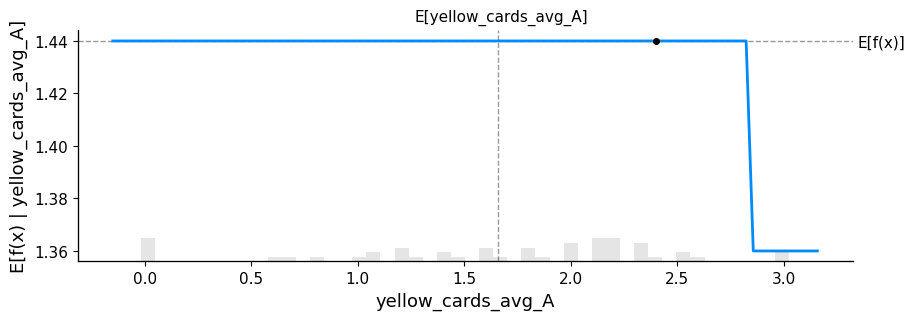

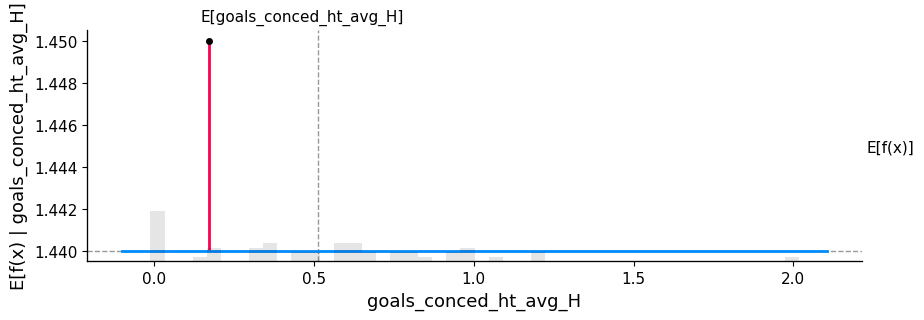

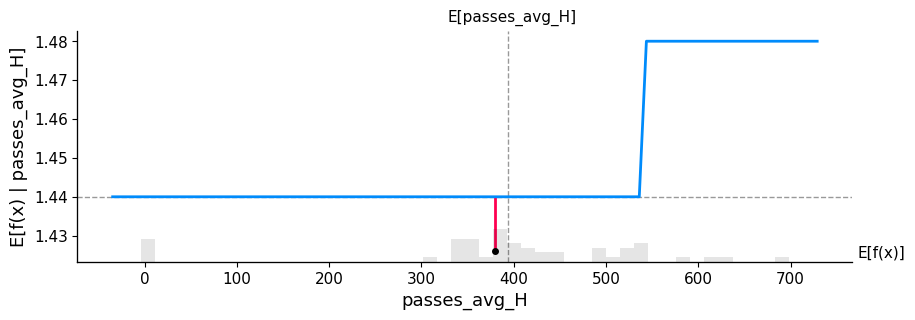

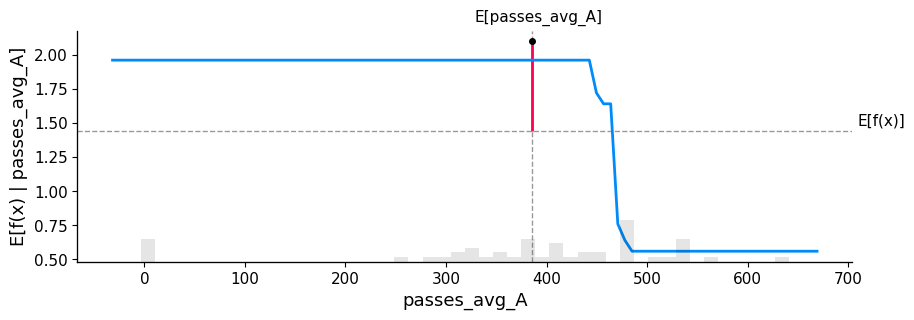

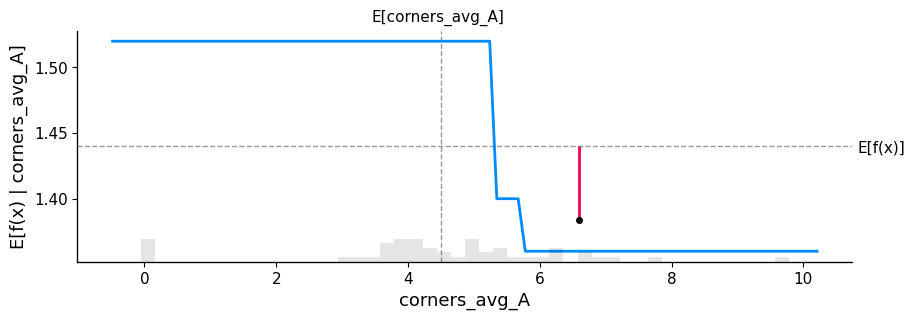

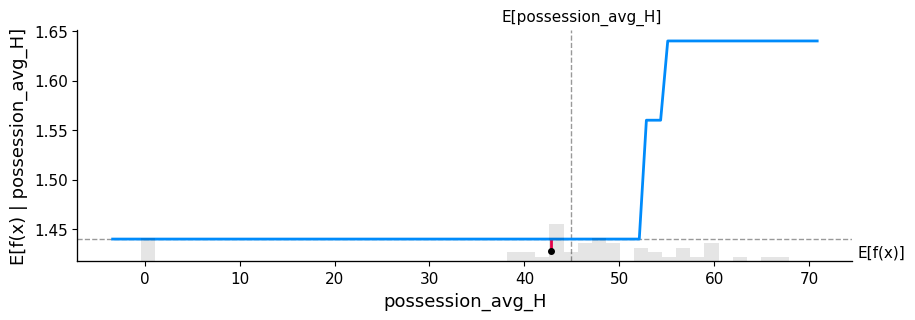

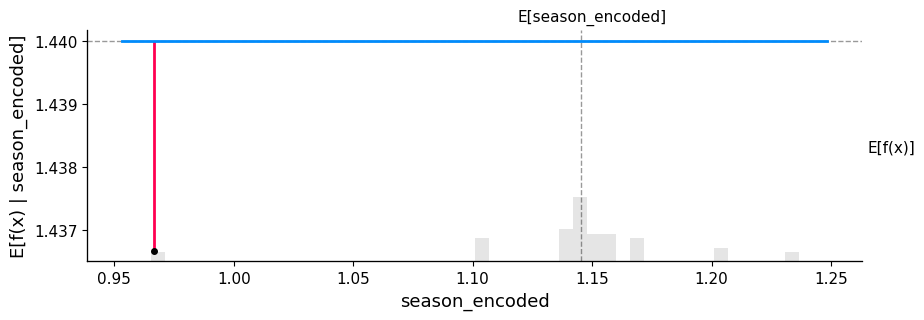

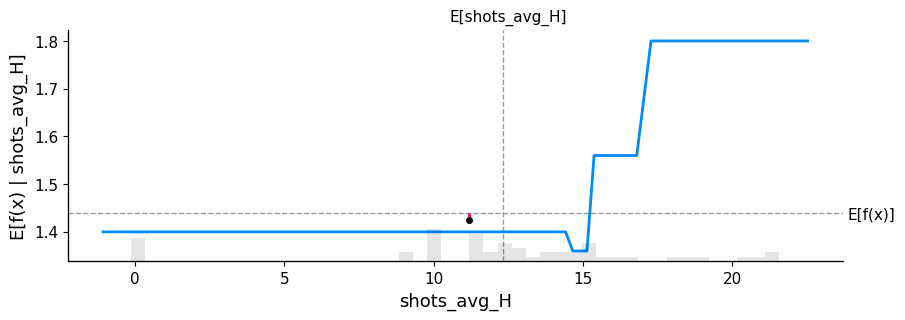

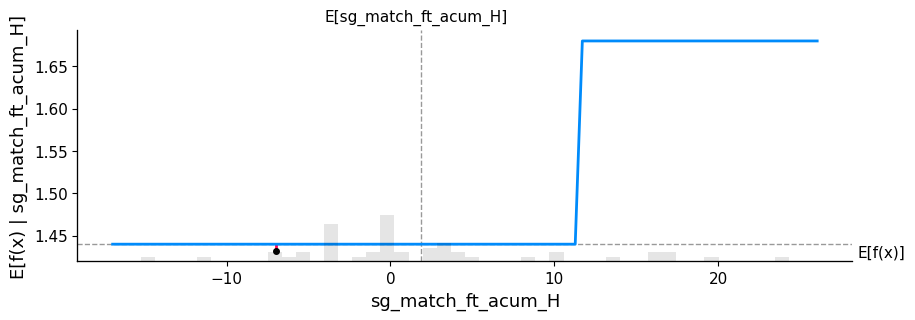

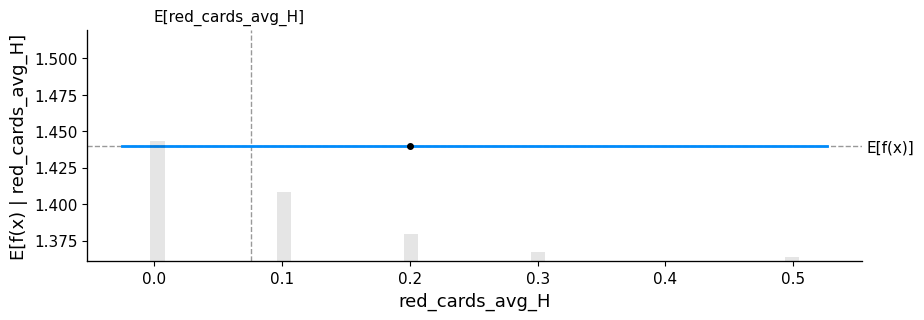

<Figure size 1000x300 with 0 Axes>

In [207]:
# SHAP explanation of a best model (Random Forest)
tree_explainer = shap.Explainer(rf_model.predict, x_train_shap_sample)
tree_shap_values = tree_explainer(x_train_shap_sample)

# fig, axs = plt.subplots(ncols=7, figsize=(20, 10), dpi=100)

for n, i in enumerate(x_train.columns):
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        rf_model.predict,
        x_train_shap_sample,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
        # ax=axs[n]
    )

# Adjust the spacing between the plots and save the figure
plt.tight_layout()
#plt.savefig('partial_dependence_plots.png', dpi=300)


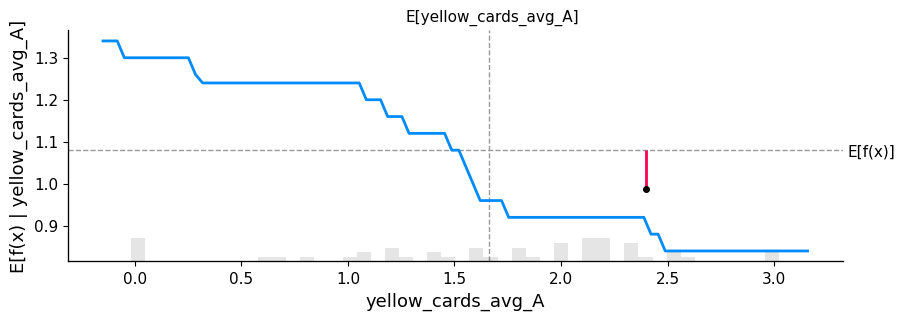

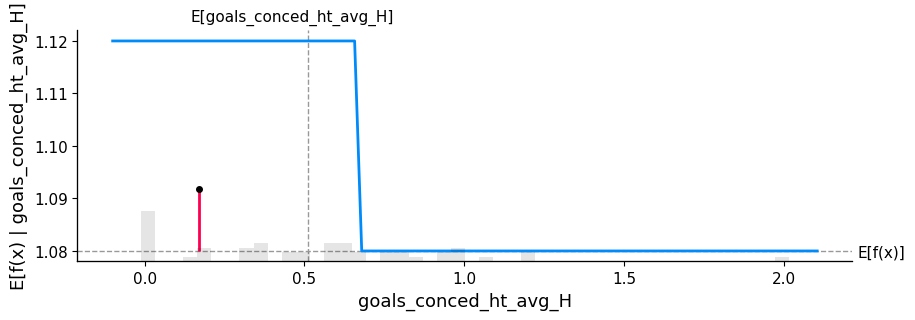

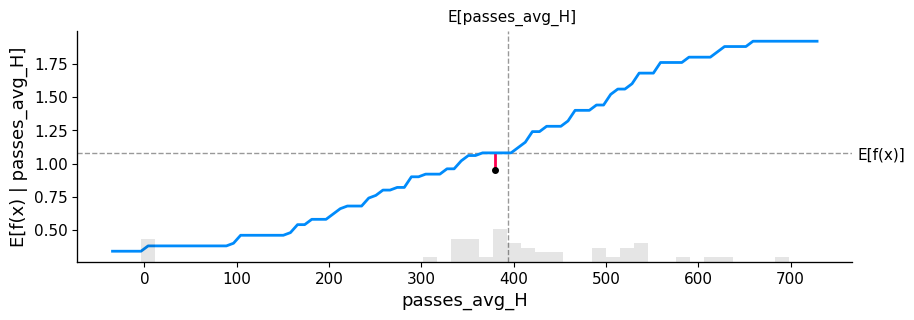

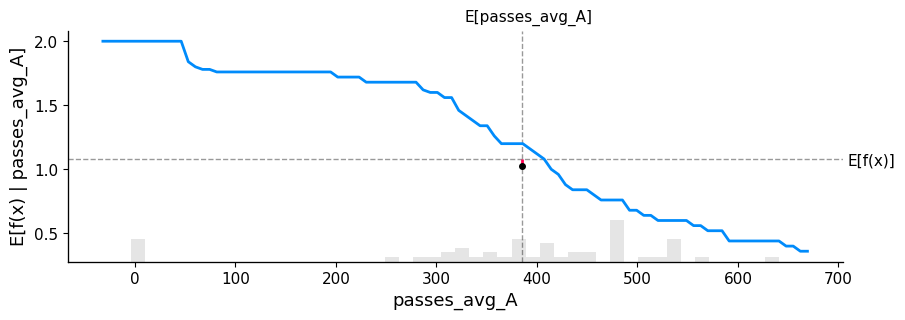

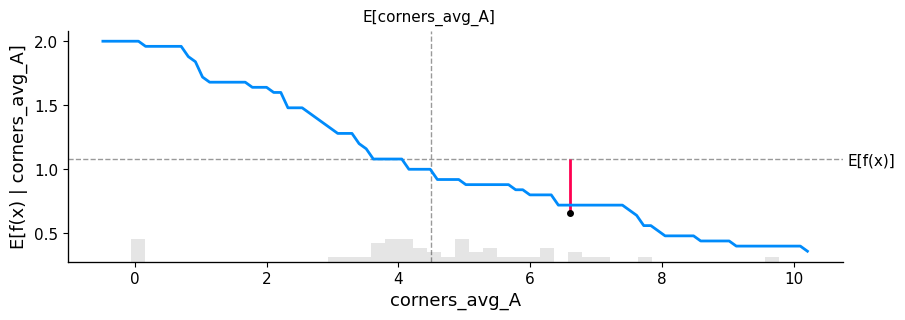

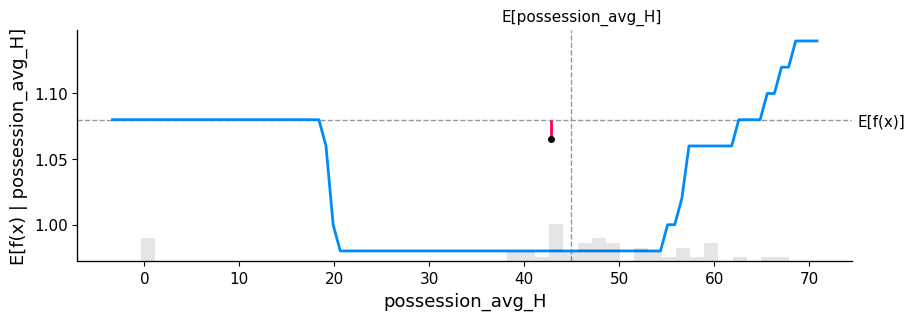

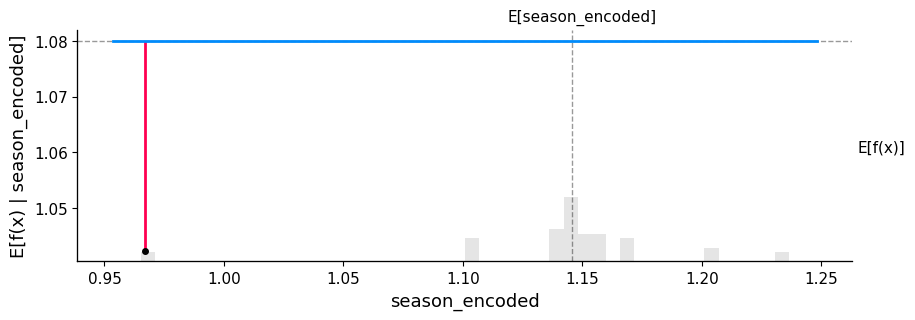

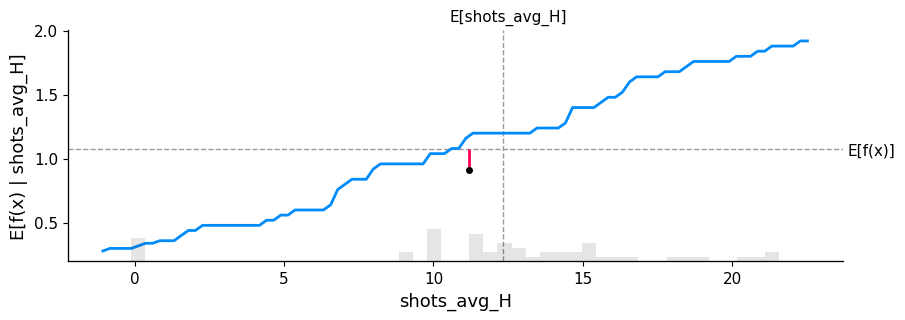

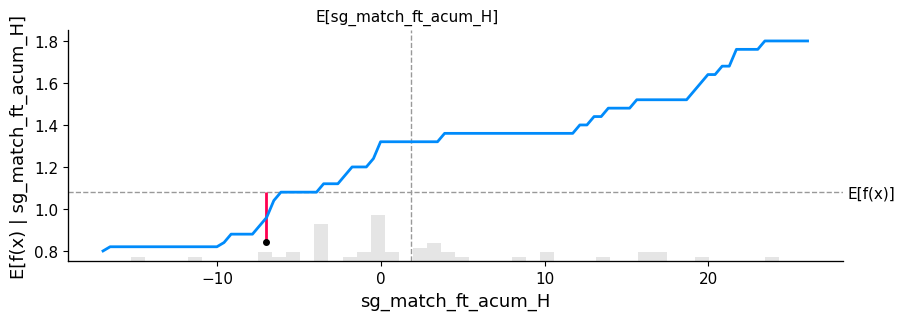

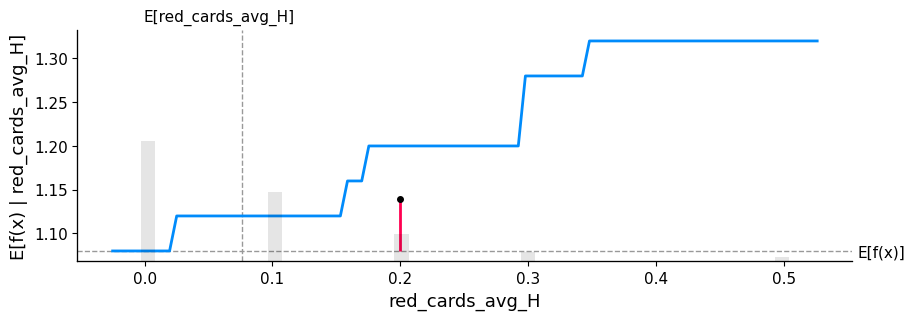

In [208]:
# SHAP explanation of a second best model (Logistic Regression)
linear_explainer = shap.Explainer(lr_model.predict, x_train_shap_sample)
linear_shap_values = linear_explainer(x_train_shap_sample)

for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        lr_model.predict,
        x_train_shap_sample,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind:sample_ind+1, :]
    )

### Interpreting SHAP Feature Importance Plot
Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

The following plots are

SHAP feature importance for a linear model
SHAP feature importance for tree-based model
As we can see below in the plots, there is a difference in feature importance for both the models

For the linear model, passes_avg_H is the second most important feature but for our tree-based model corners_avg_A is the second most important feature when we consider the average of SHAP values to calculate feature importance.

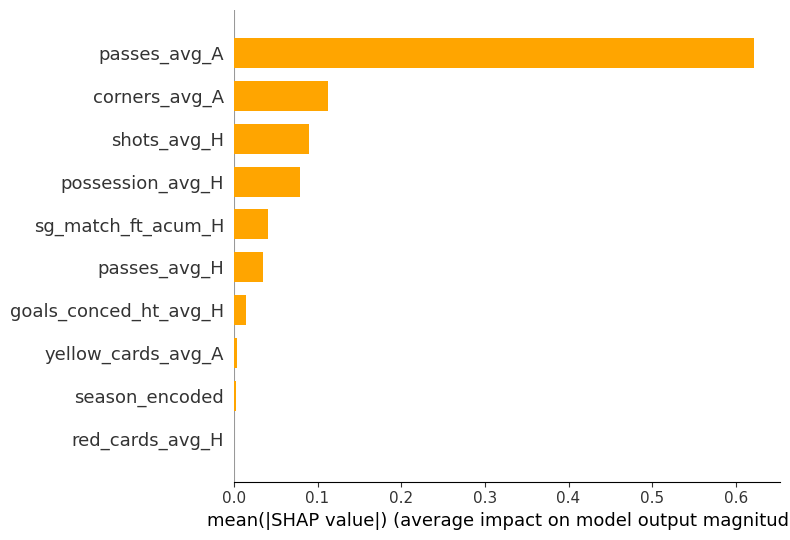

In [209]:
# SHAP variable importance for best model (Random Forest)
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="orange")

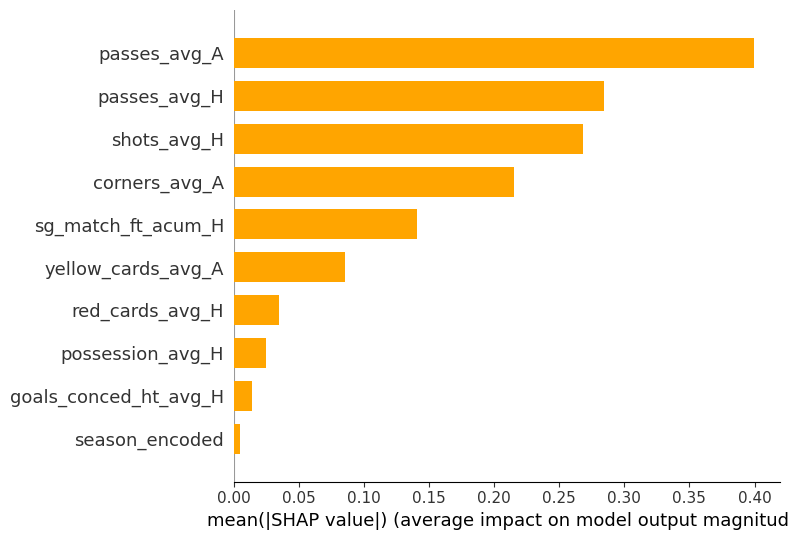

In [210]:
# SHAP variable importance for second best model (Logistic Regression)
shap.summary_plot(linear_shap_values, x_train, plot_type="bar", color="orange")

### Interpreting Waterfall SHAP visualization
The SHAP waterfall plot is a type of SHAP plot that helps to understand how individual features contribute to the final prediction of a machine learning model. 
- It displays a horizontal bar for each feature, where the height of the bar represents the impact of that feature on the prediction, and the bars are stacked in order of their contribution. 
- The plot starts at the model's expected value, and each bar shows how the feature contributes to moving the prediction up or down from that value. The plot also shows the direction of the impact of each feature, whether it is positive or negative. 
- The SHAP waterfall plot is useful for interpreting the behavior of complex models, as it allows for a granular understanding of how each feature contributes to the final outcome.


For the same sample:
The value of avg_passes_H in the waterfall model is the same as what we have in SHAP partial dependence plot. It says that f(x) = 1.14 is what we got as a model output and the expected output for this sample was 1.25. We came pretty close to determining it as the difference is only 0.11. The waterfall model explains how we got the expected output, and which features contributed to what. 

The below graph shows that corners_avg_A has the biggest and most negative impact in varying the result of a match by -0.3.



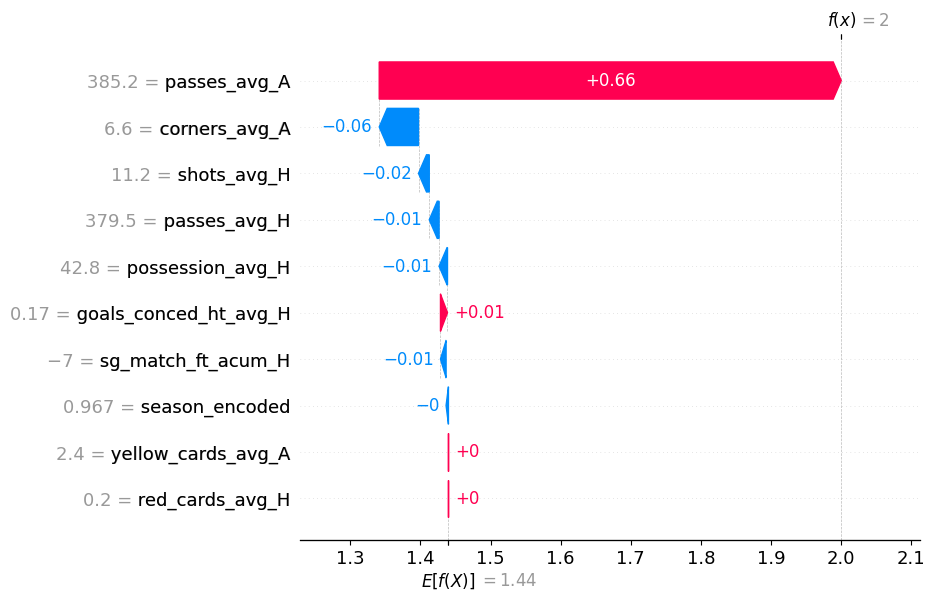

In [211]:
# Waterfall plot for best model (Random Forest)
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

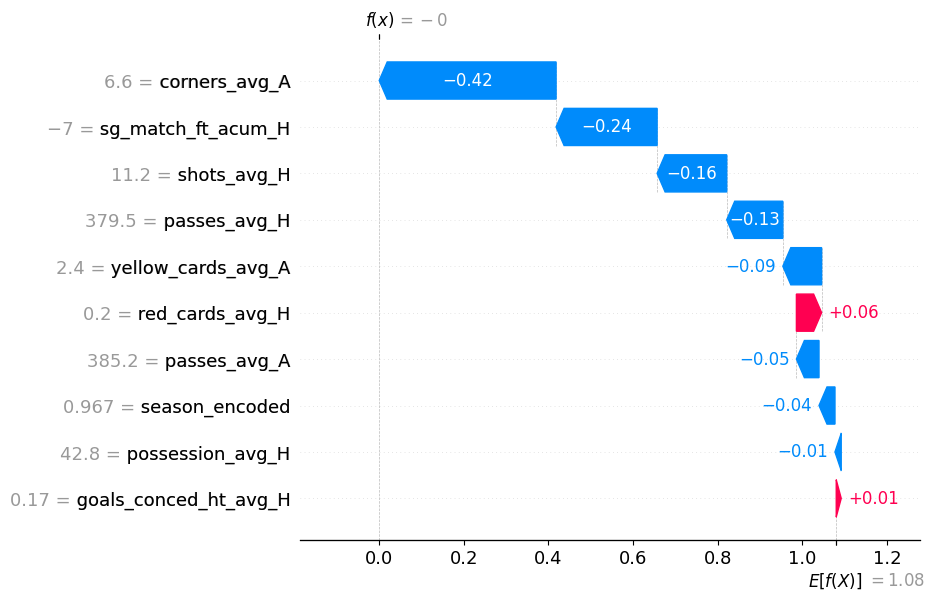

In [212]:

# Waterfall plot for second best model (Logistic Regressor)
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

### Interpret the summary plot
The significance of features can be easily identified from shap_summary plot as they are in descending order

Each dot(both red and blue) represents a feature of a match
Red color represents high values whereas blue color represents low value
If a dot(a feature of match) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
The position of a dot on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.
Let us try to understand how both models are performing side by side

Higher value of shots_avg_H tends to have a positive impact on the winning chances of Home team.

Lower values of corners_avg_A tend to have a positive impact on the winning chances of Home team.

Similary impact of every features on result of a match can be easily interpreted.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


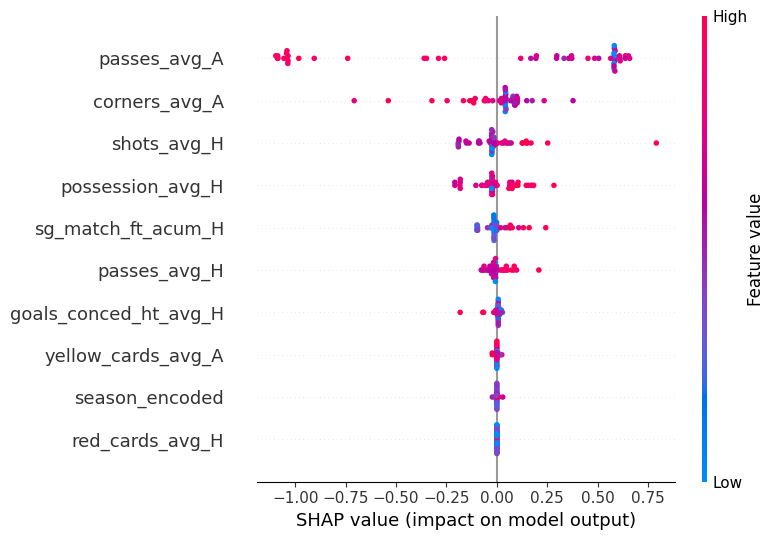

In [213]:
# SHAP summary for best model (Random Forest)
shap.summary_plot(tree_shap_values, x_train_shap_sample)

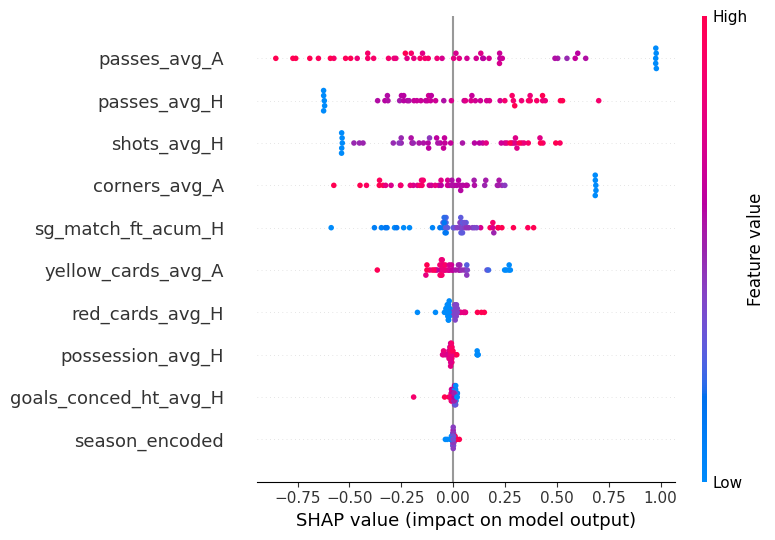

In [214]:
# SHAP summary for second best model (Logistic Regression)
shap.summary_plot(linear_shap_values, x_train_shap_sample)

###Interpreting SHAP dependence plot
The SHAP dependence plot displays how one or two features impact the predicted outcome of a machine learning model. It indicates if the connection between the target and a feature is linear, monotonic, or more intricate. The SHAP dependence plot is useful for interpreting linear and tree-based models. The graphs in the plot show a dot for each wine in the dataset.

* By analyzing the SHAP values of the linear model feature, we can see that it 
has a linear relationship with the predicted outcome. When a feature has a positive impact on the result of a match, such as shots_avg_H and passes_avg_H, the relationship is directly proportional. On the other hand, when a feature affects the result of a match negatively, such as corners_avg_A and passes_avg_A, the relationship is inversely proportional.

* In the case of the tree-based model, we notice that the relationship between a feature and its SHAP value is not linear anymore. The SHAP dependence plot doesn't exactly match the partial dependence plot as it accounts for the interaction effects, whereas the PDP doesn't consider the high order interactions that the model may be doing. Therefore, the SHAP dependence plot is more comprehensive and takes these interactions into account.



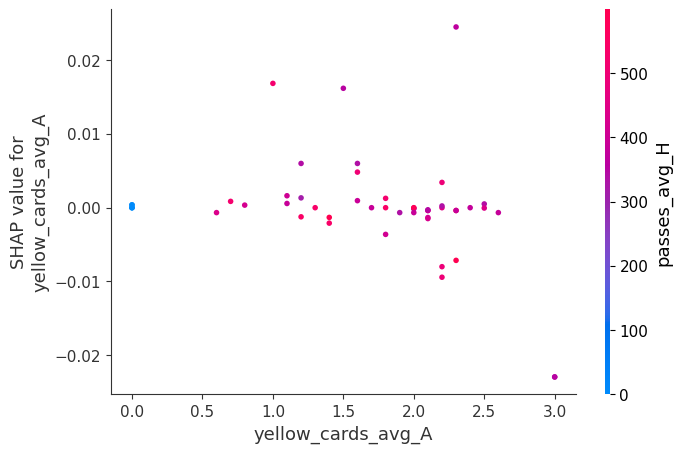

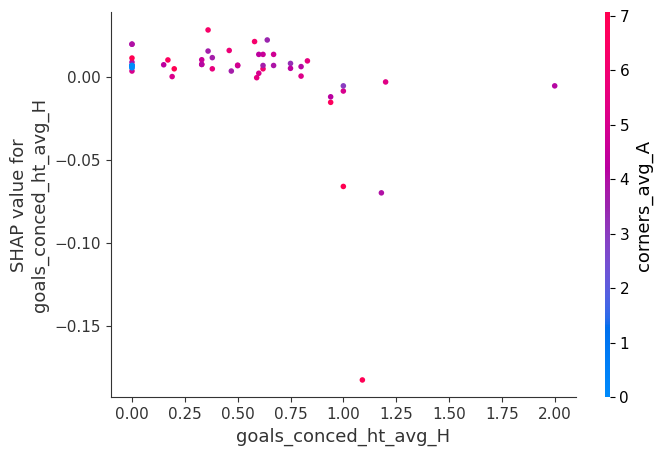

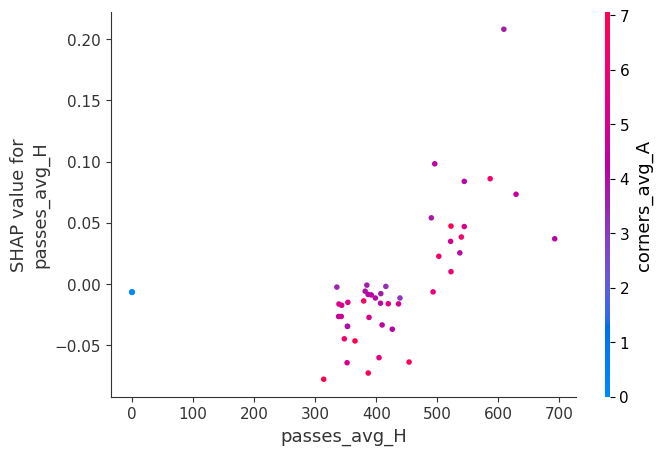

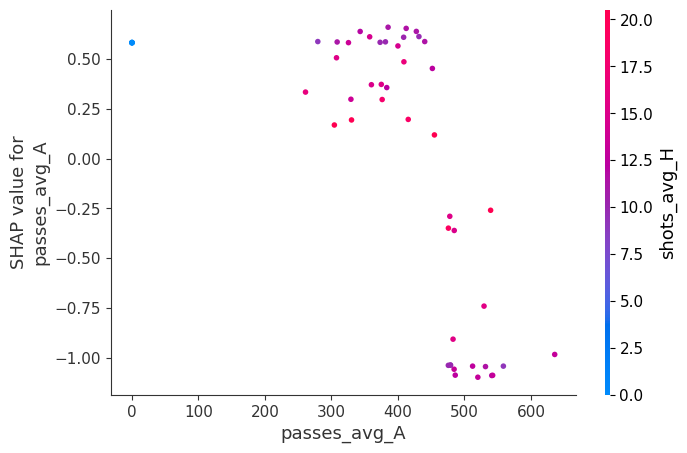

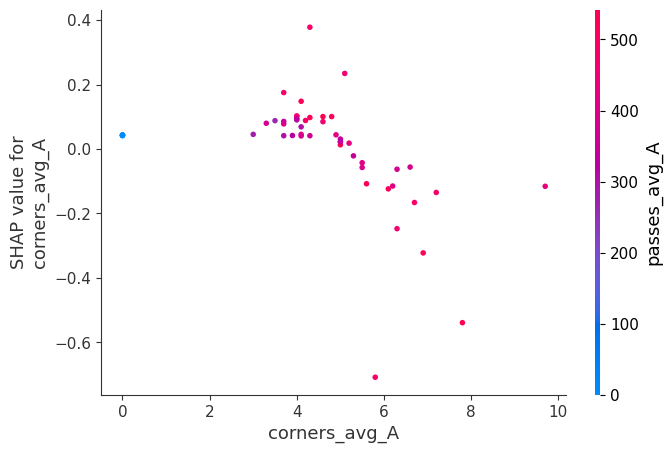

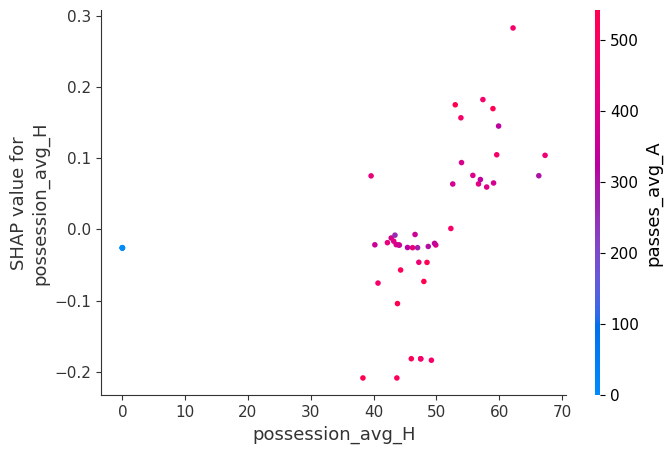

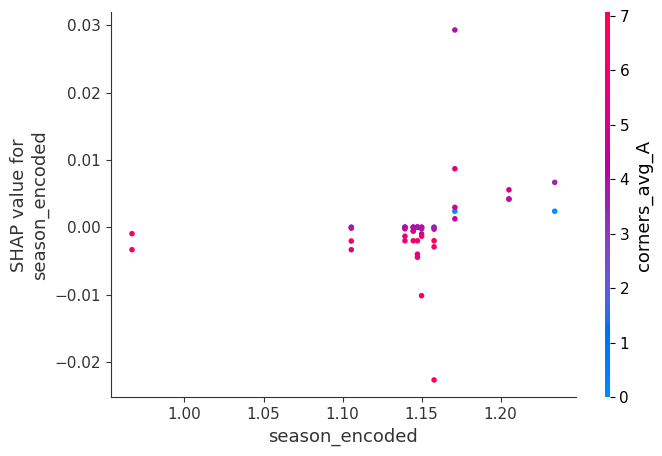

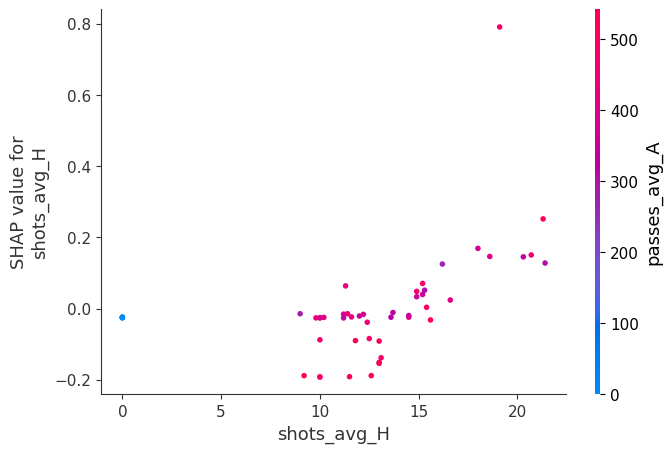

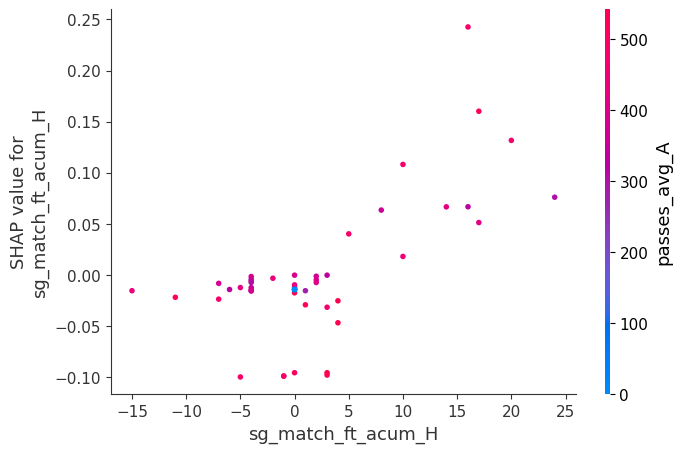

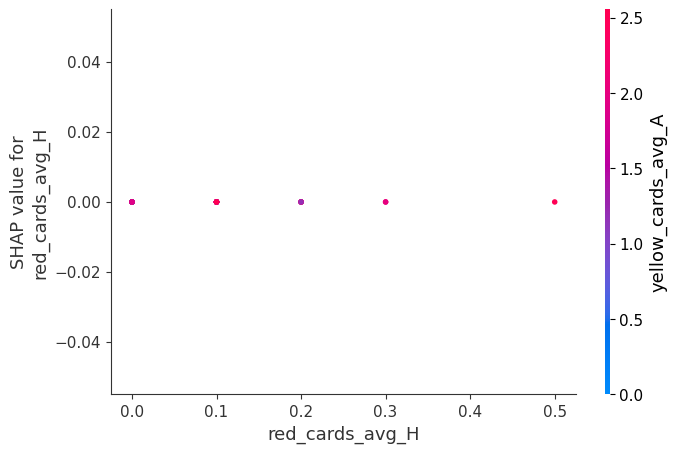

In [215]:
# SHAP partial dependence plot for best model (Random Forest)
for i in x_train_shap_sample.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train_shap_sample)

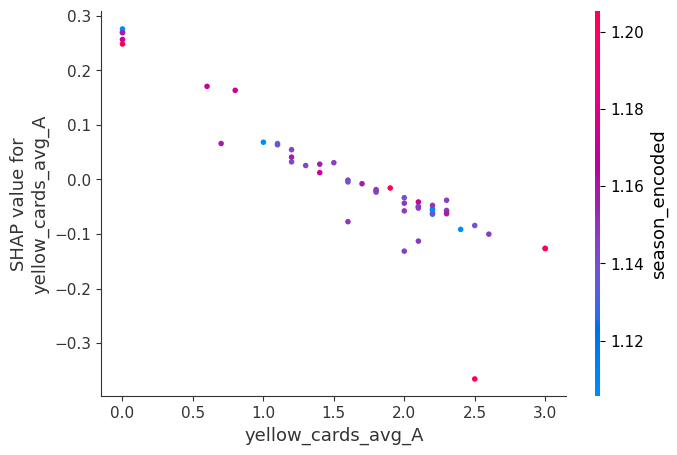

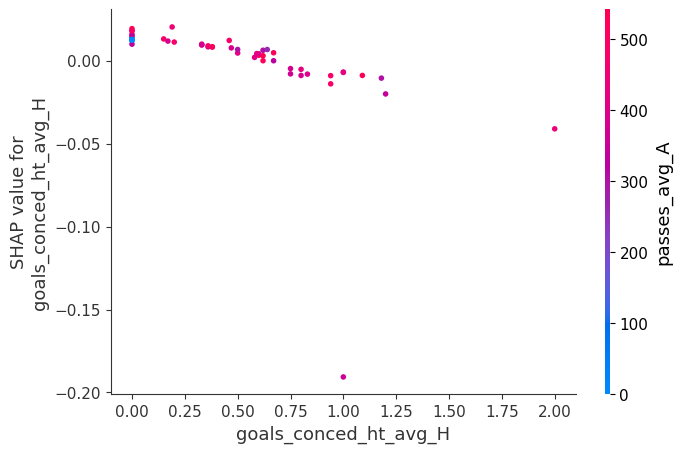

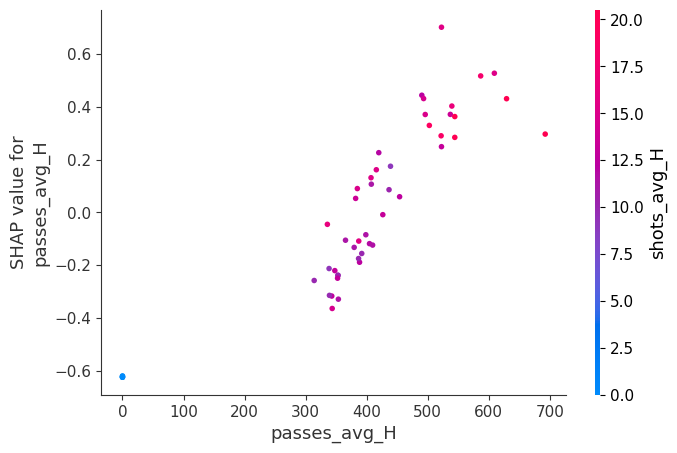

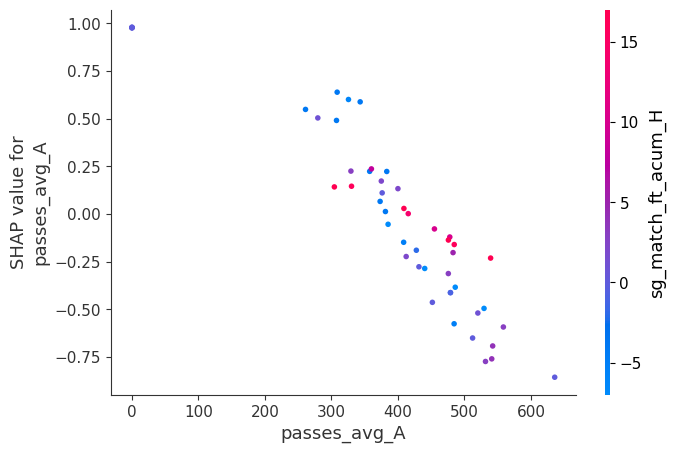

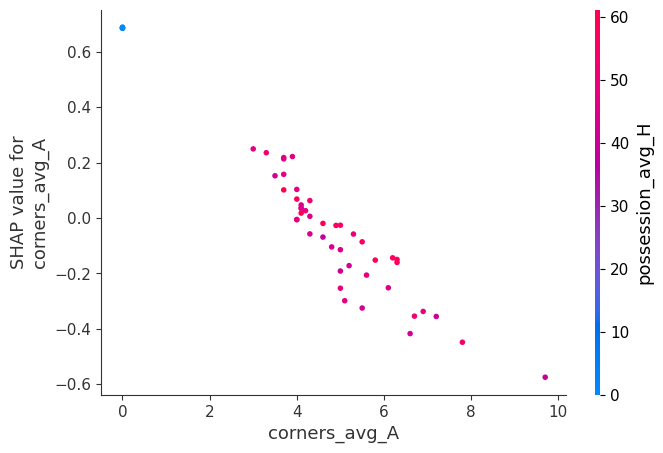

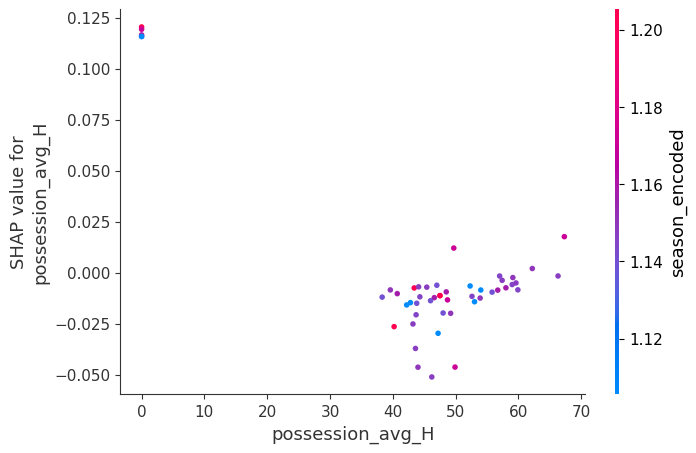

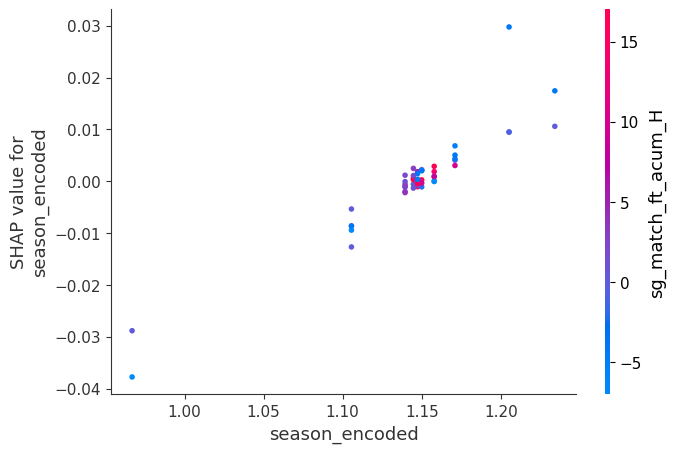

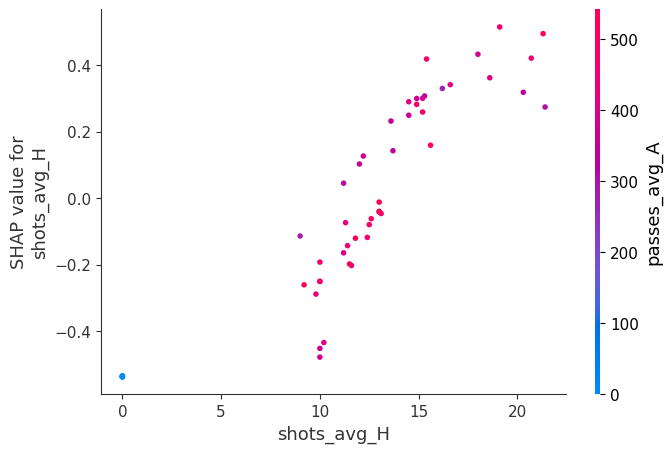

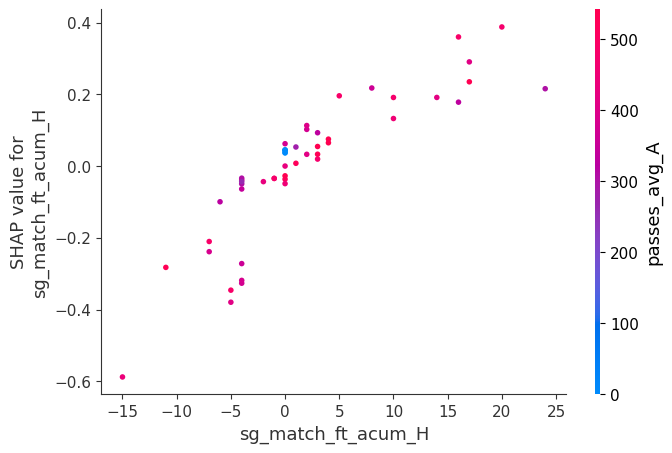

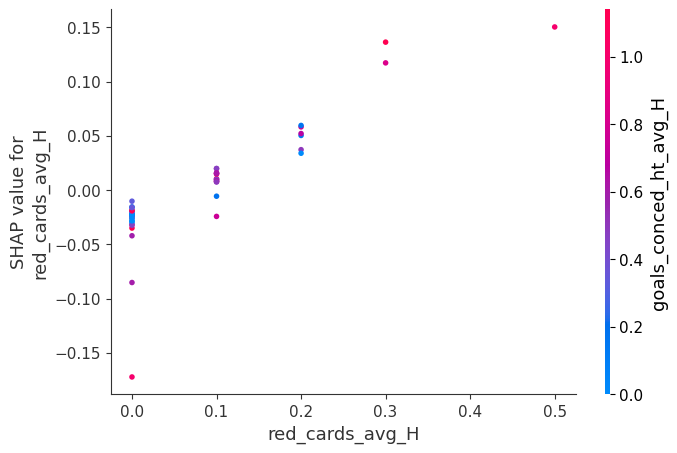

In [216]:
# SHAP partial dependence plot for second best model (Logistic Regression)
for i in x_train_shap_sample.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train_shap_sample)

### Force Plot SHAP analysis
This chart is similar to the previous waterfall model, but it is more compact. Both visualizations have their own advantages, and it's subjective which one people prefer to use for reading.



In [217]:
# Get the predictions and put them with the test data.
X_output_tree = x_test.copy()
X_output_tree.loc[:,'Winner'] = np.round(rf_model.predict(X_output_tree),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
T = X_output_tree.iloc[random_picks]



In [218]:
# Get the predictions and put them with the test data.
X_output_linear = x_test.copy()
X_output_linear.columns
# X_output_linear.loc[:,'Winner'] = np.round(lr_model.predict(X_output_linear),2)

# # Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
L = X_output_linear.iloc[random_picks]
# X_output_linear.head()


In [219]:

# Write in a function
def shap_plot_tree(j):
    explainerModel = shap.TreeExplainer(rf_model)
    shap_values_Model = explainerModel.shap_values(T)
    p = shap.force_plot( explainerModel.expected_value[j], shap_values_Model[j])
    return(p)

def shap_plot_linear(j):
    explainerModelLinear = shap.KernelExplainer(lr_model.predict, x_train, fature_names = imp_features)
    shap_values_Model = explainerModelLinear.shap_values(L)
    p = shap.force_plot( explainerModelLinear.expected_value[j], shap_values_Model[j])
    return(p)

# model, X_train, feature_names=vectorizer.get_feature_names()

In [220]:
# Plotting force plot for best model (Random Forest)
shap.initjs()
shap_plot_tree(0)

In [221]:
# Plotting force plot for second best model (Logistic Regression)
shap.initjs()
ex = shap.KernelExplainer(lr_model.predict, x_train)
shap_values = ex.shap_values(x_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, x_test.iloc[0,:])

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


###Heatmap Visualization

Heatmap represents a condensed overview of the complete dataset, showcasing the influence of each data point in every feature on the result of a match.

The y-axis represents the various features, while the x-axis denotes the instances of those features. Each instance is color-coded to indicate whether it has a positive or negative impact on the result - red represents a positive impact, while blue represents a negative one. Additionally, the intensity of the color reflects the magnitude of the effect, with darker colors indicating a more significant impact.

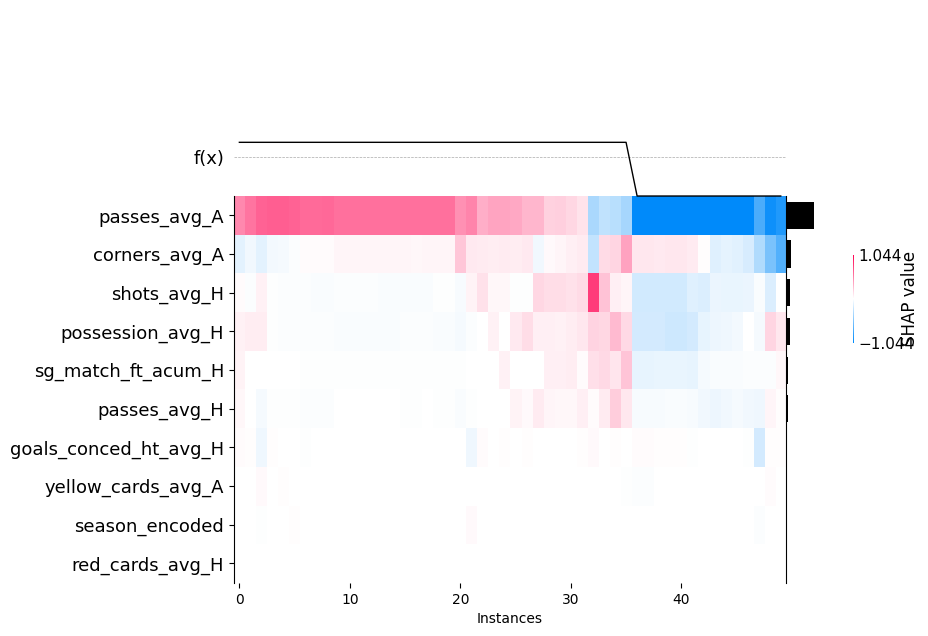

In [222]:
# Plotting heatmap for best model (Random Forest)
shap.plots.heatmap(tree_shap_values)  # SHAP HeatMap of a Tree Based Model

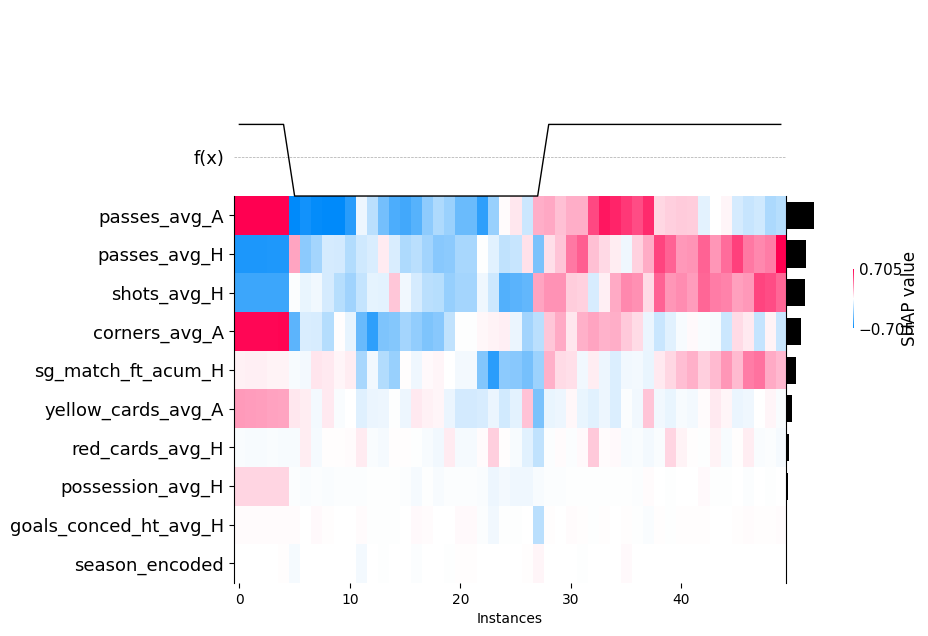

In [223]:
# Plotting heatmap for second best model (Logistic Regression)
shap.plots.heatmap(linear_shap_values)  # SHAP heatmap for a Linear Model

## PDP(Partial Dependence Plot) for Linear model and Tree-based Model

### **Random Forest Classifier** 
It is evident from the plot that on changing the value of significant features, output is not varying linearly

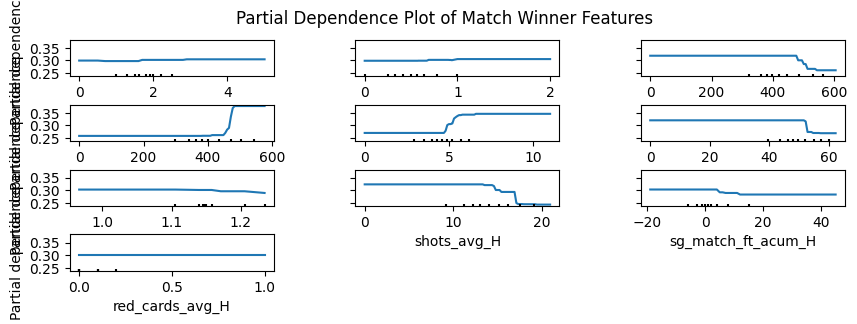

In [224]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(
    rf_model,
    x_test,
    features=list(x_test.columns),
    target = rf_model.classes_[0],
    n_jobs=3
)

fig = plt.gcf()
fig.suptitle("Partial Dependence Plot of Match Winner Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (30, 20)

### **Logistic Regressor** 
It is evident from the plot that on changing the value of significant features, output is varying linearly

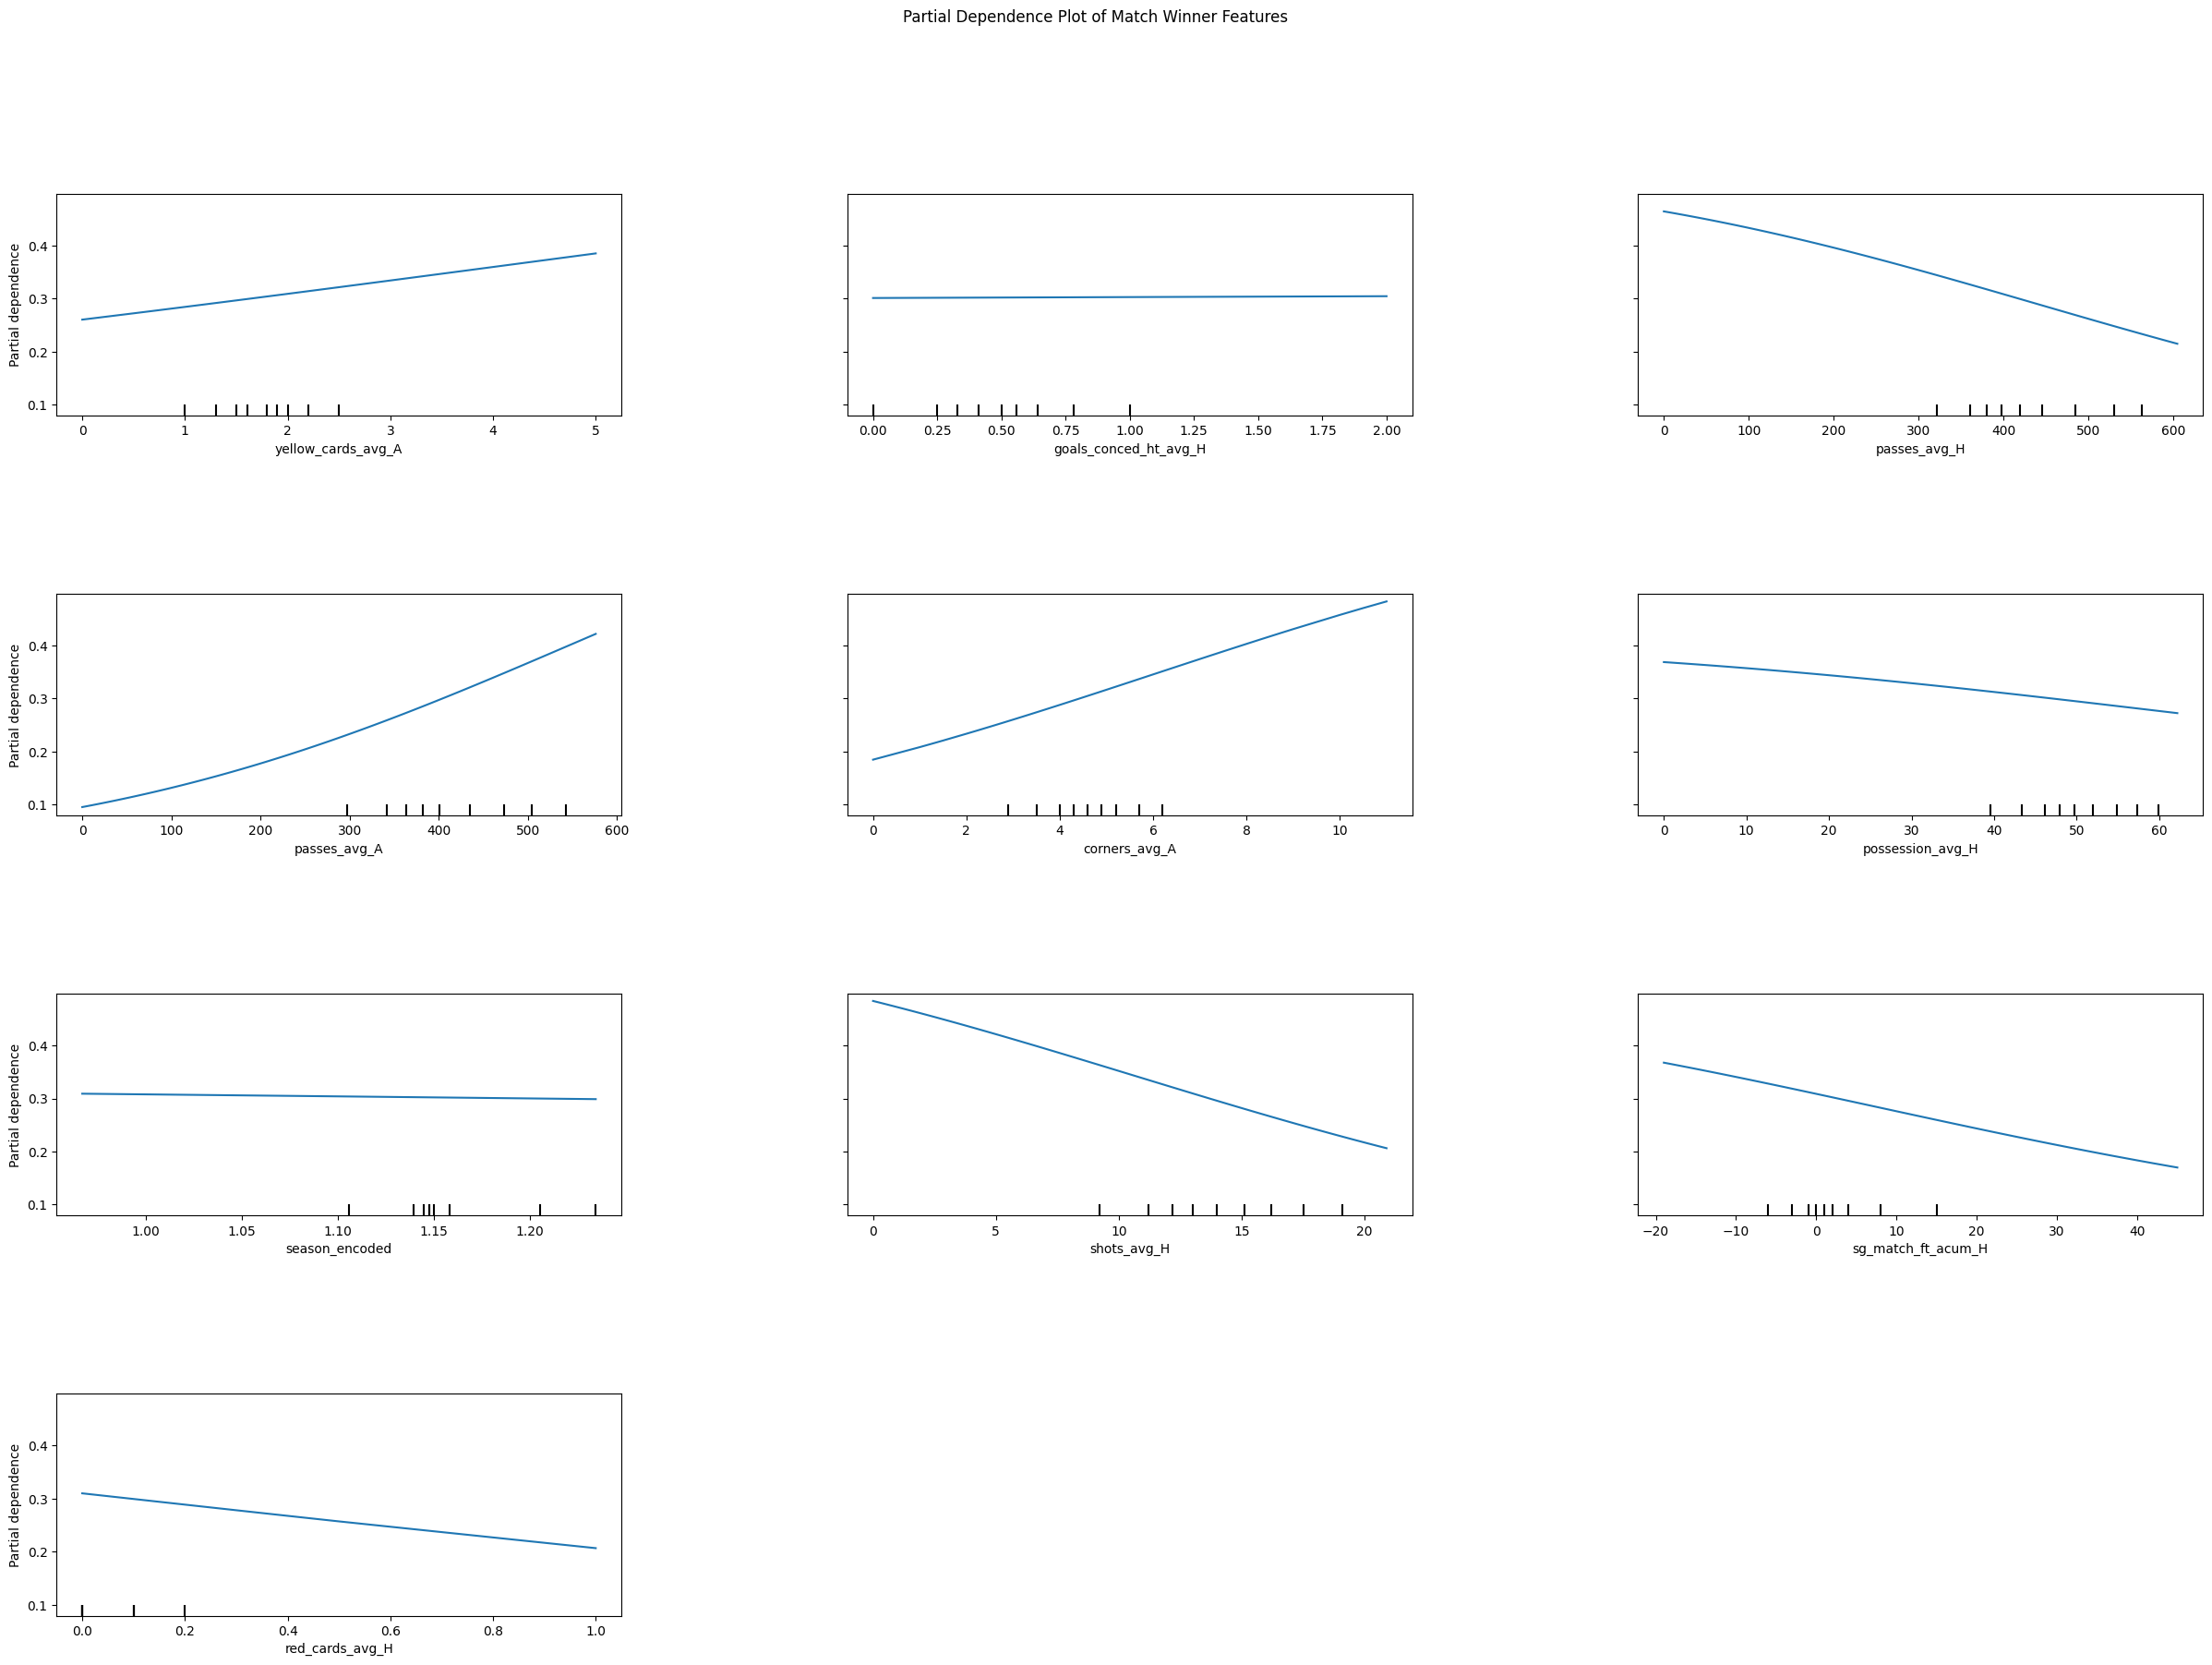

In [225]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(
    lr_model,
    x_test,
    features=list(x_test.columns),
    target = lr_model.classes_[0],
    n_jobs=3
)

fig = plt.gcf()
fig.suptitle("Partial Dependence Plot of Match Winner Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (30, 20)

## Interpreting AutoML Best Model

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

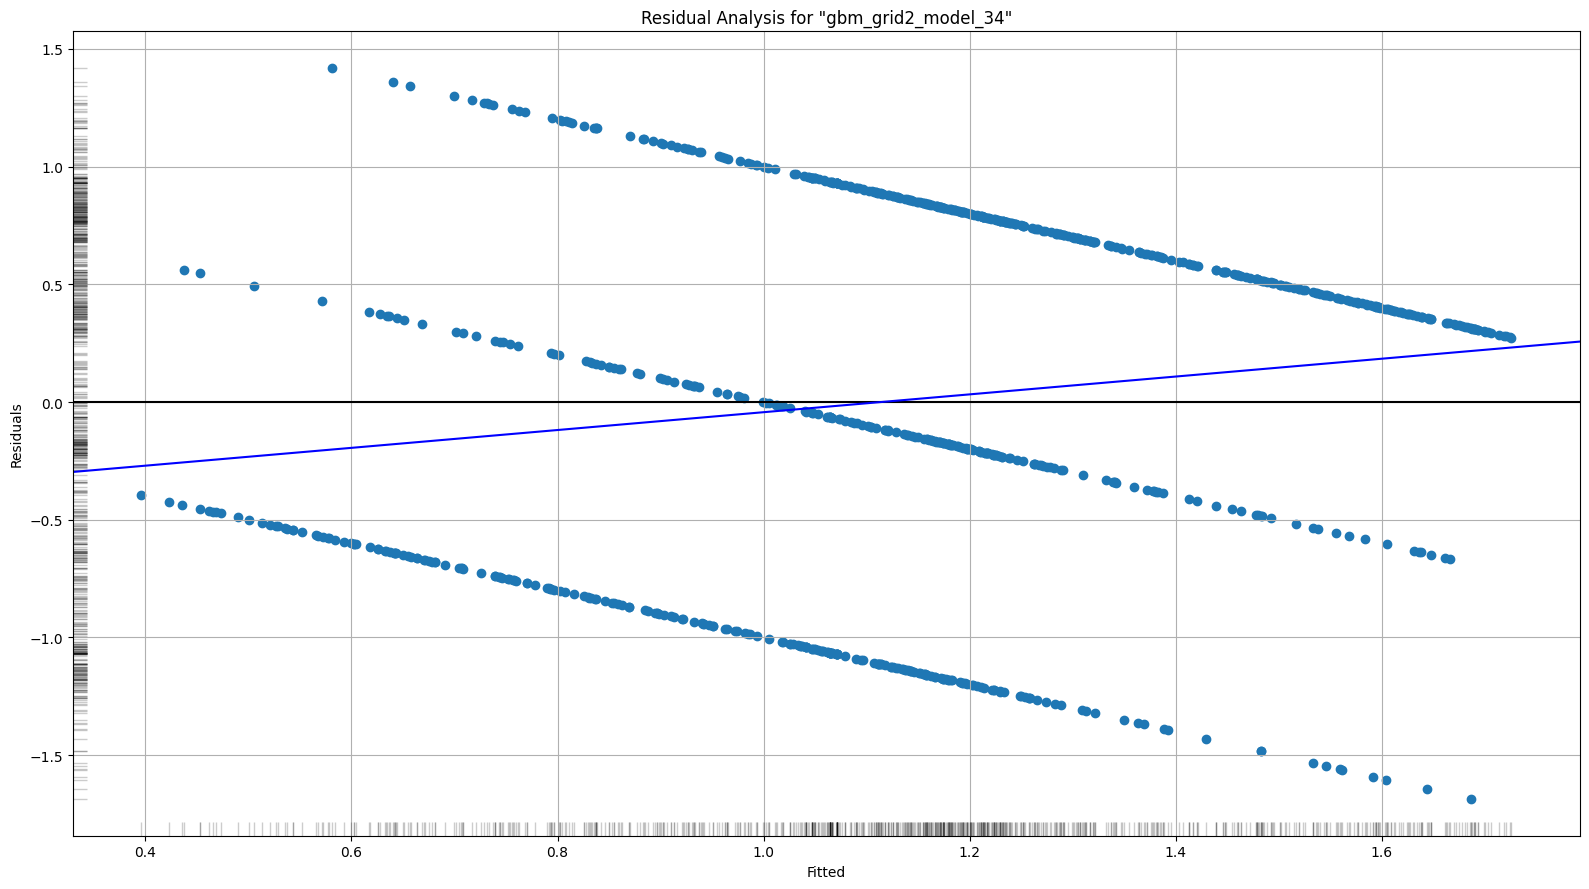

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

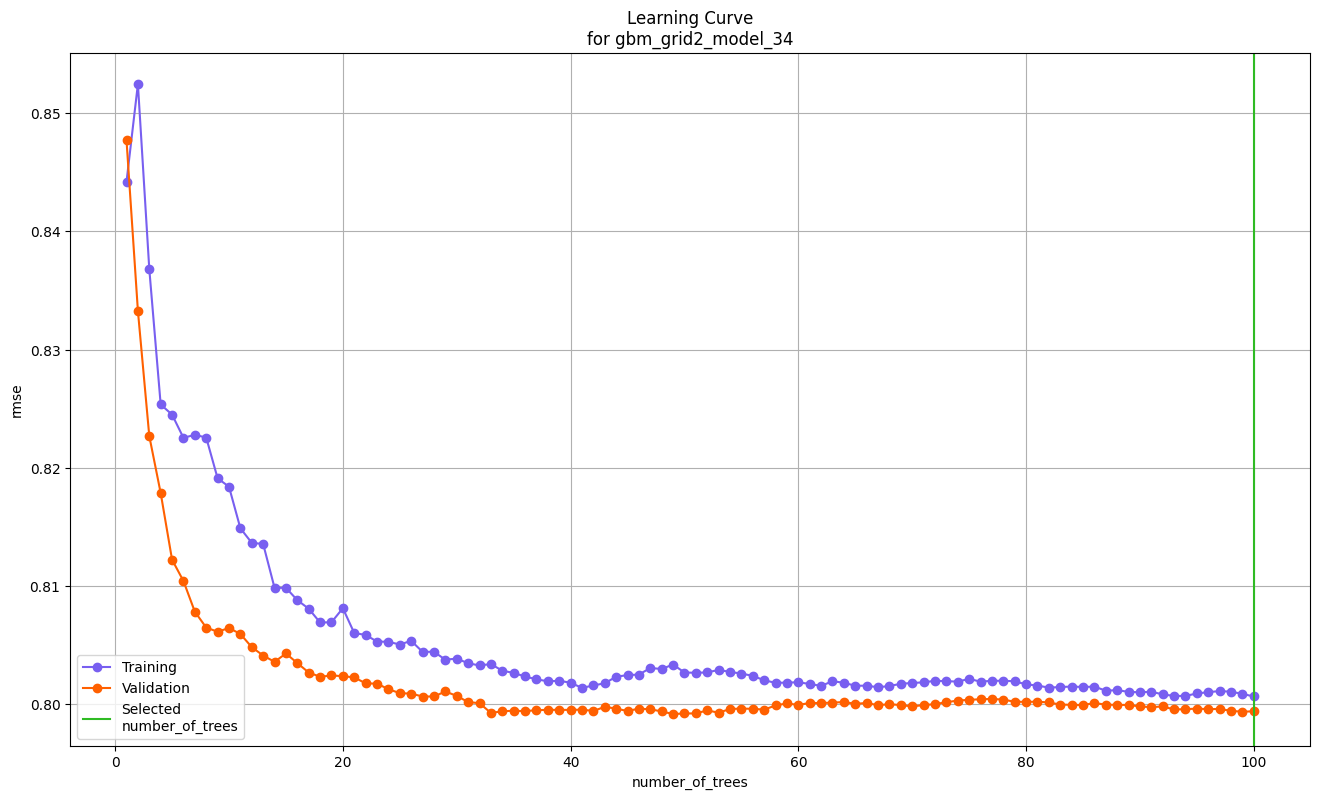

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

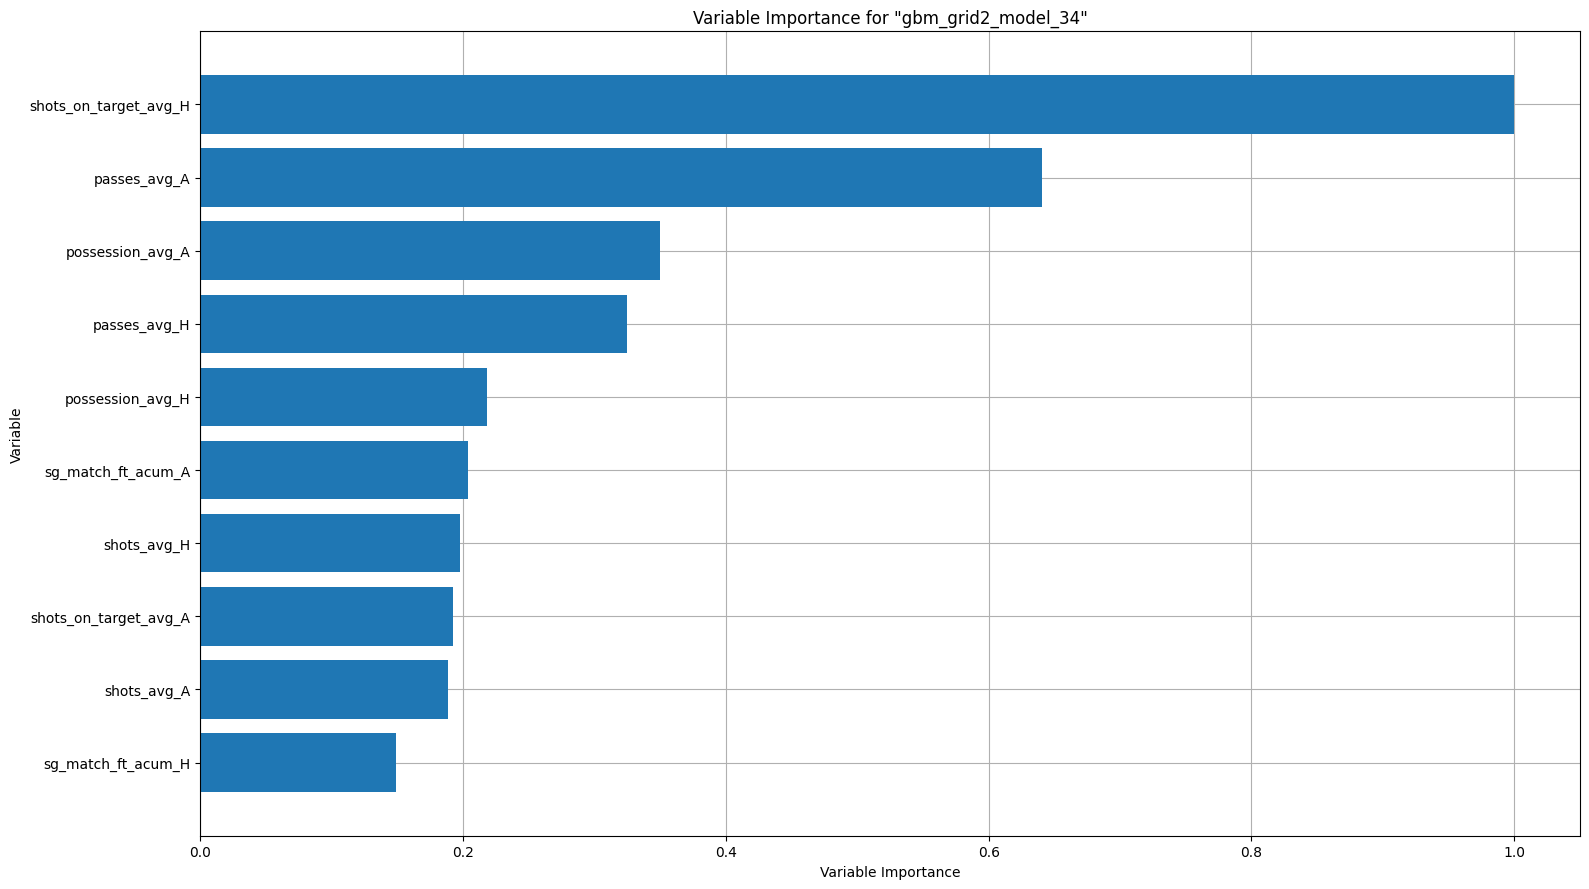

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

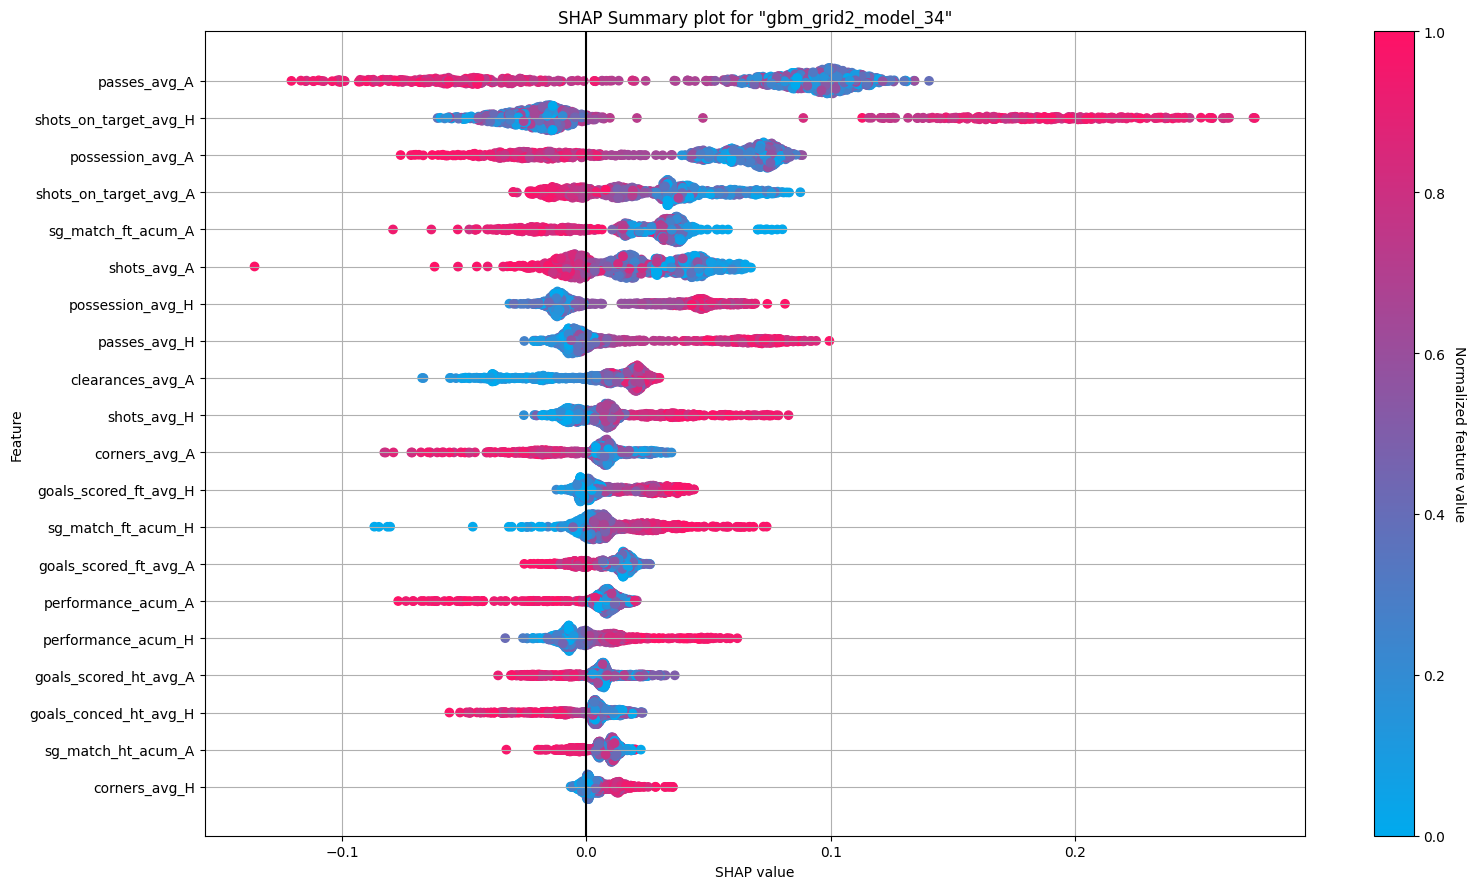

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

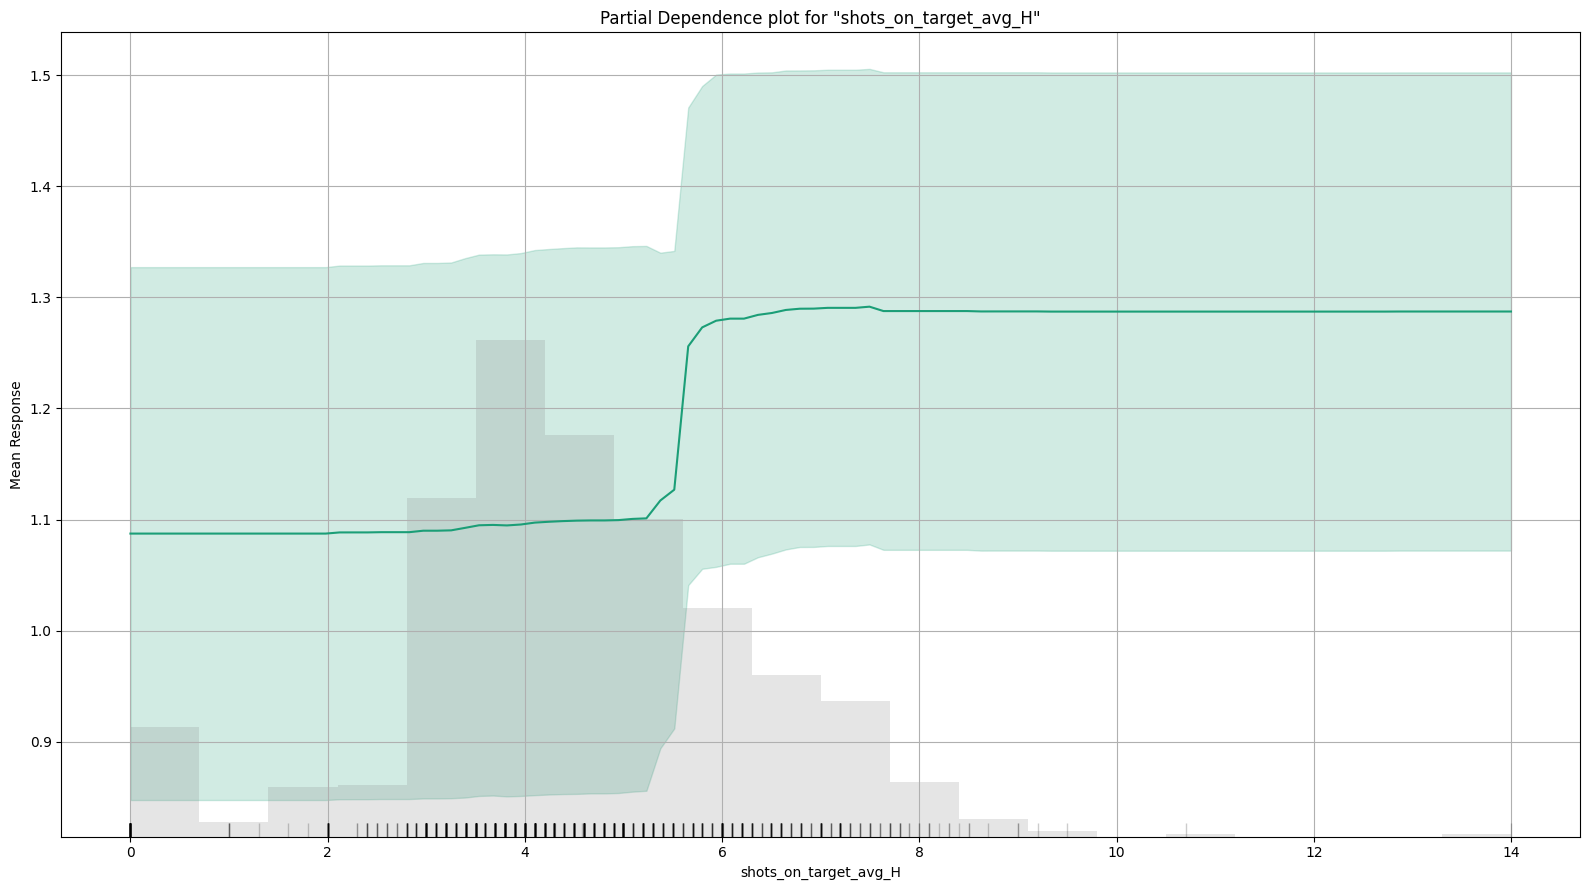

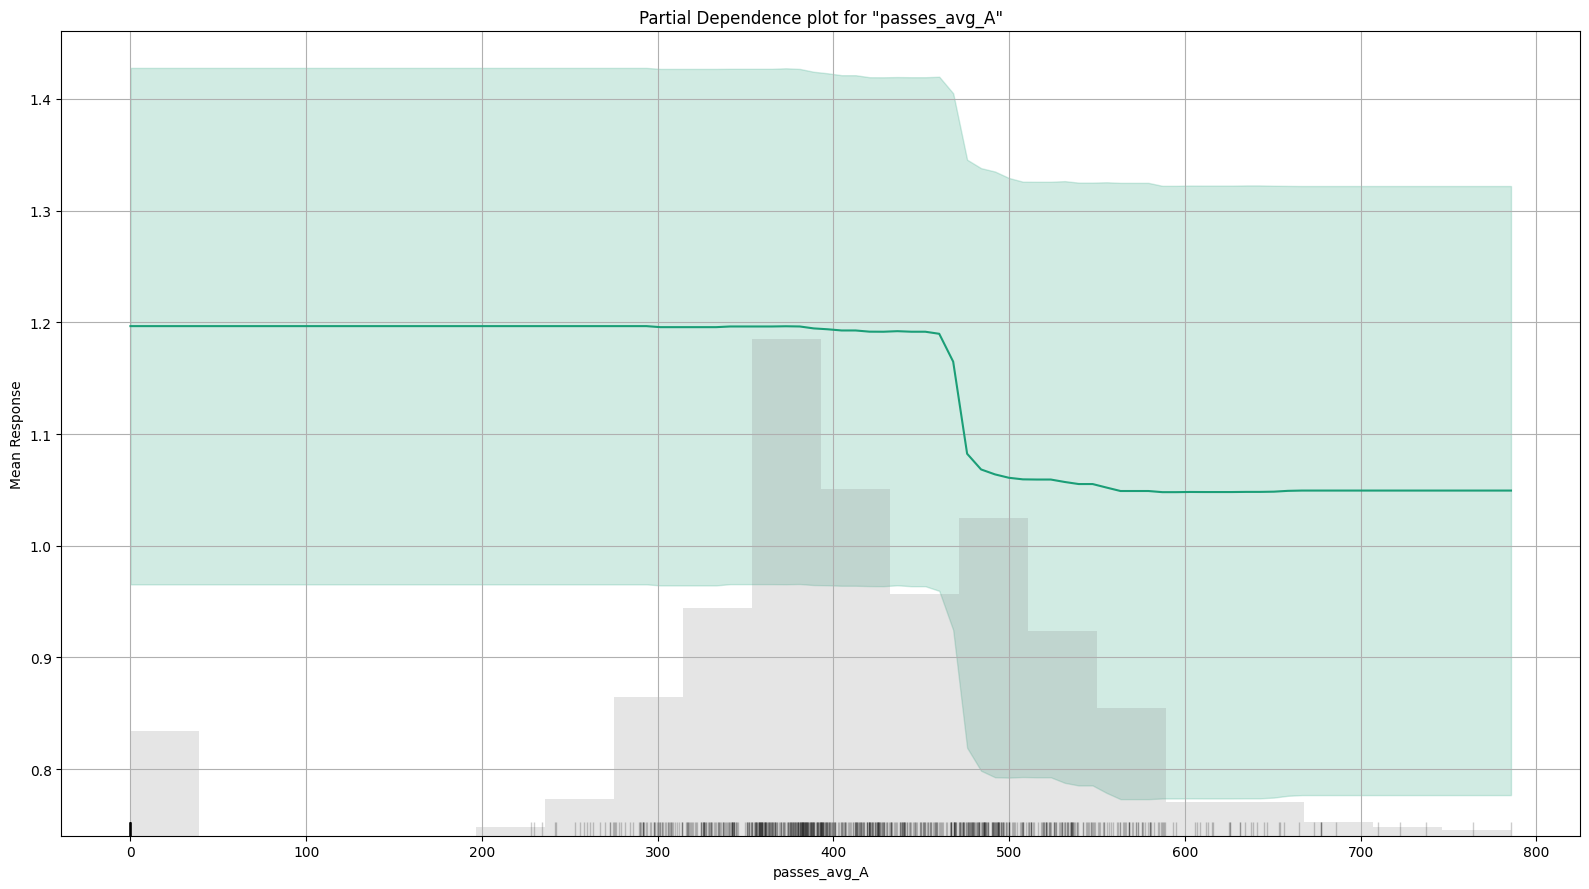

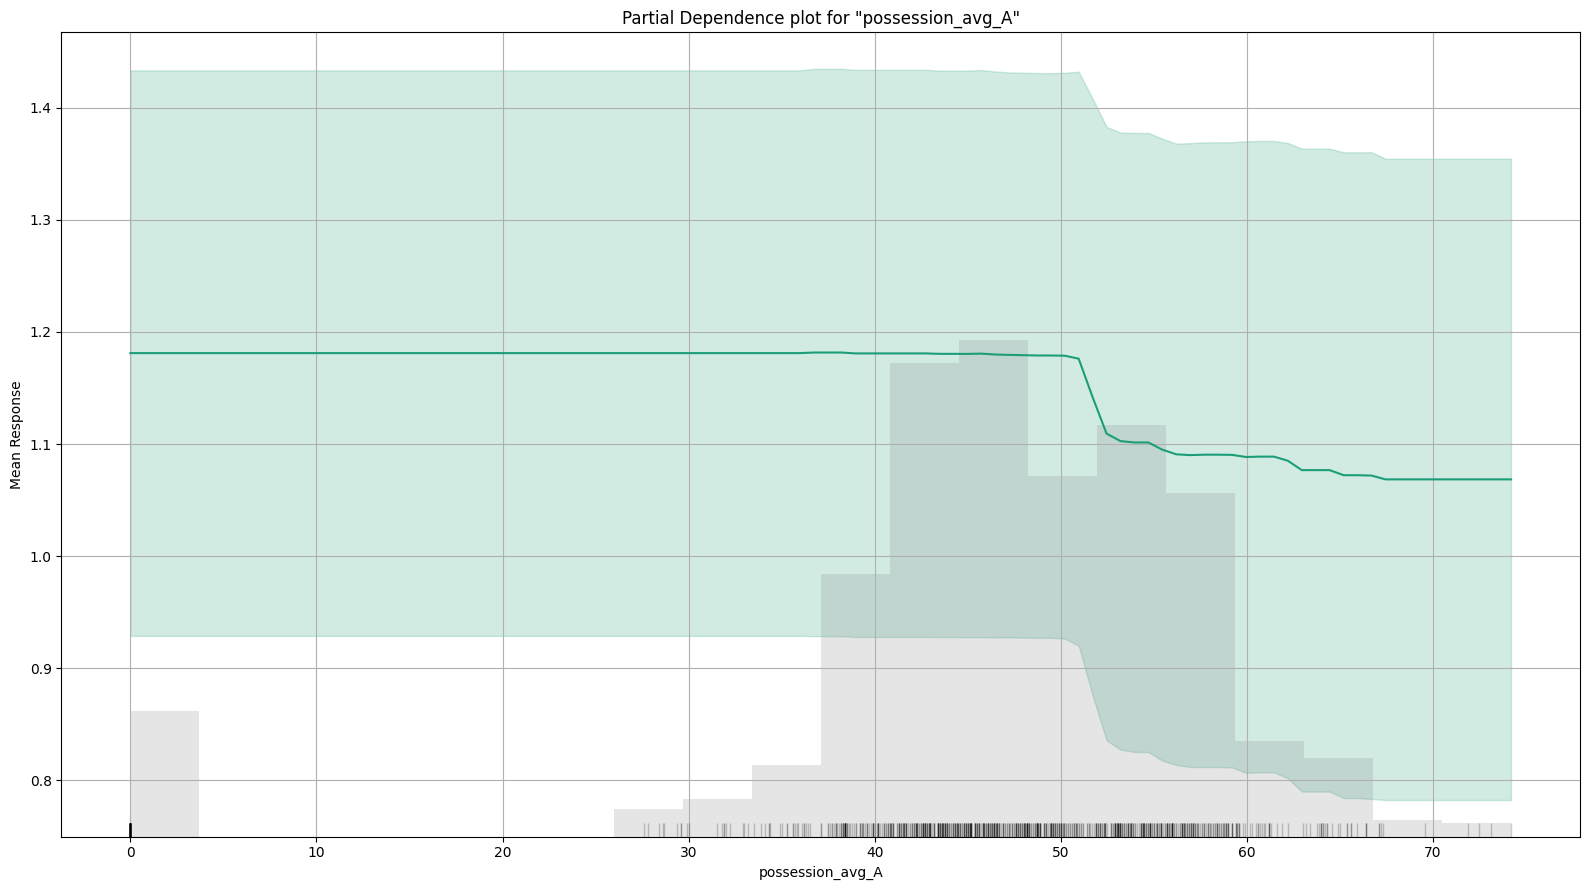

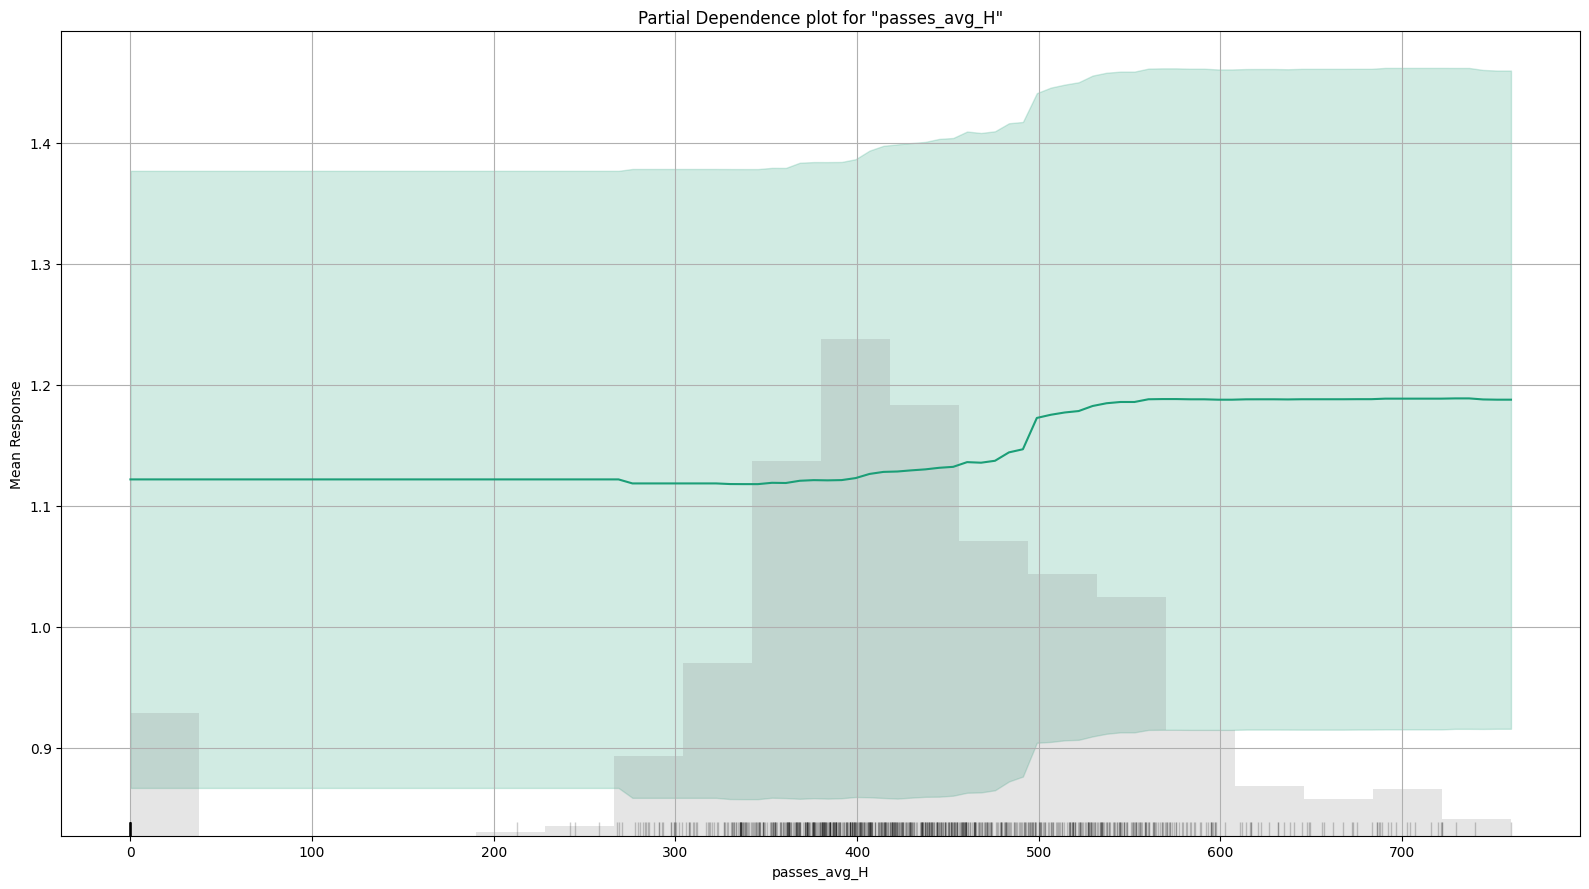

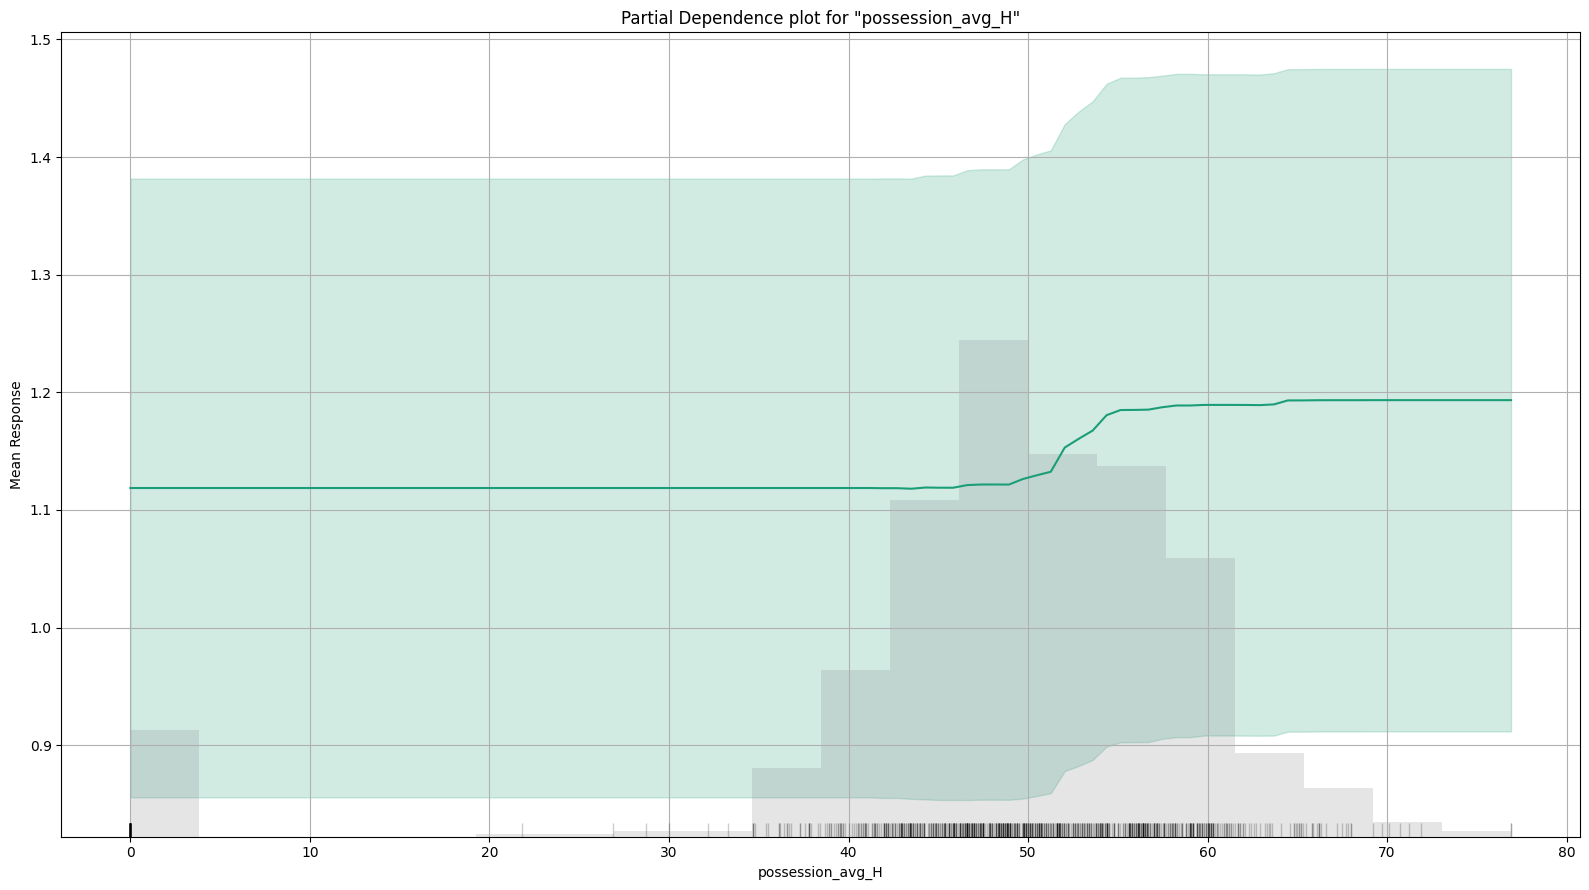

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

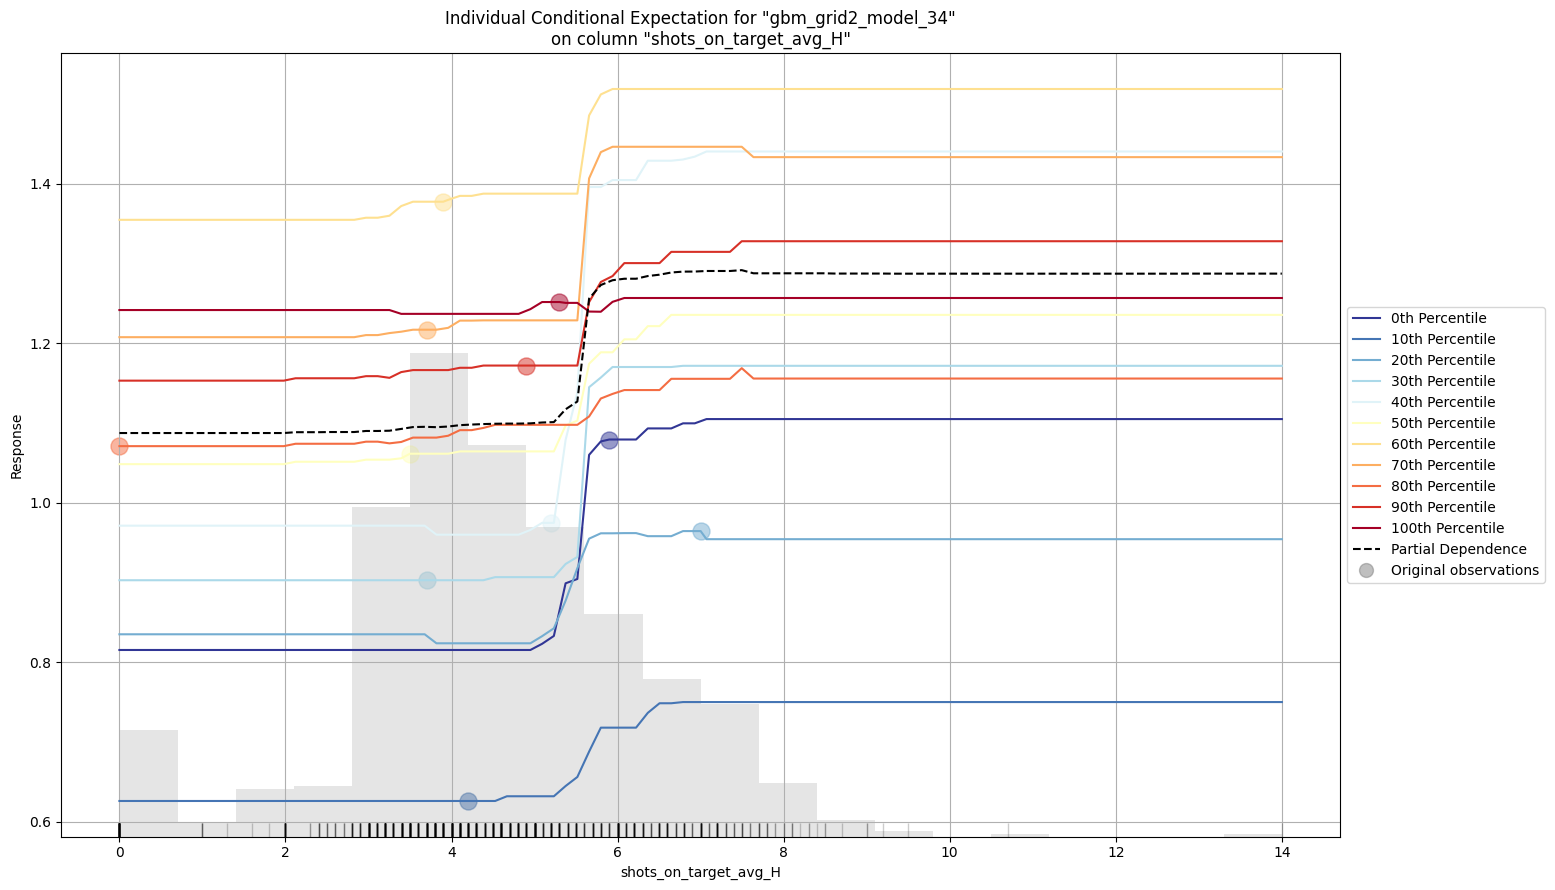

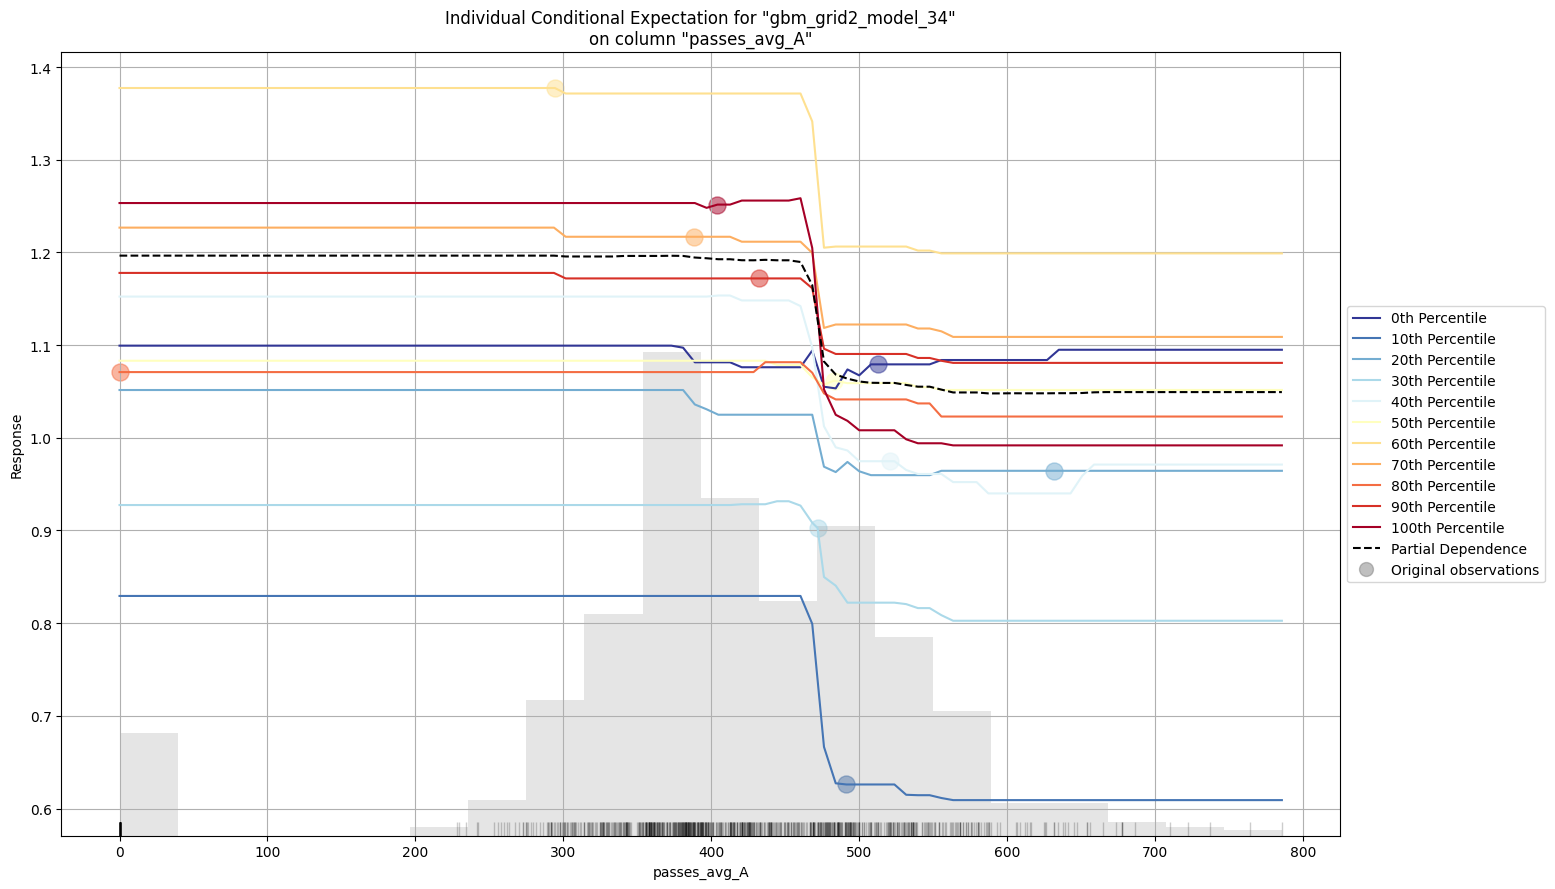

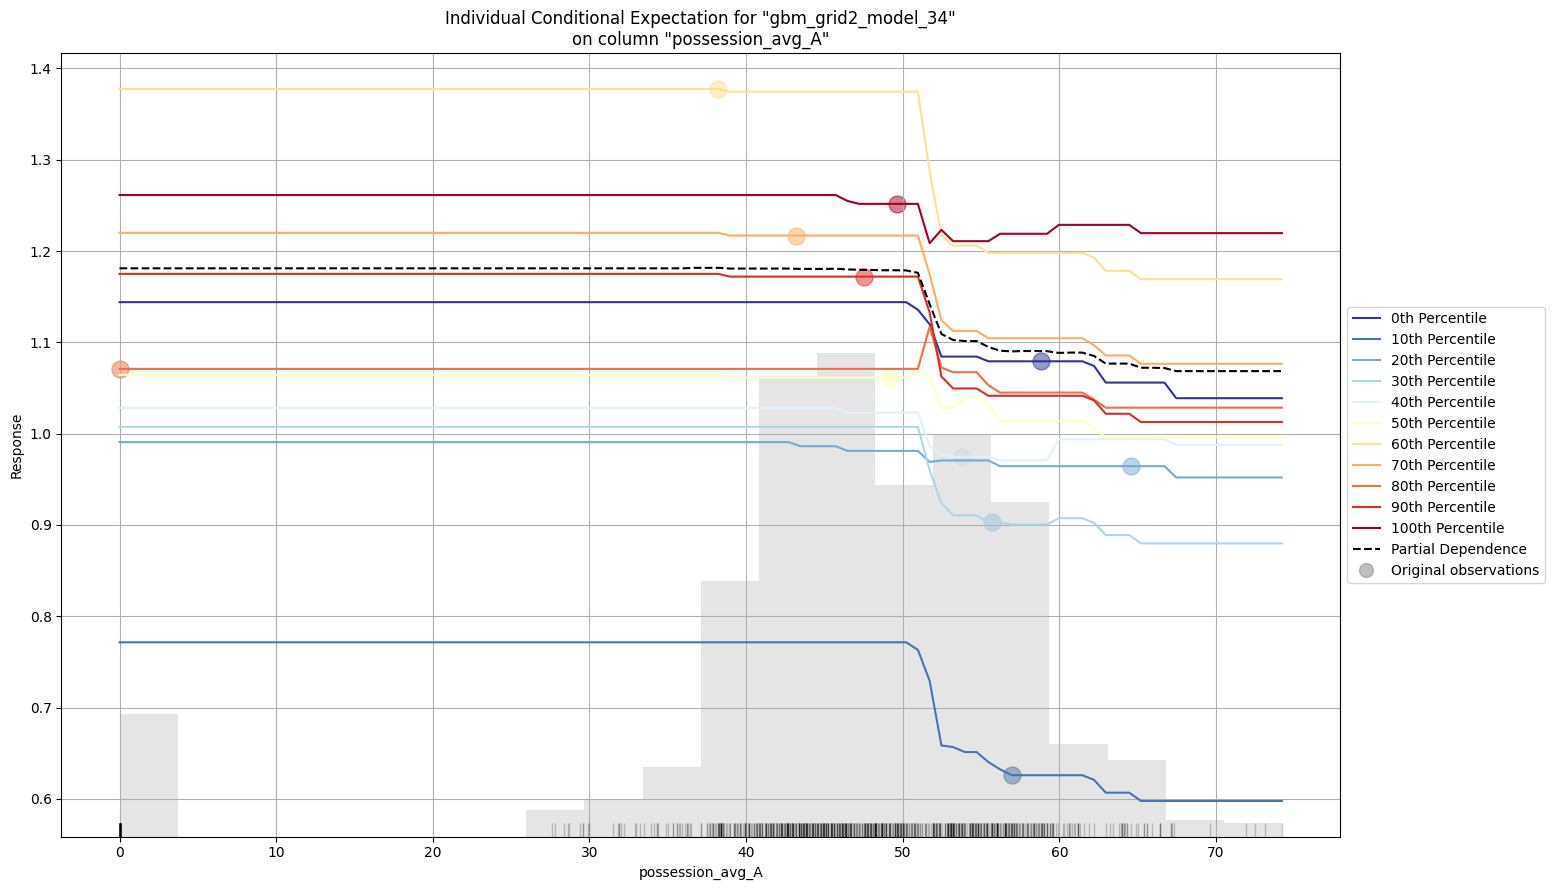

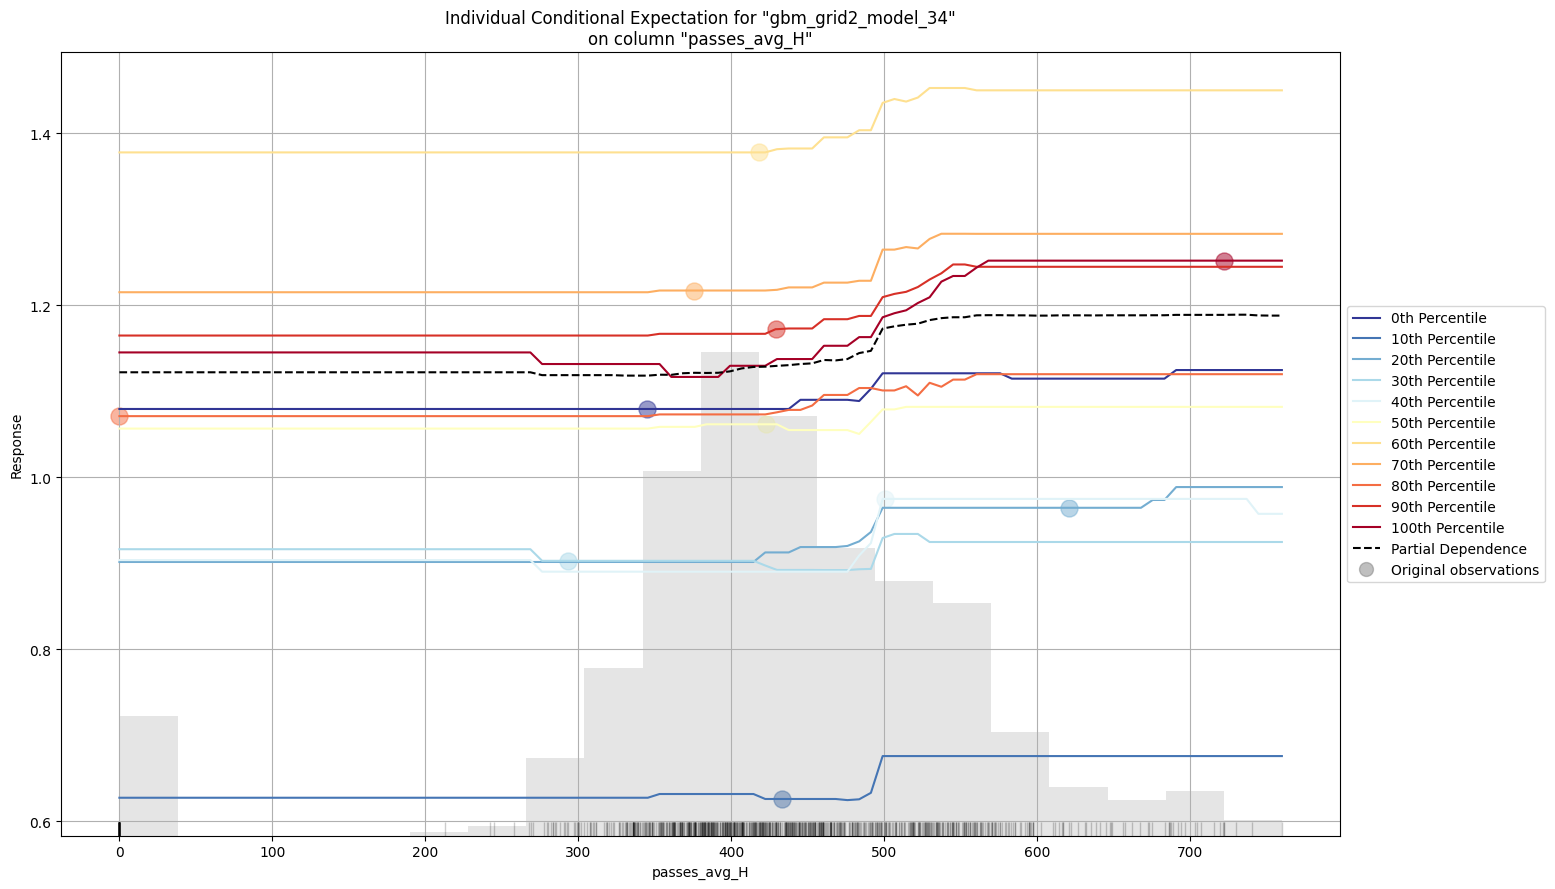

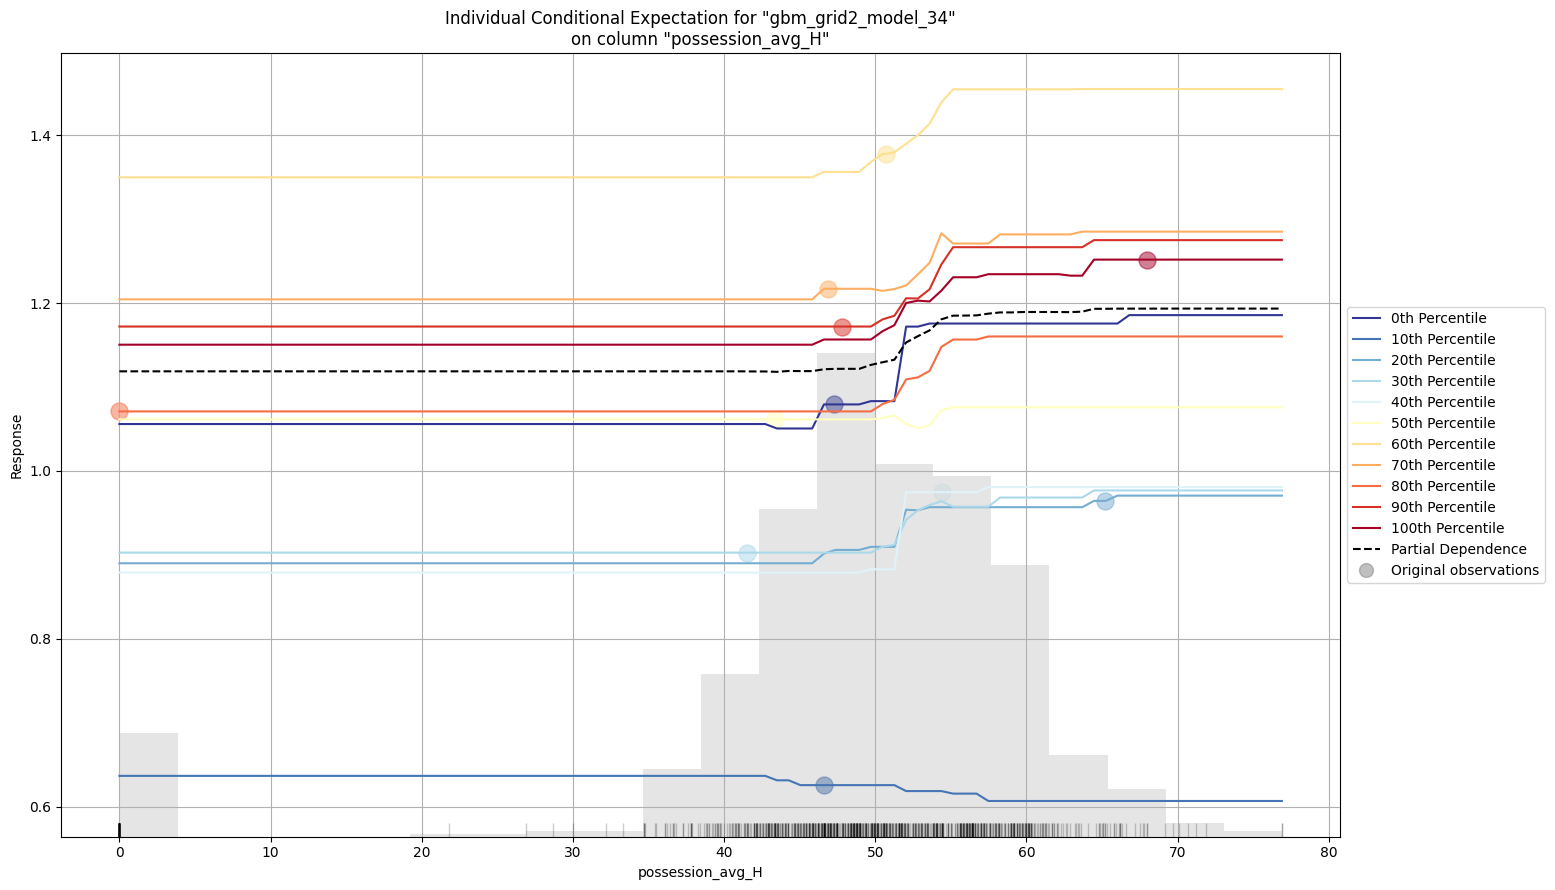

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [226]:
best_drf_model.explain(df_test)


###Interpreting above summary plots
**Residual Analysis**
Here, the residuals are visible as striped lines, which is an effect of using an integer number as the response value rather than a real value.

**SHAP Summary**
From the SHAP summary diagram, we can interpret a few conclusions -

Features are listed as per their importance in descending order i.e "away_team_ecoded" is the most important feature whereas "tackles_avg_H" is the least important feature.

On X-axis we have result variable (predictions either positive or negative) and on the y-axis we have the value of feature. It can be interpreted from the plot that which features have positive impact on the result with increasing value.

**Partial Dependence Plot (PDP)**
A partial dependence plot depicts a feature's marginal effect on the target (winner team). It is accomplished by holding all other variables constant while changing the value of one variable to obtain its PDP.

As we can see, when the other variables are held constant and a minor change is made in shots avg H, the mean response increases between shot ranges of 10-15. This could be interpreted as the range of shots being the deciding factor in the wine's quality.

**ICE (Individual Conditional Expectation) Plot**
The ICE plot is similar to the PDP plot, but the primary difference between the two methods is that the PDP plot focuses on the average effect of a feature rather than a specific instance. The ICE plot offers a solution to address the PDP plot's drawback of considering the outputs from all instances rather than an average value.



# Conclusion and learnings

* The random forest classifier is the best model to predict the EPL match results followed by Logistic Regression model.

* Both the models were interpreted using SHAP and PDP analysis.

* In this case, performance of AutoML (even the best model) was poor with very low accuracy. However, AutoML model is easily interpretable and hence we interpreted AutoML model as well.

**Learnings**:
1. The series of assignments were challenging and taught me the complete lifecycle of a project

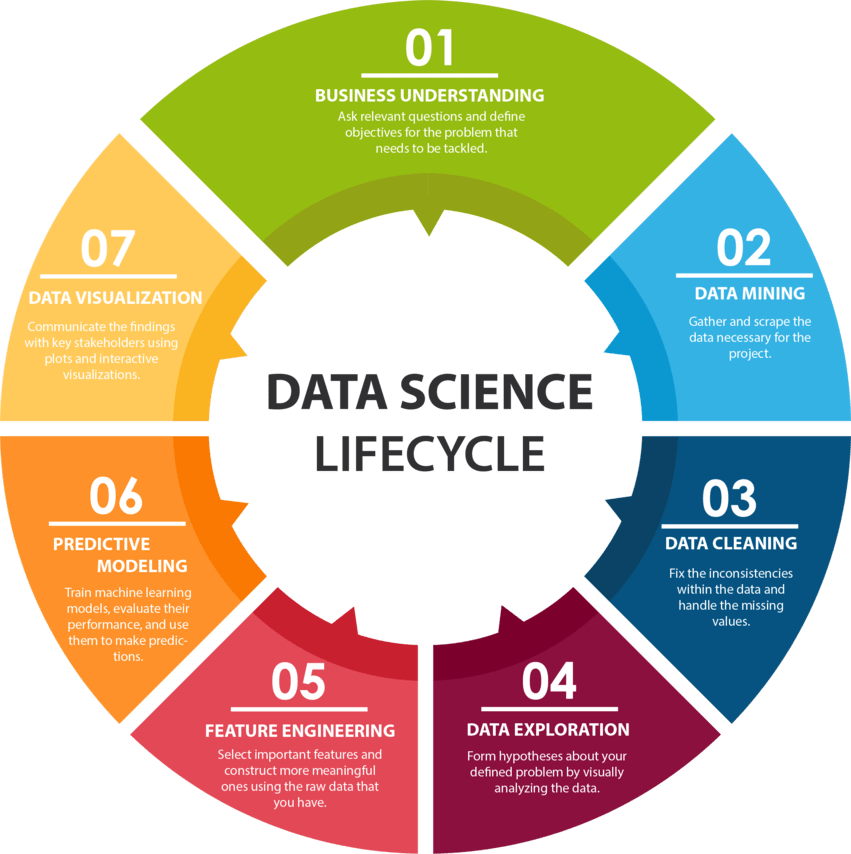

2. I learnt about different technique to identify feature importance
3. Exploraory Data Analsis is the first and the most important step. In order to get the data ready for model traing data cleaning, null imputation and feature selection and enginnering has to be done
4. Multiple models should be trained and compared. Then only best model should be selected and used. It is not necessary that the complex model will always perform better than simpler models.
5. I learnt about the model interpretability methods like SHAP, LIME, and PDP which helps us to understandt exactly what is happening at the back.

# References

- https://towardsdatascience.com/shap-a-reliable-way-to-analyze-your-model-interpretability-874294d30af6
- https://towardsdatascience.com/model-interpretability-and-explainability-27fe31cc0688
- https://www.analyticsvidhya.com/blog/2019/08/decoding-black-box-step-by-step-guide-interpretable-machine-learning-models-python/
- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/SHAP%20and%20LIME%20analysis%20Walkthrough.ipynb
- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Full_ML_Report/Wine-Quality-Analysis.ipynb
https://www.sudeep.co/data-science/2018/02/09/Understanding-the-Data-Science-Lifecycle.html